In [335]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [336]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Read in data

In [337]:
data = pd.read_csv('model_data/full_model_data.csv', index_col=0)

In [338]:
data.head()

URN  not_sustained_rate  total_absence  persistent_absence  \
1  137181            5.172414           11.1                38.1   
2  100049            6.250000           10.1                33.1   
3  100050            2.824859            7.9                24.8   
4  100051            5.464481           11.4                42.9   
5  100052            1.932367            8.2                24.0   

                               urban_rural            denomination   FSM  \
1  (England/Wales) Urban major conurbation  No religious character  41.2   
2  (England/Wales) Urban major conurbation  No religious character  63.5   
3  (England/Wales) Urban major conurbation  No religious character  35.6   
4  (England/Wales) Urban major conurbation  No religious character  61.8   
5  (England/Wales) Urban major conurbation  No religious character  41.8   

   White_British   EAL  perc_boys   region_name             school_name  \
1           10.8  51.7  56.874466  Inner London         The UCL Academy   
2           14.2  57.5  56.924644  Inner London       Haverstock School   
3           38.8  34.1   4.963971  Inner London  Parliament Hill School   
4            3.9  67.3  56.163114  Inner London      Regent High School   
5           11.4  38.1  51.630023  Inner London        Hampstead School   

   headcount  perm_excl_rate  susp_rate  one_plus_susp_rate  KS4_headcount  \
1     1171.0         0.34159   14.51751             8.45431            168   
2      982.0         0.00000    7.43381             4.98982            151   
3     1249.0         0.08006    9.12730             5.04404            174   
4     1079.0         0.09268    5.37535             4.26321            173   
5     1319.0         0.07582    3.26005             2.65353            197   

   KS2_history  Attainment_8  Progress_8  selective  KS4_pass_rate POSTCODE  \
1        105.1          47.4       -0.18          0             27  NW3 3AQ   
2        102.3          41.7       -0.32          0             26  NW3 2BQ   
3        107.1          59.1        0.61          0             40  NW5 1RL   
4        103.5          43.8       -0.06          0             21  NW1 1RX   
5        103.2          44.6       -0.04          0             10  NW2 3RT   

   post16 school_sex                 type         Ofsted_rating  sen_support  \
1       1      Mixed  Academy sponsor led  Requires improvement    10.247652   
2       1      Mixed     Community school                  Good    19.144603   
3       1      Girls     Community school                  Good    13.370697   
4       1      Mixed     Community school                  Good    17.886932   
5       1      Mixed     Community school                  Good     9.628506   

       ehcp     LSOA11  IMD  pupil_teacher_ratio  assistant_teacher_ratio  \
1  3.245090  E01000963  8.0                 13.0                      0.2   
2  2.851324  E01000902  2.0                  NaN                      NaN   
3  1.281025  E01000912  4.0                 14.7                      0.1   
4  3.614458  E01000952  2.0                 11.9                      0.2   
5  2.880970  E01000871  7.0                 14.9                      0.2   

   absence_rate_non_excl  
1              10.803701  
2               9.832177  
3               7.769210  
4              11.246731  
5               8.103096

In [339]:
data['not_sustained_rate'].describe()

count    3146.000000
mean        5.467439
std         3.908988
min         0.000000
25%         2.728048
50%         4.615385
75%         7.352941
max        36.363636
Name: not_sustained_rate, dtype: float64

In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3146 entries, 1 to 3146
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   URN                      3146 non-null   int64  
 1   not_sustained_rate       3146 non-null   float64
 2   total_absence            3119 non-null   float64
 3   persistent_absence       3119 non-null   float64
 4   urban_rural              3120 non-null   object 
 5   denomination             3120 non-null   object 
 6   FSM                      3120 non-null   float64
 7   White_British            3120 non-null   float64
 8   EAL                      3120 non-null   float64
 9   perc_boys                3120 non-null   float64
 10  region_name              3120 non-null   object 
 11  school_name              3120 non-null   object 
 12  headcount                3120 non-null   float64
 13  perm_excl_rate           3120 non-null   float64
 14  susp_rate                3120

### Drop school types that are specialist or only KS4 & 5

In [341]:
data['type'] = data['type'].astype(str)
np.unique(data['type'])

array(['Academy converter', 'Academy sponsor led',
       'City technology college', 'Community school', 'Foundation school',
       'Free schools', 'Further education', 'Studio schools',
       'University technical college', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

In [342]:
types = ['Academy converter', 'Academy sponsor led',
         'Community school', 'Foundation school',
         'Free schools', 'Voluntary aided school',
         'Voluntary controlled school']

data = data.loc[data['type'].isin(types)]

np.unique(data['type'])

array(['Academy converter', 'Academy sponsor led', 'Community school',
       'Foundation school', 'Free schools', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

### Drop null values

In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3069 entries, 1 to 3146
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   URN                      3069 non-null   int64  
 1   not_sustained_rate       3069 non-null   float64
 2   total_absence            3054 non-null   float64
 3   persistent_absence       3054 non-null   float64
 4   urban_rural              3055 non-null   object 
 5   denomination             3055 non-null   object 
 6   FSM                      3055 non-null   float64
 7   White_British            3055 non-null   float64
 8   EAL                      3055 non-null   float64
 9   perc_boys                3055 non-null   float64
 10  region_name              3055 non-null   object 
 11  school_name              3055 non-null   object 
 12  headcount                3055 non-null   float64
 13  perm_excl_rate           3055 non-null   float64
 14  susp_rate                3055

In [344]:
data = data.dropna(subset=['total_absence'])

In [345]:
data = data.dropna(subset=['Progress_8'])

In [346]:
data = data.dropna(subset=['Ofsted_rating'])

In [347]:
data = data.dropna(subset=['pupil_teacher_ratio'])

In [348]:
data['school_sex'].unique()

array(['Mixed', 'Girls', 'Boys'], dtype=object)

In [349]:
data['single_sex_binary'] = data['school_sex']

In [350]:
data['single_sex_binary'].replace('Girls', 'Single-sex', inplace=True)
data['single_sex_binary'].replace('Boys', 'Single-sex', inplace=True)

In [351]:
data.describe()

URN  not_sustained_rate  total_absence  persistent_absence  \
count    2972.000000         2972.000000    2972.000000         2972.000000   
mean   133863.203567            5.354765       9.096770           26.750976   
std     12011.537035            3.670508       2.437697            8.591171   
min    100050.000000            0.000000       3.100000            2.800000   
25%    135760.750000            2.720164       7.500000           21.200000   
50%    137338.500000            4.591837       8.900000           26.600000   
75%    140412.750000            7.272727      10.400000           32.100000   
max    148866.000000           28.125000      32.600000           97.800000   

               FSM  White_British          EAL    perc_boys    headcount  \
count  2972.000000    2972.000000  2972.000000  2972.000000  2972.000000   
mean     24.482470      63.886137    17.662786    50.348293  1115.075034   
std      12.930734      28.961852    18.402224    16.637625   385.419425   
min       1.300000       0.000000     0.000000     0.000000    81.000000   
25%      14.700000      44.400000     4.500000    49.178838   847.000000   
50%      22.500000      75.300000    10.100000    50.977719  1082.000000   
75%      32.725000      87.300000    24.900000    53.044672  1359.000000   
max      75.400000      99.300000    92.700000   100.000000  2990.000000   

       perm_excl_rate    susp_rate  one_plus_susp_rate  KS4_headcount  \
count     2972.000000  2972.000000         2972.000000    2972.000000   
mean         0.243747    20.286441            7.579353     185.130552   
std          0.326898    24.449683            5.256525      61.606266   
min          0.000000     0.000000            0.000000      17.000000   
25%          0.000000     6.619397            3.917765     145.000000   
50%          0.134005    13.096390            6.508540     180.000000   
75%          0.345252    24.544380            9.902157     224.250000   
max          3.024910   358.064520           37.366550     451.000000   

       KS2_history  Attainment_8   Progress_8    selective  KS4_pass_rate  \
count  2972.000000   2972.000000  2972.000000  2972.000000    2972.000000   
mean    104.437248     47.261137    -0.001413     0.053499      24.690108   
std       2.745410      9.261298     0.505607     0.225065      18.675961   
min      92.100000     18.800000    -3.380000     0.000000       0.000000   
25%     102.800000     41.300000    -0.330000     0.000000      11.000000   
50%     104.200000     46.100000    -0.010000     0.000000      20.000000   
75%     105.500000     51.500000     0.330000     0.000000      33.000000   
max     117.400000     87.600000     2.370000     1.000000     100.000000   

            post16  sen_support         ehcp         IMD  pupil_teacher_ratio  \
count  2972.000000  2972.000000  2972.000000  2972.00000          2972.000000   
mean      0.625841    12.866762     2.529875     5.66319            16.897241   
std       0.483986     5.493081     1.680185     2.81924             2.295918   
min       0.000000     0.403226     0.000000     1.00000             5.300000   
25%       0.000000     9.227085     1.427036     3.00000            15.600000   
50%       1.000000    12.608697     2.238032     6.00000            16.800000   
75%       1.000000    16.039934     3.227958     8.00000            18.000000   
max       1.000000    48.316252    18.468468    10.00000            43.400000   

       assistant_teacher_ratio  absence_rate_non_excl  
count              2972.000000            2972.000000  
mean                  0.230585               8.819434  
std                   0.120709               2.263271  
min                   0.000000               3.034038  
25%                   0.100000               7.330413  
50%                   0.200000               8.653188  
75%                   0.300000              10.098754  
max                   1.000000              32.617429

In [352]:
data.loc[data['assistant_teacher_ratio'] == 1].shape

(1, 35)

In [353]:
data.loc[data['not_sustained_rate'] == 0].shape

(95, 35)

In [354]:
data.loc[data['not_sustained_rate'] >= (100/7)].shape

(79, 35)

# Shape of the Data

In [355]:
data['Ofsted_rating'] = data['Ofsted_rating'].astype(str)
np.unique(data['Ofsted_rating'])

array(['Good', 'Outstanding', 'Requires improvement',
       'Serious Weaknesses', 'Special Measures'], dtype=object)

In [356]:
data['Ofsted_rating'].replace('Serious Weaknesses', 'Inadequate', inplace=True)
data['Ofsted_rating'].replace('Special Measures', 'Inadequate', inplace=True)

In [357]:
# convert to category type
from pandas.api.types import CategoricalDtype

ofsted_cats = CategoricalDtype(categories=['Outstanding', 'Good', 'Requires improvement', 'Inadequate'], ordered=True)
data['Ofsted_rating'] = data['Ofsted_rating'].astype(ofsted_cats)

In [358]:
performance_indicators = data[['not_sustained_rate', 'total_absence', 'absence_rate_non_excl', 'persistent_absence', 
                               'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 
                               'KS2_history', 'Attainment_8', 'Progress_8', 'KS4_pass_rate',
                              'selective', 'Ofsted_rating']]

In [359]:
data['selective'].replace(0, 'Non-selective', inplace=True)
data['selective'].replace(1, 'Selective', inplace=True)

In [360]:
#sns.pairplot(performance_indicators);

In [361]:
#sns.pairplot(performance_indicators, hue='Ofsted_rating', palette='RdYlGn_r');

In [362]:
#sns.pairplot(performance_indicators, hue='selective');

### School size

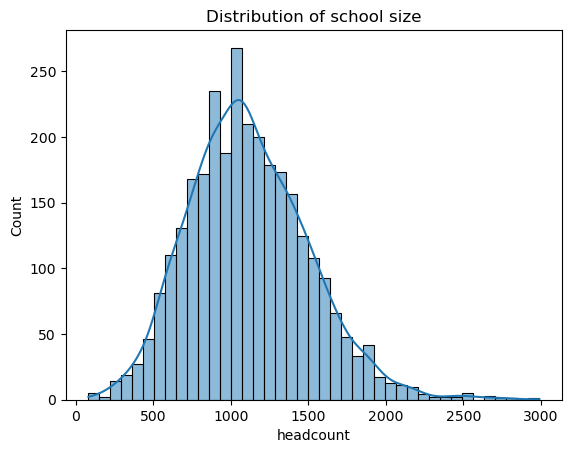

In [363]:
sns.histplot(data['headcount'], kde=True )
plt.title('Distribution of school size');

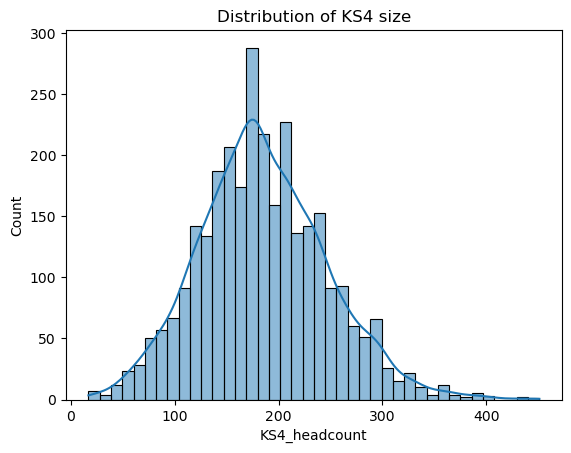

In [364]:
sns.histplot(data['KS4_headcount'], kde=True )
plt.title('Distribution of KS4 size');

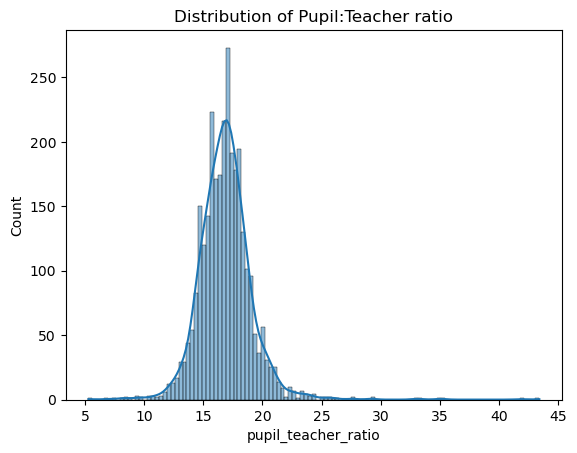

In [365]:
sns.histplot(data['pupil_teacher_ratio'], kde=True )
plt.title('Distribution of Pupil:Teacher ratio');

### Performance indicators

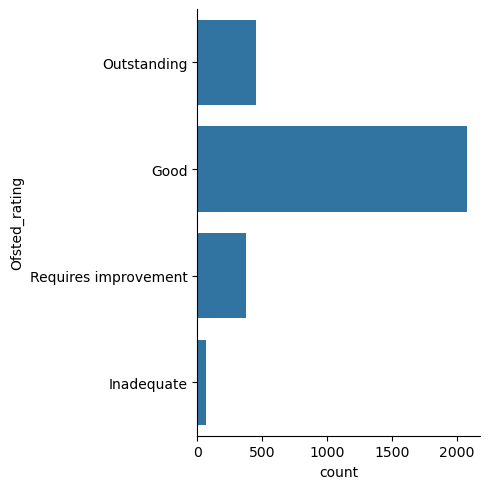

In [366]:
sns.catplot(data['Ofsted_rating'], kind='count');

In [367]:
data.groupby('Ofsted_rating').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_14520/3787143538.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Ofsted_rating').size()


Ofsted_rating
Outstanding              450
Good                    2077
Requires improvement     374
Inadequate                71
dtype: int64

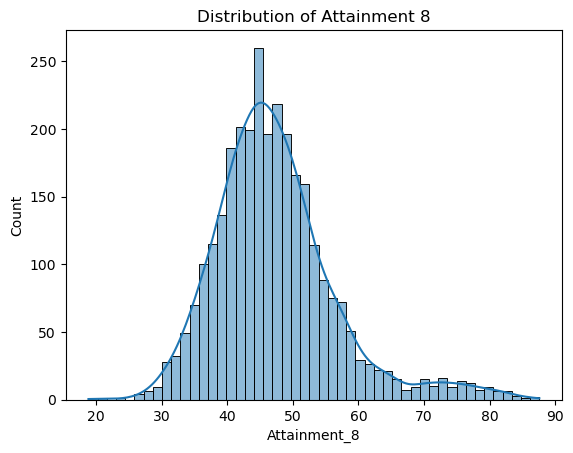

In [368]:
sns.histplot(data['Attainment_8'], kde=True )
plt.title('Distribution of Attainment 8');

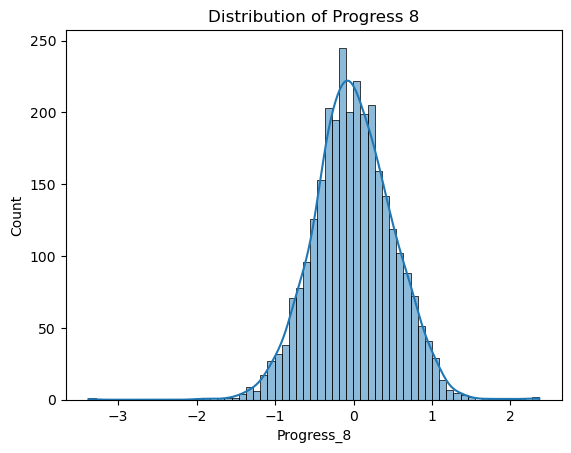

In [369]:
sns.histplot(data['Progress_8'], kde=True )
plt.title('Distribution of Progress 8');

### Other school characteristics

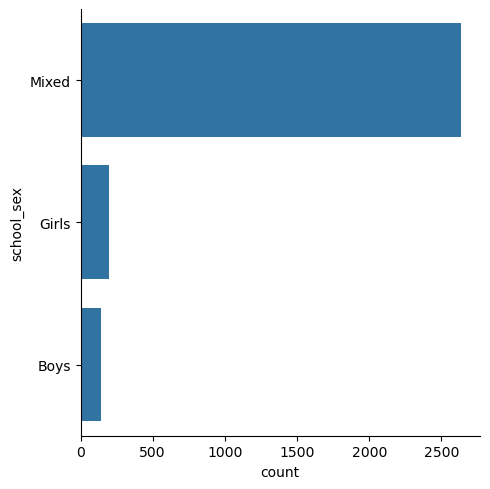

In [370]:
sns.catplot(data['school_sex'], kind='count');

In [371]:
data.groupby('single_sex_binary').size()

single_sex_binary
Mixed         2635
Single-sex     337
dtype: int64

In [372]:
data.groupby('post16').size()

post16
0    1112
1    1860
dtype: int64

In [373]:
data['post16'].replace(0, 'No Post-16', inplace=True)
data['post16'].replace(1, 'Post-16', inplace=True)

In [374]:
data.groupby('post16').size()

post16
No Post-16    1112
Post-16       1860
dtype: int64

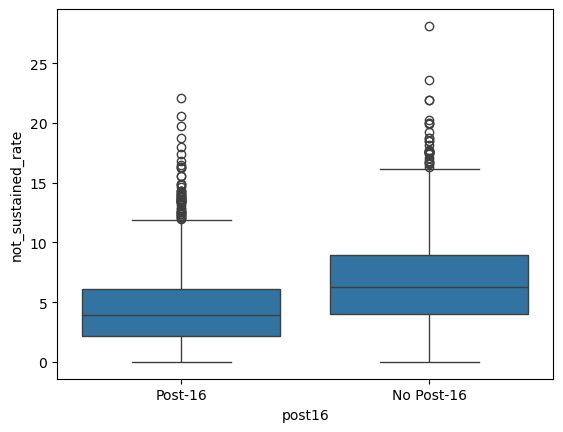

In [375]:
sns.boxplot(data=data, x='post16', y='not_sustained_rate');

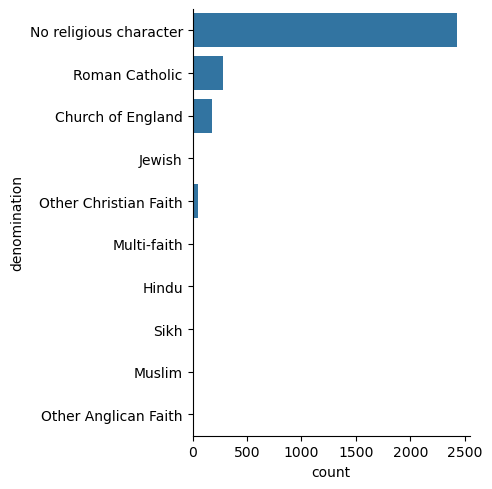

In [376]:
sns.catplot(data['denomination'], kind='count');

In [377]:
denomination_mean_neet = data.groupby('denomination')['not_sustained_rate'].mean().sort_values().index

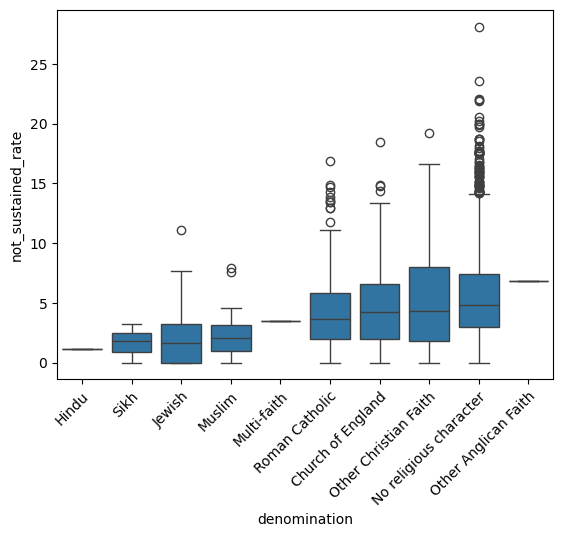

In [378]:
sns.boxplot(data=data, x='denomination', y='not_sustained_rate', order=denomination_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [379]:
data['denomination'].replace('Church of England', 'Christian', inplace=True)
data['denomination'].replace('Hindu', 'Other faith', inplace=True)
data['denomination'].replace('Jewish', 'Other faith', inplace=True)
data['denomination'].replace('Multi-faith', 'No faith', inplace=True)
data['denomination'].replace('Muslim', 'Other faith', inplace=True)
data['denomination'].replace('No religious character', 'No faith', inplace=True)
data['denomination'].replace('Other Anglican Faith', 'Christian', inplace=True)
data['denomination'].replace('Other Christian Faith', 'Christian', inplace=True)
data['denomination'].replace('Roman Catholic', 'Christian', inplace=True)
data['denomination'].replace('Sikh', 'Other faith', inplace=True)

In [380]:
data.groupby('denomination').size()

denomination
Christian       515
No faith       2425
Other faith      32
dtype: int64

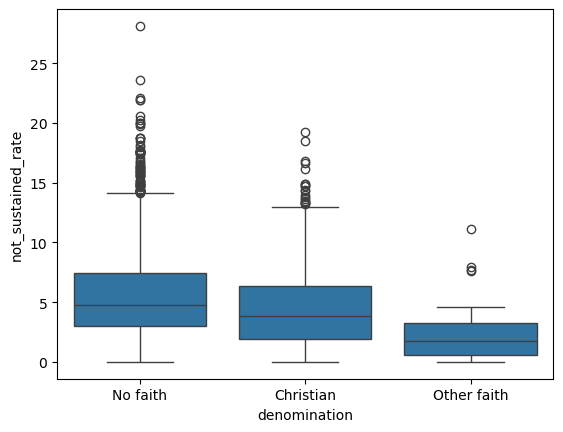

In [381]:
sns.boxplot(data=data, x='denomination', y='not_sustained_rate');

In [382]:
data['faith_binary'] = data['denomination']

In [383]:

data['faith_binary'].replace('Christian', 'Faith', inplace=True)
data['faith_binary'].replace('Other faith', 'Faith', inplace=True)

In [384]:
data.groupby('faith_binary').size()

faith_binary
Faith        547
No faith    2425
dtype: int64

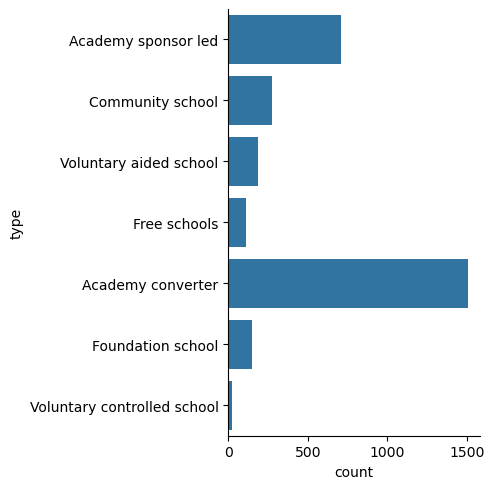

In [385]:
sns.catplot(data['type'], kind='count');

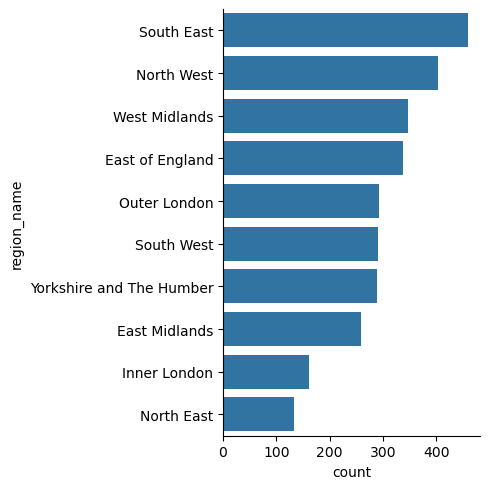

In [386]:
sns.catplot(data['region_name'], 
            kind = 'count', 
            order = data['region_name'].value_counts().index);

In [387]:
region_mean_neet = data.groupby('region_name')['not_sustained_rate'].mean().sort_values().index

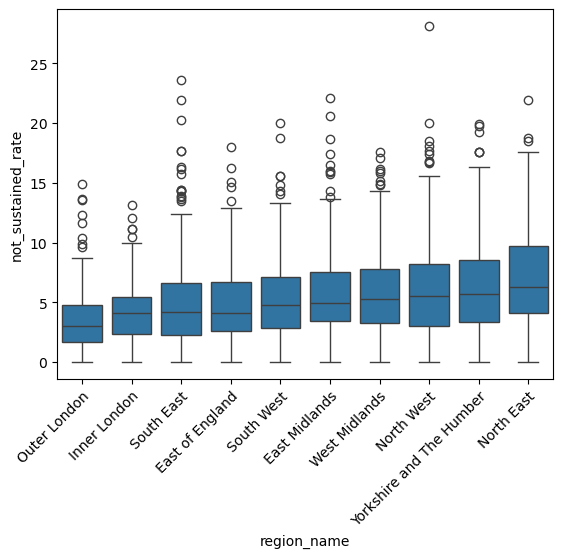

In [388]:
sns.boxplot(data=data, x='region_name', y='not_sustained_rate', order=region_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [389]:
# new column for region
data['region_new'] = data['region_name']

data['region_new'].replace('Outer London', 'London', inplace=True)
data['region_new'].replace('Inner London', 'London', inplace=True)

data['region_new'].replace('South East', 'South', inplace=True)
data['region_new'].replace('South West', 'South', inplace=True)
data['region_new'].replace('East of England', 'South', inplace=True)

data['region_new'].replace('East Midlands', 'Midlands', inplace=True)
data['region_new'].replace('West Midlands', 'Midlands', inplace=True)

data['region_new'].replace('Yorkshire and The Humber', 'North', inplace=True)
data['region_new'].replace('North West', 'North', inplace=True)
data['region_new'].replace('North East', 'North', inplace=True)

In [390]:
data.groupby('region_new').size()

region_new
London       453
Midlands     606
North        826
South       1087
dtype: int64

In [391]:
ordered_regions = data.groupby('region_new')['not_sustained_rate'].median().sort_values().index

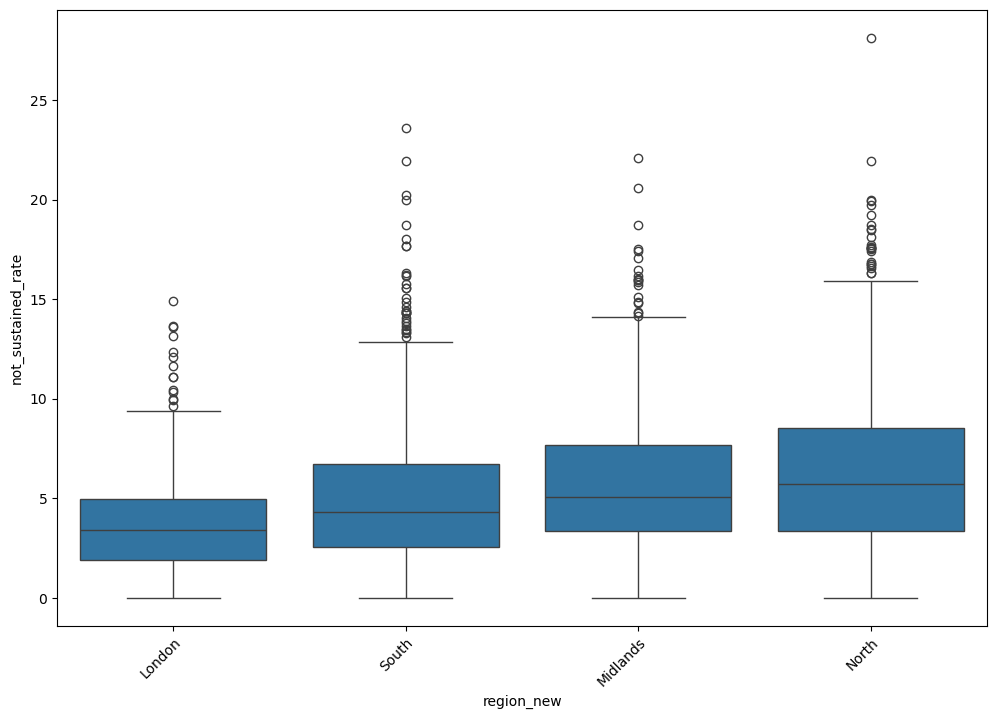

In [392]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='region_new', y='not_sustained_rate', order=ordered_regions)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

Reduced collinearity with IMD - variation in IMD across regions reduced. 

In [393]:
data.groupby('IMD').size()

IMD
1.0     228
2.0     281
3.0     315
4.0     316
5.0     288
6.0     297
7.0     304
8.0     306
9.0     336
10.0    301
dtype: int64

In [394]:
region_means = data.groupby('region_name')['IMD'].mean()
print(region_means)

region_name
East Midlands               5.907336
East of England             6.426036
Inner London                4.043478
North East                  5.022388
North West                  5.032178
Outer London                5.736301
South East                  6.764706
South West                  6.065517
West Midlands               4.985591
Yorkshire and The Humber    5.218750
Name: IMD, dtype: float64


In [395]:
new_region_means = data.groupby('region_new')['IMD'].mean()
print(new_region_means)

region_new
London      5.134658
Midlands    5.379538
North       5.095642
South       6.472861
Name: IMD, dtype: float64


In [396]:
data['urban_rural'] = data['urban_rural'].astype(str)
np.unique(data['urban_rural'])

array(['(England/Wales) Rural hamlet and isolated dwellings',
       '(England/Wales) Rural hamlet and isolated dwellings in a sparse setting',
       '(England/Wales) Rural town and fringe',
       '(England/Wales) Rural town and fringe in a sparse setting',
       '(England/Wales) Rural village',
       '(England/Wales) Rural village in a sparse setting',
       '(England/Wales) Urban city and town',
       '(England/Wales) Urban city and town in a sparse setting',
       '(England/Wales) Urban major conurbation',
       '(England/Wales) Urban minor conurbation'], dtype=object)

In [397]:
data['urban_rural'].replace('(England/Wales) Urban major conurbation', 'Urban major conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban minor conurbation', 'Urban minor conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town', 'Urban city and town', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town in a sparse setting', 'Urban city and town in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe', 'Rural town and fringe', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe in a sparse setting', 'Rural town and fringe in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village', 'Rural village', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village in a sparse setting', 'Rural village in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings', 'Rural hamlet and isolated dwellings', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings in a sparse setting', 'Rural hamlet and isolated dwellings in a sparse setting', inplace=True)

In [398]:
urban_rural_cats = CategoricalDtype(categories=['Urban major conurbation', 
                                                'Urban minor conurbation', 
                                                'Urban city and town', 
                                                'Urban city and town in a sparse setting', 
                                                'Rural town and fringe',
                                                'Rural town and fringe in a sparse setting',
                                                'Rural village',
                                                'Rural village in a sparse setting',
                                                'Rural hamlet and isolated dwellings',
                                                'Rural hamlet and isolated dwellings in a sparse setting'
                                               ], 
                                    ordered=True)
data['urban_rural'] = data['urban_rural'].astype(urban_rural_cats)

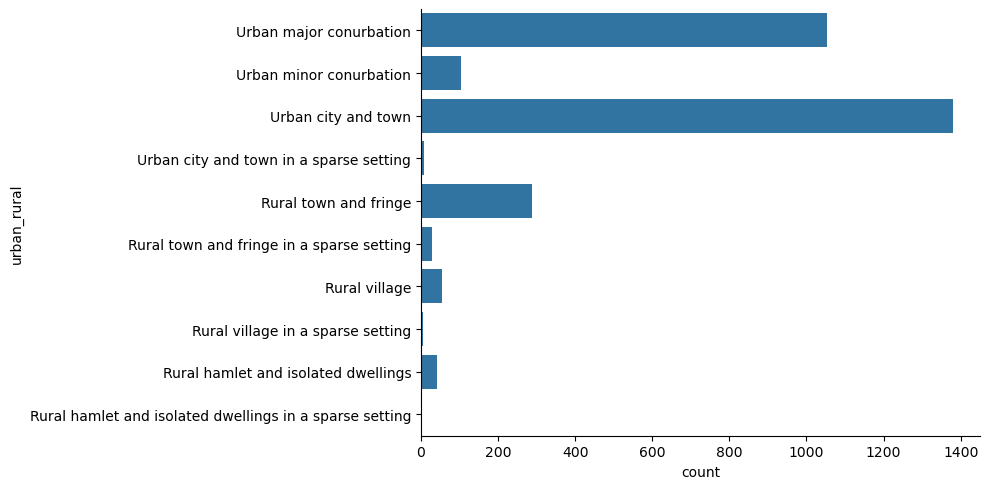

In [399]:
g = sns.catplot(data['urban_rural'], kind='count', height=5, aspect=2);

In [400]:
urban_rural_mean_neet = data.groupby('urban_rural')['not_sustained_rate'].mean().sort_values().index

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_14520/3792850642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  urban_rural_mean_neet = data.groupby('urban_rural')['not_sustained_rate'].mean().sort_values().index


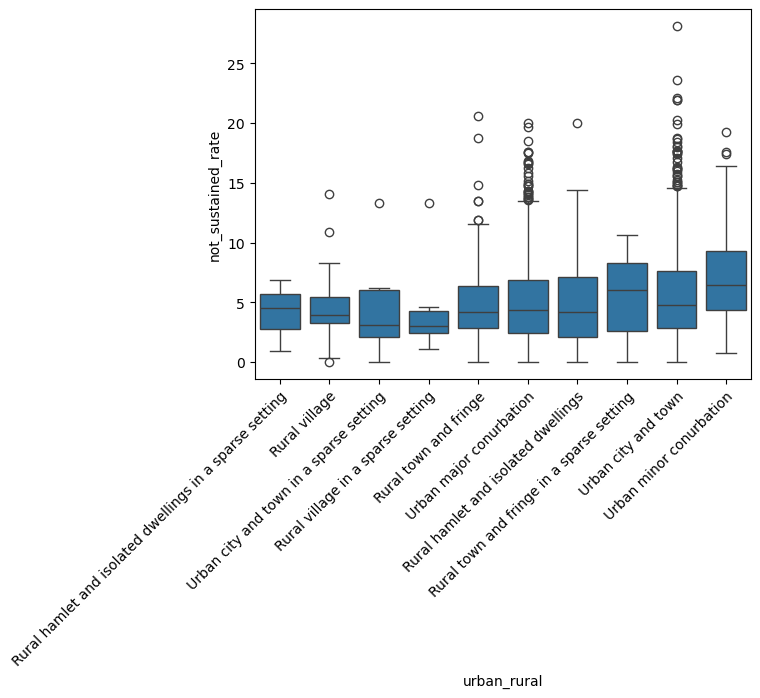

In [401]:
sns.boxplot(data=data, x='urban_rural', y='not_sustained_rate', order=urban_rural_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [402]:
# new column for binary urban status
data['urban_binary'] = data['urban_rural']

In [403]:
# replace labels with numbers
data['urban_binary'].replace('Urban major conurbation', 'Urban', inplace=True)
data['urban_binary'].replace('Urban minor conurbation', 'Urban', inplace=True)
data['urban_binary'].replace('Urban city and town', 'Urban', inplace=True)
data['urban_binary'].replace('Urban city and town in a sparse setting', 'Urban', inplace=True)
data['urban_binary'].replace('Rural town and fringe', 'Rural', inplace=True)
data['urban_binary'].replace('Rural town and fringe in a sparse setting', 'Rural', inplace=True)
data['urban_binary'].replace('Rural village', 'Rural', inplace=True)
data['urban_binary'].replace('Rural village in a sparse setting', 'Rural', inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings', 'Rural', inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings in a sparse setting', 'Rural', inplace=True)

In [404]:
data.groupby('urban_binary').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_14520/419234468.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('urban_binary').size()


urban_binary
Urban    2548
Rural     424
dtype: int64

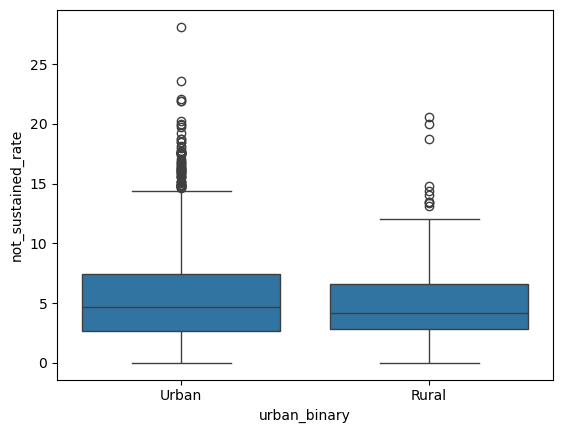

In [405]:
sns.boxplot(data=data, x='urban_binary', y='not_sustained_rate');

### Pupil characteristics

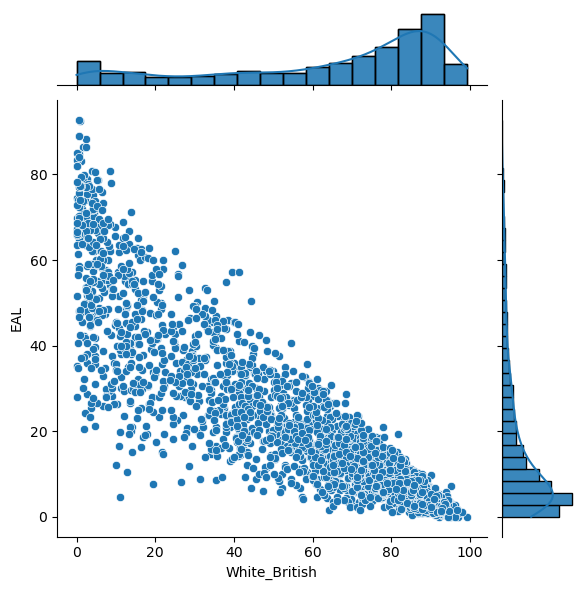

In [406]:
g = sns.jointplot(data=data, x='White_British', y='EAL')
g.plot_marginals(sns.histplot, kde=True);

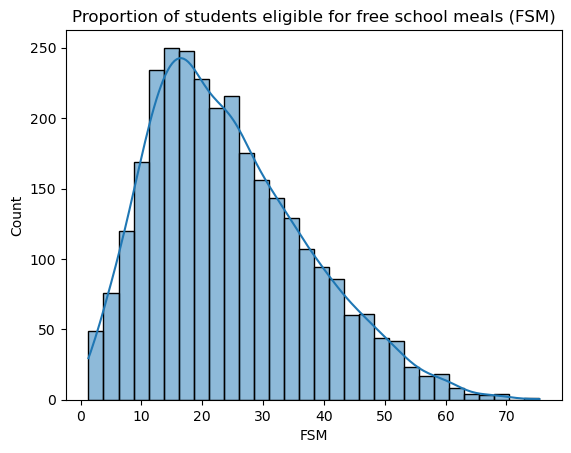

In [407]:
sns.histplot(data['FSM'], kde=True )
plt.title('Proportion of students eligible for free school meals (FSM)');

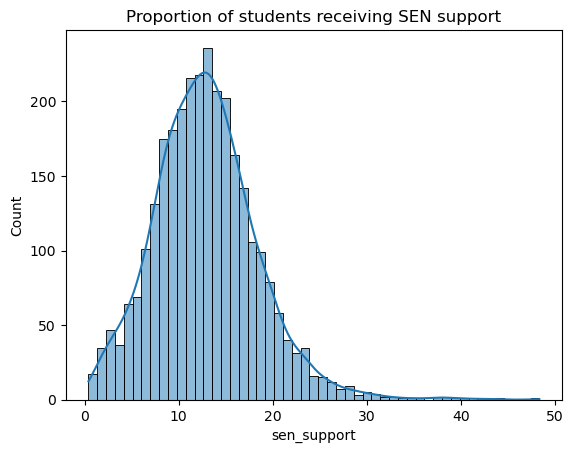

In [408]:
sns.histplot(data['sen_support'], kde=True )
plt.title('Proportion of students receiving SEN support');

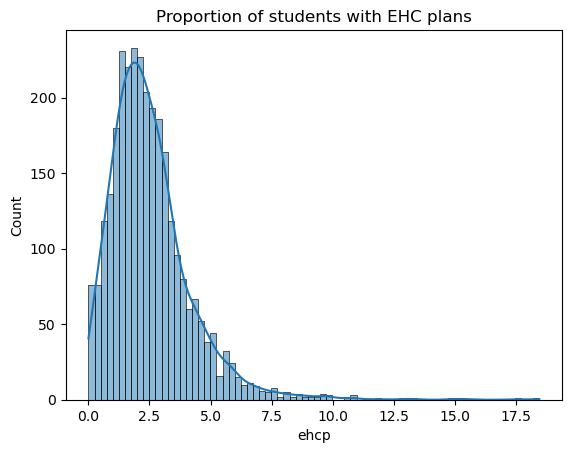

In [409]:
sns.histplot(data['ehcp'], kde=True )
plt.title('Proportion of students with EHC plans');

# Correlations

In [325]:
from copy import copy
from scipy.stats import kendalltau

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   URN                      2972 non-null   int64   
 1   not_sustained_rate       2972 non-null   float64 
 2   total_absence            2972 non-null   float64 
 3   persistent_absence       2972 non-null   float64 
 4   urban_rural              2972 non-null   category
 5   denomination             2972 non-null   object  
 6   FSM                      2972 non-null   float64 
 7   White_British            2972 non-null   float64 
 8   EAL                      2972 non-null   float64 
 9   perc_boys                2972 non-null   float64 
 10  region_name              2972 non-null   object  
 11  school_name              2972 non-null   object  
 12  headcount                2972 non-null   float64 
 13  perm_excl_rate           2972 non-null   float64 
 14  susp_rate    

In [327]:
vars_for_corr = data[['not_sustained_rate', 
                      'absence_rate_non_excl', 'persistent_absence', 
                      'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 
                      'FSM', 'White_British', 'EAL', 'perc_boys', 'sen_support', 'ehcp', 
                      'headcount', 'KS4_headcount', 
                      'pupil_teacher_ratio', 'assistant_teacher_ratio', 
                      'KS2_history', 'KS4_pass_rate', 'Attainment_8', 'Progress_8', 
                      'selective', 'post16',
                      'IMD', 'urban_binary', 'single_sex_binary', 'faith_binary']]

In [170]:
vars_for_corr.columns

Index(['not_sustained_rate', 'absence_rate_non_excl', 'persistent_absence',
       'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 'FSM',
       'White_British', 'EAL', 'perc_boys', 'sen_support', 'ehcp', 'headcount',
       'KS4_headcount', 'pupil_teacher_ratio', 'assistant_teacher_ratio',
       'KS2_history', 'KS4_pass_rate', 'Attainment_8', 'Progress_8',
       'selective', 'post16', 'IMD', 'urban_binary', 'single_sex_binary',
       'faith_binary'],
      dtype='object')

In [171]:
corr_names = {
    'not_sustained_rate': 'Not sustained %', 
    'absence_rate_non_excl': 'Absence %', 
    'persistent_absence': 'Persistent absence %',
    'perm_excl_rate': 'Permanent exclusion %', 
    'susp_rate': 'Suspension %', 
    'one_plus_susp_rate': 'One-plus suspension %', 
    'FSM': 'FSM %',
    'White_British': 'White British %', 
    'EAL': 'EAL %', 
    'perc_boys': 'Boys %', 
    'sen_support': 'SEN support %', 
    'ehcp': 'EHCP %', 
    'headcount': 'School headcount',
    'KS4_headcount': 'KS4 headcount', 
    'pupil_teacher_ratio': 'Pupil:Teacher ratio', 
    'assistant_teacher_ratio': 'Assistant:Teacher ratio',
    'KS2_history': 'KS2 history', 
    'KS4_pass_rate': 'KS4 pass %', 
    'Attainment_8': 'A8', 
    'Progress_8': 'P8',
    'selective': 'Selective schools', 
    'post16': 'Post-16', 
    'IMD': 'IMD of LSOA', 
    'urban_binary': 'Urban schools', 
    'single_sex_binary': 'Single sex schools',
    'faith_binary': 'Faith schools'
}

In [172]:
vars_for_corr = vars_for_corr.rename(columns=corr_names)

In [173]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

##### Positive correlations

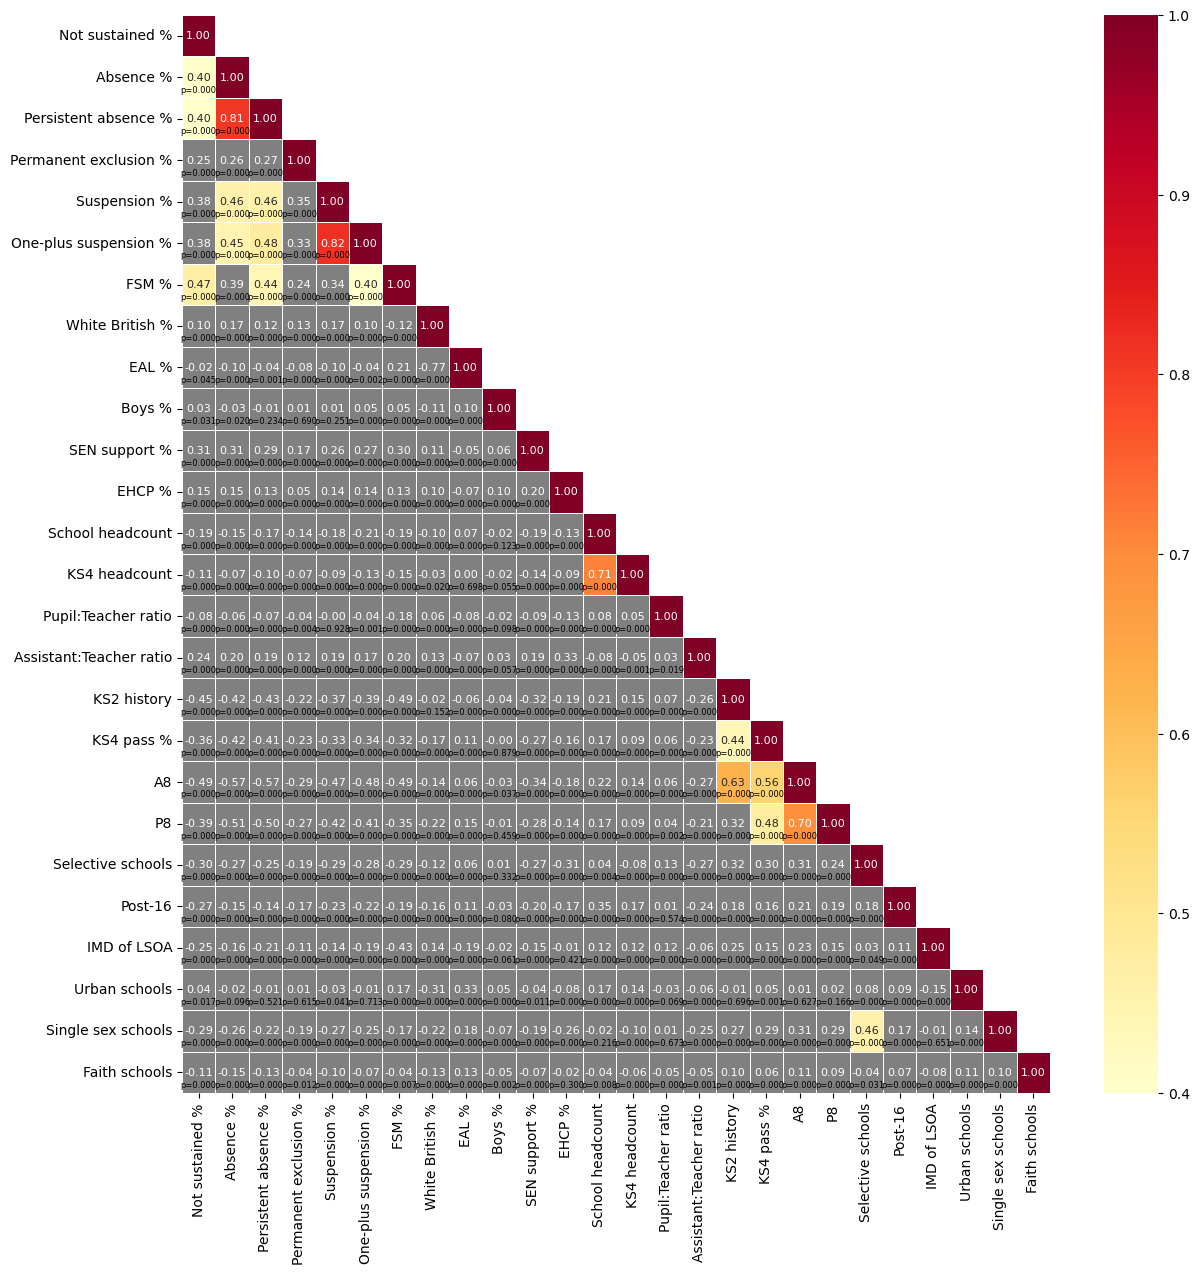

In [174]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


## Negative correlations

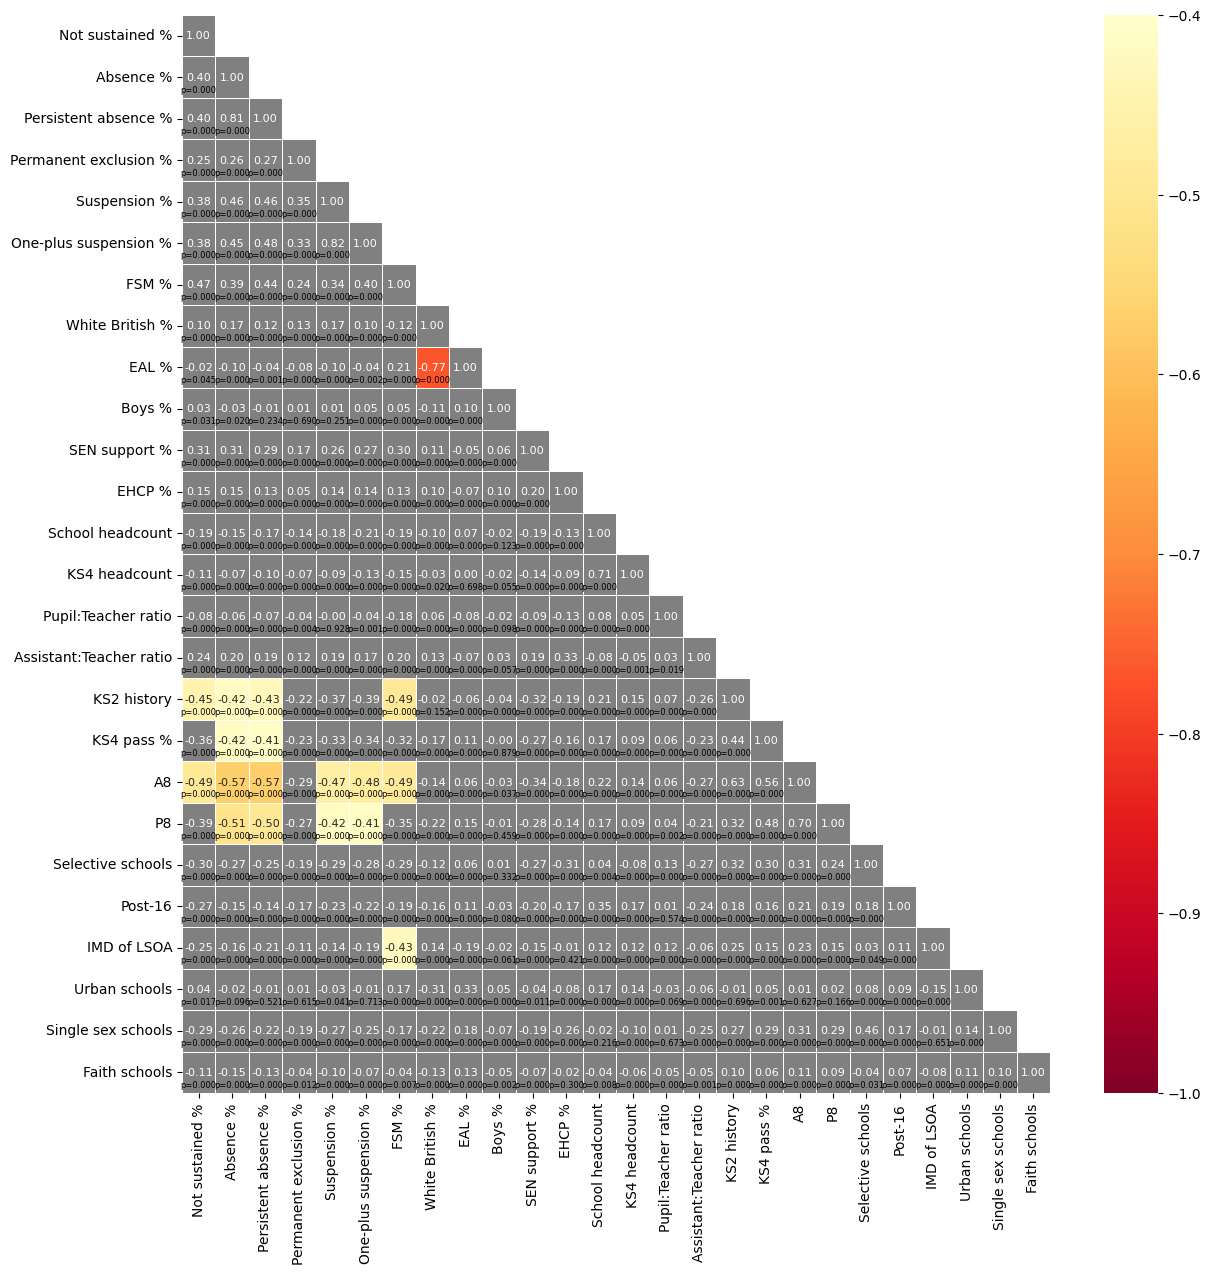

In [175]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

## Explore correlations

# Regression

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   URN                      2972 non-null   int64   
 1   not_sustained_rate       2972 non-null   float64 
 2   total_absence            2972 non-null   float64 
 3   persistent_absence       2972 non-null   float64 
 4   urban_rural              2972 non-null   category
 5   denomination             2972 non-null   object  
 6   FSM                      2972 non-null   float64 
 7   White_British            2972 non-null   float64 
 8   EAL                      2972 non-null   float64 
 9   perc_boys                2972 non-null   float64 
 10  region_name              2972 non-null   object  
 11  school_name              2972 non-null   object  
 12  headcount                2972 non-null   float64 
 13  perm_excl_rate           2972 non-null   float64 
 14  susp_rate    

In [222]:
# convert to category 
data['denomination'] = pd.Categorical(data['denomination'])
data['school_sex'] = pd.Categorical(data['school_sex'])
data['type'] = pd.Categorical(data['type'])
data['region_new'] = pd.Categorical(data['region_new'])

# convert to int
data['urban_binary'] = data['urban_binary'].astype(int)

In [223]:
data_transformed = pd.get_dummies(data, 
                                  columns=['type', 
                                           'denomination', 
                                           #'school_sex', 
                                           'region_new', 
                                           #'Ofsted_rating'
                                          ], 
                                 drop_first=False)
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   URN                               2972 non-null   int64   
 1   not_sustained_rate                2972 non-null   float64 
 2   total_absence                     2972 non-null   float64 
 3   persistent_absence                2972 non-null   float64 
 4   urban_rural                       2972 non-null   category
 5   FSM                               2972 non-null   float64 
 6   White_British                     2972 non-null   float64 
 7   EAL                               2972 non-null   float64 
 8   perc_boys                         2972 non-null   float64 
 9   region_name                       2972 non-null   object  
 10  school_name                       2972 non-null   object  
 11  headcount                         2972 non-null   float64 
 1

In [182]:
data_transformed[['Ofsted_rating']] = ord_transformer.fit_transform(data_transformed[['Ofsted_rating']])

NameError: name 'data_transformed' is not defined

In [83]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   URN                               2972 non-null   int64   
 1   not_sustained_rate                2972 non-null   float64 
 2   total_absence                     2972 non-null   float64 
 3   persistent_absence                2972 non-null   float64 
 4   urban_rural                       2972 non-null   category
 5   FSM                               2972 non-null   float64 
 6   White_British                     2972 non-null   float64 
 7   EAL                               2972 non-null   float64 
 8   perc_boys                         2972 non-null   float64 
 9   region_name                       2972 non-null   object  
 10  school_name                       2972 non-null   object  
 11  headcount                         2972 non-null   float64 
 1

In [84]:
data_transformed = data_transformed.astype({col: 'int' for col in data_transformed.select_dtypes(include='bool').columns})

In [85]:
data_transformed.head()

URN  not_sustained_rate  total_absence  persistent_absence  \
1  137181            5.172414           11.1                38.1   
3  100050            2.824859            7.9                24.8   
4  100051            5.464481           11.4                42.9   
5  100052            1.932367            8.2                24.0   
6  100053            4.469274            8.1                24.7   

               urban_rural   FSM  White_British   EAL  perc_boys  \
1  Urban major conurbation  41.2           10.8  51.7  56.874466   
3  Urban major conurbation  35.6           38.8  34.1   4.963971   
4  Urban major conurbation  61.8            3.9  67.3  56.163114   
5  Urban major conurbation  41.8           11.4  38.1  51.630023   
6  Urban major conurbation  34.3           46.3  23.6  65.778160   

    region_name             school_name  headcount  perm_excl_rate  susp_rate  \
1  Inner London         The UCL Academy     1171.0         0.34159   14.51751   
3  Inner London  Parliament Hill School     1249.0         0.08006    9.12730   
4  Inner London      Regent High School     1079.0         0.09268    5.37535   
5  Inner London        Hampstead School     1319.0         0.07582    3.26005   
6  Inner London  Acland Burghley School     1163.0         0.17197    8.25451   

   one_plus_susp_rate  KS4_headcount  KS2_history  Attainment_8  Progress_8  \
1             8.45431            168        105.1          47.4       -0.18   
3             5.04404            174        107.1          59.1        0.61   
4             4.26321            173        103.5          43.8       -0.06   
5             2.65353            197        103.2          44.6       -0.04   
6             4.47120            178        106.0          50.3       -0.17   

   selective  KS4_pass_rate POSTCODE  post16 school_sex  Ofsted_rating  \
1          0             27  NW3 3AQ       1      Mixed            3.0   
3          0             40  NW5 1RL       1      Girls            0.0   
4          0             21  NW1 1RX       1      Mixed            0.0   
5          0             10  NW2 3RT       1      Mixed            0.0   
6          0             34  NW5 1UJ       1      Mixed            0.0   

   sen_support      ehcp     LSOA11  IMD  pupil_teacher_ratio  \
1    10.247652  3.245090  E01000963  8.0                 13.0   
3    13.370697  1.281025  E01000912  4.0                 14.7   
4    17.886932  3.614458  E01000952  2.0                 11.9   
5     9.628506  2.880970  E01000871  7.0                 14.9   
6    11.951849  7.480653  E01000928  5.0                 12.2   

   assistant_teacher_ratio  absence_rate_non_excl  single_sex_binary  \
1                      0.2              10.803701                  0   
3                      0.1               7.769210                  1   
4                      0.2              11.246731                  0   
5                      0.2               8.103096                  0   
6                      0.3               7.963311                  0   

   urban_binary  type_Academy converter  type_Academy sponsor led  \
1             1                       0                         1   
3             1                       0                         0   
4             1                       0                         0   
5             1                       0                         0   
6             1                       0                         0   

   type_Community school  type_Foundation school  type_Free schools  \
1                      0                       0                  0   
3                      1                       0                  0   
4                      1                       0                  0   
5                      1                       0                  0   
6                      1                       0                  0   

   type_Voluntary aided school  type_Voluntary controlled school  \
1                            0                 

### Y transformation

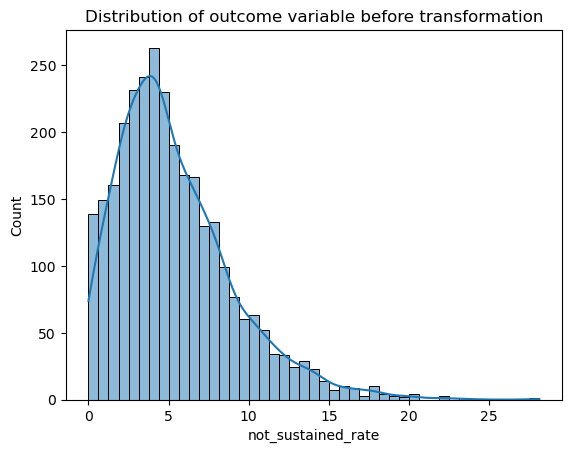

In [86]:
sns.histplot(data_transformed['not_sustained_rate'], kde=True )
plt.title('Distribution of outcome variable before transformation');

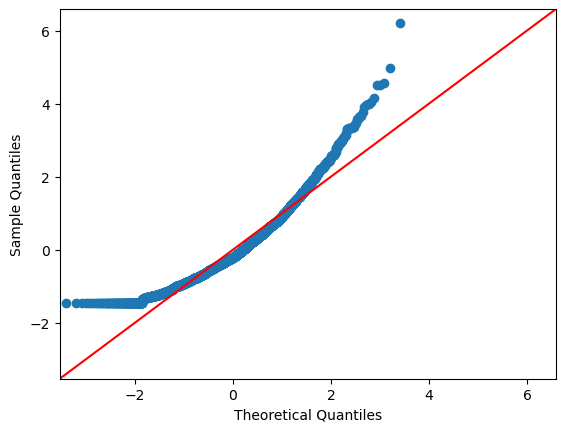

In [204]:
sm.qqplot(data_transformed.not_sustained_rate, fit=True, line="45")
plt.show()

In [205]:
#y_transformer = PowerTransformer()

In [206]:
#data_transformed[['not_sustained_rate']] = y_transformer.fit_transform(data_transformed[['not_sustained_rate']])

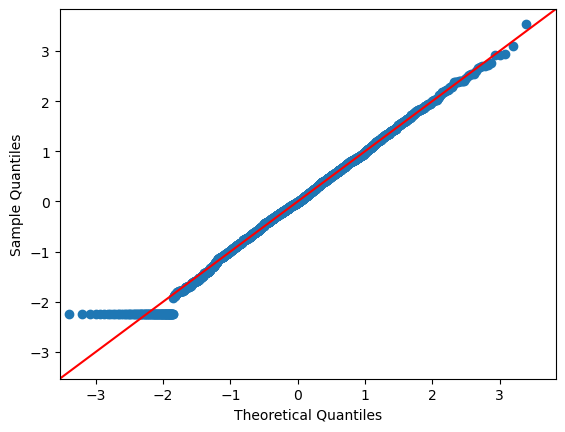

In [81]:
sm.qqplot(data_transformed.not_sustained_rate, fit=True, line="45")
plt.show()

In [101]:
data_transformed['not_sustained_rate'] = data_transformed['not_sustained_rate'] + 1

In [103]:
data_transformed['not_sustained_rate'] = np.sqrt(data_transformed['not_sustained_rate'])

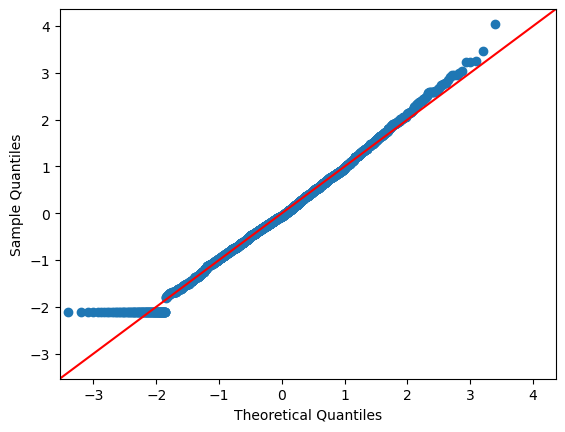

In [98]:
sm.qqplot(data_transformed.not_sustained_rate, fit=True, line="45")
plt.show()

In [108]:
data_transformed['not_sustained_rate'] = data_transformed['not_sustained_rate'] + 1

In [109]:
data_transformed['not_sustained_rate'] = np.log(data_transformed['not_sustained_rate'])

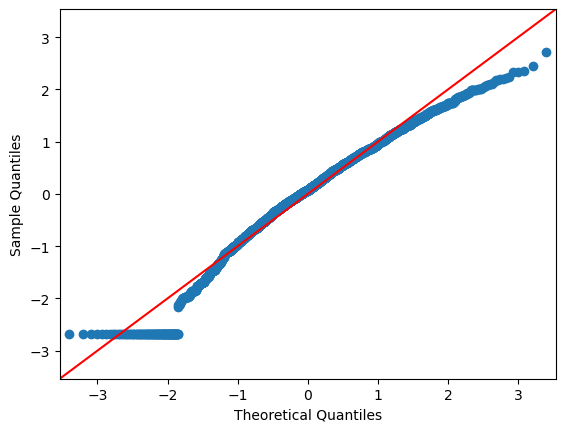

In [110]:
sm.qqplot(data_transformed.not_sustained_rate, fit=True, line="45")
plt.show()

In [121]:
y_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

In [122]:
data_transformed[['not_sustained_rate']] = y_transformer.fit_transform(data_transformed[['not_sustained_rate']])

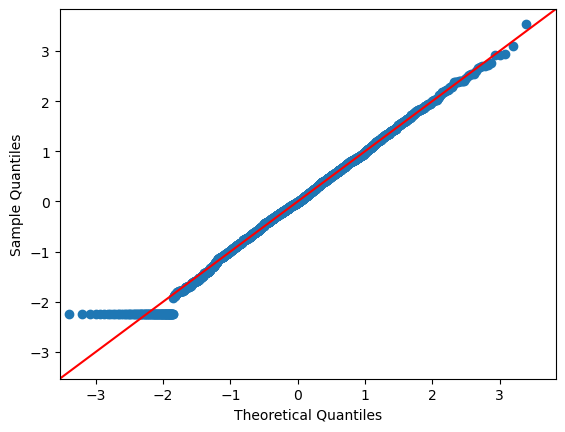

In [123]:
sm.qqplot(data_transformed.not_sustained_rate, fit=True, line="45")
plt.show()

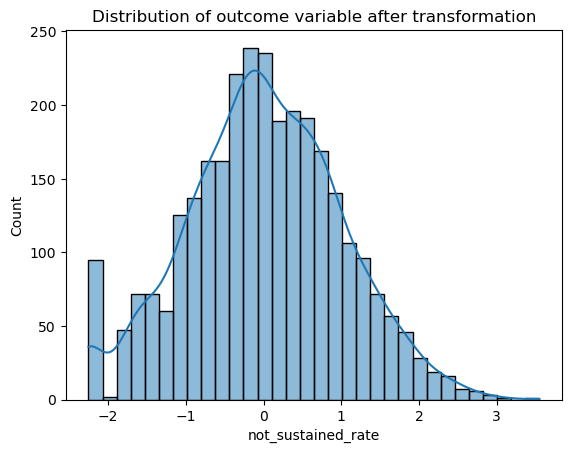

In [124]:
sns.histplot(data_transformed['not_sustained_rate'], kde=True )
plt.title('Distribution of outcome variable after transformation');

### Specify variables

In [87]:
predictors = data_transformed[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'denomination_Christian',
#'denomination_No faith',
'denomination_Other faith',
#'type_Academy converter',
'type_Academy sponsor led',
'type_Community school',
'type_Foundation school',
'type_Free schools',
'type_Voluntary aided school',
'type_Voluntary controlled school'
]]

In [104]:
controls = data_transformed[[
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

In [105]:
predictors_controls = data_transformed[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'denomination_Christian',
#'denomination_No faith',
'denomination_Other faith',
#'type_Academy converter',
'type_Academy sponsor led',
'type_Community school',
'type_Foundation school',
'type_Free schools',
'type_Voluntary aided school',
'type_Voluntary controlled school',
# controls
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

### Run model - Predictors only

In [106]:
predictors_results = {}

for p in predictors:
    x = data_transformed[p]
    y = data_transformed['not_sustained_rate']

    model = sm.OLS(y, x).fit()

    predictors_results[p] = model.summary()
    

In [107]:
predictors_results

{'headcount': <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.528
 Model:                            OLS   Adj. R-squared (uncentered):              0.528
 Method:                 Least Squares   F-statistic:                              3321.
 Date:                Wed, 23 Oct 2024   Prob (F-statistic):                        0.00
 Time:                        14:18:50   Log-Likelihood:                         -8661.3
 No. Observations:                2972   AIC:                                  1.732e+04
 Df Residuals:                    2971   BIC:                                  1.733e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust                                                  
                  coef    std err          t   

In [108]:
x = predictors

In [109]:
y = data_transformed['not_sustained_rate']

In [110]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              821.9
Date:                Wed, 23 Oct 2024   Prob (F-statistic):                        0.00
Time:                        14:18:54   Log-Likelihood:                         -7335.1
No. Observations:                2972   AIC:                                  1.470e+04
Df Residuals:                    2957   BIC:                                  1.479e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
headcount                          8.64e-05      0.000      0.562      0.574      -0.000       0.000
pupil_teacher_ratio                  0.1974      0.012     16.246      0.000       0.174       0.221
assistant_teacher_ratio              3.8459      0.462      8.324      0.000       2.940       4.752
susp_rate                            0.0334      0.003     13.157      0.000       0.028       0.038
Progress_8                          -2.1653      0.124    -17.432      0.000      -2.409      -1.922
post16                              -0.8017      0.124     -6.464      0.000      -1.045      -0.559
Ofsted_rating                       -0.0175      0.047     -0.372      0.710      -0.110       0.075
denomination_Christian              -0.0460      0.163     -0.283      0.777      -0.365       0.273
denomination_Other faith             0.5105      0.539      0.948      0.343      -0.546       1.566
type_Academy sponsor led             2.4558      0.138     17.746      0.000       2.184       2.727
type_Community school                0.5556      0.191      2.912      0.004       0.181       0.930
type_Foundation school               1.1852      0.247      4.806      0.000       0.702       1.669
type_Free schools                    1.1134      0.287      3.876      0.000       0.550       1.677
type_Voluntary aided school          0.4638      0.252      1.838      0.066      -0.031       0.959
type_Voluntary controlled school    -0.4533      0.633     -0.716      0.474      -1.695       0.788
==============================================================================
Omnibus:                      353.519   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              686.998
Skew:                           0.757   Prob(JB):                    6.61e-150
Kurtosis:                       4.805   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [113]:
vif_values

predictor        VIF
14  type_Voluntary controlled school   1.027438
11            type_Foundation school   1.128274
8           denomination_Other faith   1.132757
12                 type_Free schools   1.148217
10             type_Community school   1.221987
6                      Ofsted_rating   1.411623
4                         Progress_8   1.430254
13       type_Voluntary aided school   1.476594
7             denomination_Christian   1.660873
9           type_Academy sponsor led   1.664255
3                          susp_rate   2.353545
5                             post16   3.492085
2            assistant_teacher_ratio   5.244948
0                          headcount  11.942751
1                pupil_teacher_ratio  15.565261

### Add in control variables

In [114]:
controls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Attainment_8           2972 non-null   float64
 1   absence_rate_non_excl  2972 non-null   float64
 2   selective              2972 non-null   int64  
 3   perc_boys              2972 non-null   float64
 4   FSM                    2972 non-null   float64
 5   sen_support            2972 non-null   float64
 6   White_British          2972 non-null   float64
 7   KS2_history            2972 non-null   float64
 8   IMD                    2972 non-null   float64
 9   urban_binary           2972 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 255.4 KB


In [115]:
control_results = {}

for c in controls:
    x = data_transformed[c]
    y = data_transformed['not_sustained_rate']

    model = sm.OLS(y, x).fit()

    control_results[c] = model.summary()
    

In [116]:
control_results

{'Attainment_8': <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.550
 Model:                            OLS   Adj. R-squared (uncentered):              0.550
 Method:                 Least Squares   F-statistic:                              3631.
 Date:                Wed, 23 Oct 2024   Prob (F-statistic):                        0.00
 Time:                        14:19:01   Log-Likelihood:                         -8589.7
 No. Observations:                2972   AIC:                                  1.718e+04
 Df Residuals:                    2971   BIC:                                  1.719e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust                                                  
                    coef    std err         

In [117]:
x = predictors_controls

In [118]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.859
Model:                            OLS   Adj. R-squared (uncentered):              0.858
Method:                 Least Squares   F-statistic:                              720.9
Date:                Wed, 23 Oct 2024   Prob (F-statistic):                        0.00
Time:                        14:19:05   Log-Likelihood:                         -6860.2
No. Observations:                2972   AIC:                                  1.377e+04
Df Residuals:                    2947   BIC:                                  1.392e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
headcount                           -0.0001      0.000     -0.994      0.320      -0.000       0.000
pupil_teacher_ratio                 -0.0252      0.021     -1.214      0.225      -0.066       0.016
assistant_teacher_ratio              0.3563      0.417      0.854      0.393      -0.462       1.174
susp_rate                            0.0140      0.002      5.996      0.000       0.009       0.019
Progress_8                           0.7556      0.234      3.231      0.001       0.297       1.214
post16                              -0.8509      0.109     -7.816      0.000      -1.064      -0.637
Ofsted_rating                       -0.0392      0.041     -0.963      0.335      -0.119       0.041
denomination_Christian              -0.1650      0.143     -1.155      0.248      -0.445       0.115
denomination_Other faith            -0.1244      0.473     -0.263      0.792      -1.051       0.802
type_Academy sponsor led             0.9080      0.130      7.011      0.000       0.654       1.162
type_Community school               -0.1388      0.167     -0.832      0.406      -0.466       0.188
type_Foundation school               0.0186      0.214      0.087      0.931      -0.402       0.439
type_Free schools                    0.3554      0.253      1.402      0.161      -0.142       0.852
type_Voluntary aided school         -0.1735      0.219     -0.794      0.427      -0.602       0.255
type_Voluntary controlled school    -0.7353      0.541     -1.359      0.174      -1.796       0.325
Attainment_8                        -0.1262      0.020     -6.202      0.000      -0.166      -0.086
absence_rate_non_excl                0.1280      0.032      3.971      0.000       0.065       0.191
selective                            1.0684      0.339      3.153      0.002       0.404       1.733
perc_boys                            0.0081      0.003      2.924      0.003       0.003       0.014
FSM                                  0.1013      0.007     15.278      0.000       0.088       0.114
sen_support                          0.0280      0.010      2.740      0.006       0.008       0.048
White_British                        0.0204      0.002      9.429      0.000       0.016       0.025
KS2_history                          0.0574      0.012      4.715      0.000       0.034       0.081
IMD                                 -0.0422      0.021     -2.058      0.040      -0.082      -0.002
urban_binary                         0.5087      0.143      3.546      0.000       0.227       0.790
==============================================================================
Omnibus:                      390.525   Durbin-Watson:                   1.79

### drop non-sig predictors

In [121]:
x = data_transformed[[
#'headcount',
#'pupil_teacher_ratio',
#'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
#'Ofsted_rating',
#'denomination_Christian',
#'denomination_No faith',
#'denomination_Other faith',
#'type_Academy converter',
#'type_Academy sponsor led',
#'type_Community school',
#'type_Foundation school',
#'type_Free schools',
#'type_Voluntary aided school',
#'type_Voluntary controlled school',
    
# controls
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

In [122]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.856
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              1354.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):                        0.00
Time:                        14:19:17   Log-Likelihood:                         -6895.2
No. Observations:                2972   AIC:                                  1.382e+04
Df Residuals:                    2959   BIC:                                  1.389e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
susp_rate                 0.0161      0.002      7.035      0.000       0.012       0.021
Progress_8                0.9862      0.230      4.296      0.000       0.536       1.436
post16                   -0.8659      0.100     -8.623      0.000      -1.063      -0.669
Attainment_8             -0.1424      0.020     -7.172      0.000      -0.181      -0.103
absence_rate_non_excl     0.1295      0.032      4.019      0.000       0.066       0.193
selective                 1.3771      0.323      4.263      0.000       0.744       2.010
perc_boys                 0.0089      0.003      3.200      0.001       0.003       0.014
FSM                       0.1149      0.006     18.124      0.000       0.103       0.127
sen_support               0.0306      0.010      3.003      0.003       0.011       0.051
White_British             0.0220      0.002     10.312      0.000       0.018       0.026
KS2_history               0.0566      0.011      5.121      0.000       0.035       0.078
IMD                      -0.0462      0.020     -2.285      0.022      -0.086      -0.007
urban_binary              0.4369      0.140      3.130      0.002       0.163       0.711
==============================================================================
Omnibus:                      415.804   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1056.522
Skew:                           0.778   Prob(JB):                    3.79e-230
Kurtosis:                       5.471   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
model.aic

13816.319696377921

### VIF scores and corr matrix

In [124]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [125]:
vif_values

predictor         VIF
0               susp_rate    2.582537
5               selective    2.724701
2                  post16    3.079255
1              Progress_8    6.570882
11                    IMD    7.994721
12           urban_binary    8.153859
8             sen_support    9.902352
6               perc_boys   10.626256
9           White_British   10.909859
7                     FSM   15.046168
4   absence_rate_non_excl   42.010887
3            Attainment_8  445.927778
10            KS2_history  650.273177

In [126]:
x.describe()

susp_rate   Progress_8       post16  Attainment_8  \
count  2972.000000  2972.000000  2972.000000   2972.000000   
mean     20.286441    -0.001413     0.625841     47.261137   
std      24.449683     0.505607     0.483986      9.261298   
min       0.000000    -3.380000     0.000000     18.800000   
25%       6.619397    -0.330000     0.000000     41.300000   
50%      13.096390    -0.010000     1.000000     46.100000   
75%      24.544380     0.330000     1.000000     51.500000   
max     358.064520     2.370000     1.000000     87.600000   

       absence_rate_non_excl    selective    perc_boys          FSM  \
count            2972.000000  2972.000000  2972.000000  2972.000000   
mean                8.819434     0.053499    50.348293    24.482470   
std                 2.263271     0.225065    16.637625    12.930734   
min                 3.034038     0.000000     0.000000     1.300000   
25%                 7.330413     0.000000    49.178838    14.700000   
50%                 8.653188     0.000000    50.977719    22.500000   
75%                10.098754     0.000000    53.044672    32.725000   
max                32.617429     1.000000   100.000000    75.400000   

       sen_support  White_British  KS2_history         IMD  urban_binary  
count  2972.000000    2972.000000  2972.000000  2972.00000   2972.000000  
mean     12.866762      63.886137   104.437248     5.66319      0.857335  
std       5.493081      28.961852     2.745410     2.81924      0.349790  
min       0.403226       0.000000    92.100000     1.00000      0.000000  
25%       9.227085      44.400000   102.800000     3.00000      1.000000  
50%      12.608697      75.300000   104.200000     6.00000      1.000000  
75%      16.039934      87.300000   105.500000     8.00000      1.000000  
max      48.316252      99.300000   117.400000    10.00000      1.000000

In [240]:
vars = x.columns.tolist()
vars

['susp_rate',
 'Progress_8',
 'post16',
 'Attainment_8',
 'absence_rate_non_excl',
 'selective',
 'perc_boys',
 'FSM',
 'sen_support',
 'White_British',
 'KS2_history',
 'IMD',
 'urban_binary']

In [241]:
vars_for_corr = data_transformed[[
'susp_rate',
 'Progress_8',
 'post16',
 'Attainment_8',
 'absence_rate_non_excl',
 'selective',
 'perc_boys',
 'FSM',
 'sen_support',
 'White_British',
 'KS2_history',
 'IMD',
 'urban_binary'
]]


In [242]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

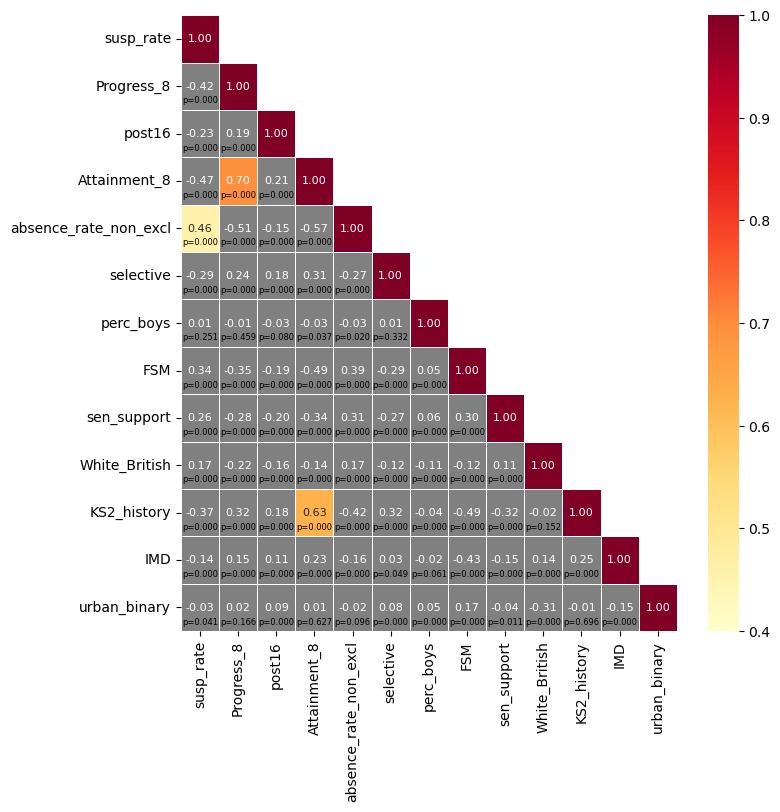

In [243]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


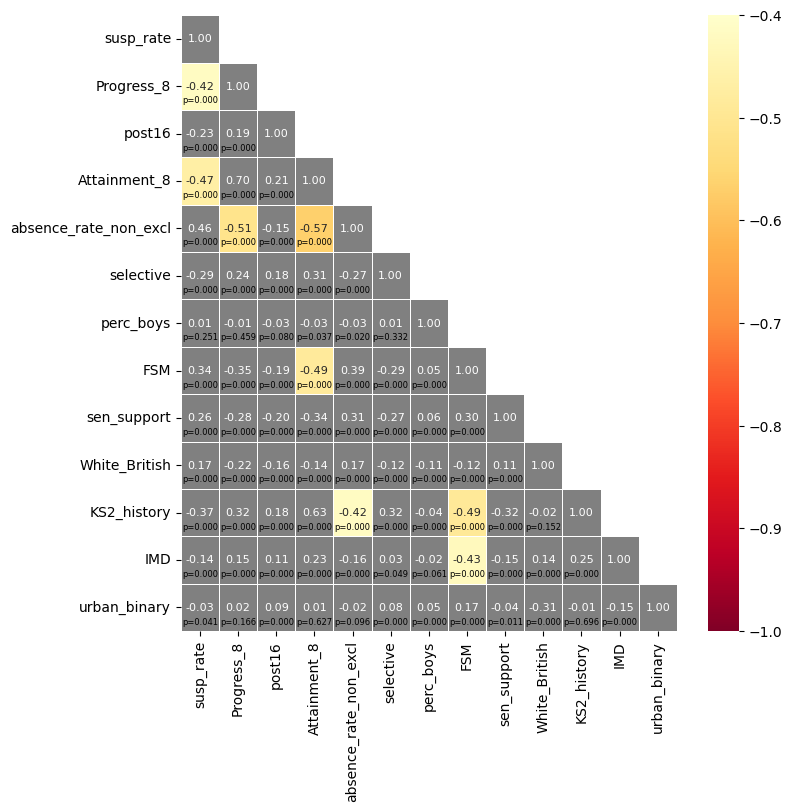

In [244]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

### Visualise

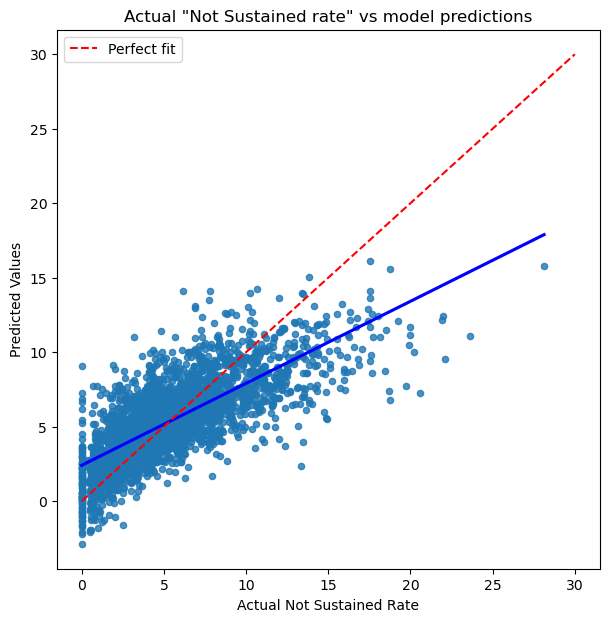

In [245]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=data_transformed['not_sustained_rate'], 
            y=model.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            ci=None
           )

plt.plot([0, 30], 
         [0, 30], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Actual "Not Sustained rate" vs model predictions')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

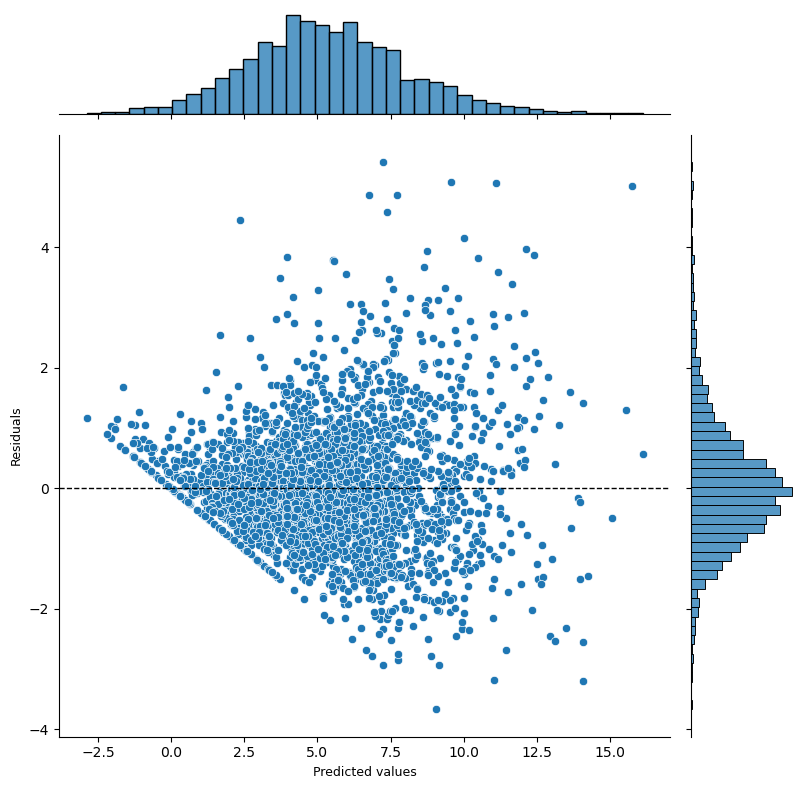

In [247]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Predicted values', 'Residuals', fontsize=9);

#### Coefficient plot

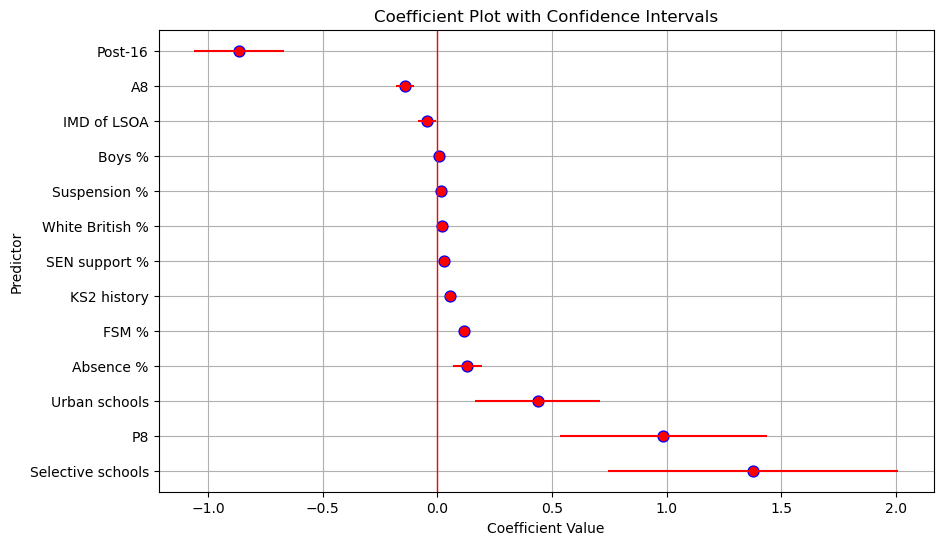

In [250]:
# extract coefficients and confidence intervals
coef = model.params
conf = model.conf_int()

# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1]
}).reset_index().rename(columns={'index': 'Predictor'})

#coef_df = coef_df[coef_df['Predictor'] != 'const']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')

# rename labels using dictionary
coef_df['Predictor'] = coef_df['Predictor'].map(corr_names)

# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df['Coefficient'], coef_df['Predictor'], 
             xerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

In [184]:
x = data_transformed[[

'susp_rate',
'Progress_8',
'post16',

]]

In [185]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           urban_binary   R-squared (uncentered):                   0.671
Model:                            OLS   Adj. R-squared (uncentered):              0.670
Method:                 Least Squares   F-statistic:                              2015.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):                        0.00
Time:                        11:27:34   Log-Likelihood:                         -2338.2
No. Observations:                2972   AIC:                                      4682.
Df Residuals:                    2969   BIC:                                      4700.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
susp_rate      0.0109      0.000     28.915      0.000       0.010       0.012
Progress_8     0.1070      0.022      4.910      0.000       0.064       0.150
post16         0.6958      0.014     48.726      0.000       0.668       0.724
==============================================================================
Omnibus:                      385.769   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.054
Skew:                          -0.806   Prob(JB):                    1.00e-167
Kurtosis:                       4.901   Cond. No.                         73.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
model.aic

4682.34988737518

In [187]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [188]:
vif_values

predictor       VIF
1  Progress_8  1.274719
2      post16  1.341831
0   susp_rate  1.498323

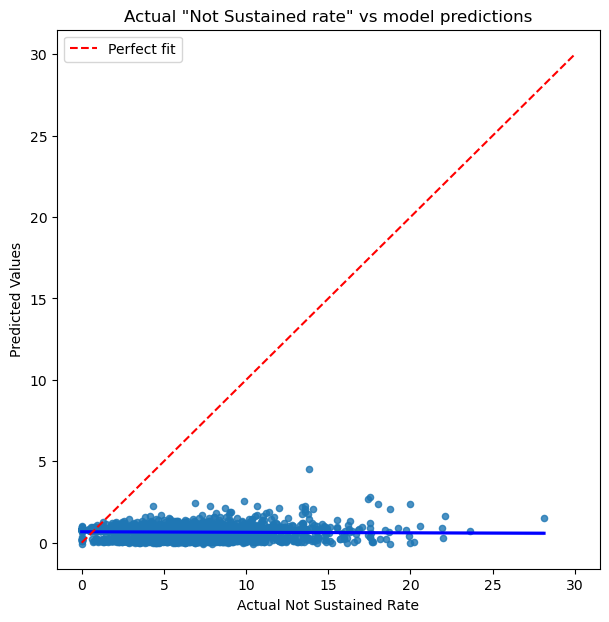

In [189]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=data_transformed['not_sustained_rate'], 
            y=model.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            #ci=None
           )

plt.plot([0, 30], 
         [0, 30], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Actual "Not Sustained rate" vs model predictions')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

# archived

### Stepwise model

In [113]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [136]:
model2 = LinearRegression()
sfs = SFS(model2, 
          k_features='best', 
          forward=True, 
          floating=False, 
          scoring='r2', 
          cv=5)

# Fit the model
sfs.fit(x, y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 37),
                          scoring='r2')

#### selected features

In [137]:
selected_features = sfs.k_feature_names_
print("Selected Features:", selected_features)

Selected Features: ('perc_boys', 'headcount', 'perm_excl_rate', 'susp_rate', 'KS2_history', 'Attainment_8', 'Progress_8', 'KS4_pass_rate', 'post16', 'sen_support', 'IMD', 'pupil_teacher_ratio', 'assistant_teacher_ratio', 'absence_rate_non_excl', 'urban_binary', 'type_Academy sponsor led', 'type_Community school', 'type_Voluntary aided school', 'type_Voluntary controlled school', 'denomination_Christian', 'denomination_Other faith', 'school_sex_Boys', 'school_sex_Girls', 'region_new_Midlands', 'region_new_North')


In [139]:
print("Cross-validation score (R^2):", sfs.k_score_)

Cross-validation score (R^2): 0.4891484521192876


In [141]:
selected_features = list(sfs.k_feature_names_)
model_sfs = LinearRegression()
model_sfs.fit(x[selected_features], y)

LinearRegression()

#### Re-run linear regression with selected features

In [128]:
x_stepwise = data_transformed[[
'perc_boys', 
    'headcount', 
    'perm_excl_rate', 
    'susp_rate', 
    'KS2_history', 
    'Attainment_8', 
    'Progress_8', 
    'KS4_pass_rate', 
    'post16', 
    'sen_support', 
    'IMD', 
    'pupil_teacher_ratio', 
    'assistant_teacher_ratio', 
    'absence_rate_non_excl', 
    'urban_binary', 
    'type_Academy sponsor led', 
    'type_Community school', 
    'type_Voluntary aided school', 
    'type_Voluntary controlled school', 
    'denomination_Christian', 
    'denomination_Other faith', 
    'school_sex_Boys', 
    'school_sex_Girls', 
    'region_new_Midlands', 
    'region_new_North'
]]

In [129]:
y_stepwise = data_transformed['not_sustained_rate']

In [130]:
# fit the model
model_stepwise = sm.OLS(y_stepwise, x_stepwise).fit()

# make the predictions by the model
predictions_stepwise = model_stepwise.predict(x_stepwise) 

# print out the statistics
model_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.851
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                              670.9
Date:                Wed, 16 Oct 2024   Prob (F-statistic):                        0.00
Time:                        13:03:21   Log-Likelihood:                         -6951.7
No. Observations:                2972   AIC:                                  1.395e+04
Df Residuals:                    2947   BIC:                                  1.410e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
perc_boys                            0.0006      0.011      0.049      0.961      -0.022       0.023
headcount                           -0.0007      0.000     -4.571      0.000      -0.001      -0.000
perm_excl_rate                       0.4268      0.175      2.443      0.015       0.084       0.769
susp_rate                            0.0142      0.003      5.519      0.000       0.009       0.019
KS2_history                          0.1068      0.012      8.666      0.000       0.083       0.131
Attainment_8                        -0.1600      0.017     -9.233      0.000      -0.194      -0.126
Progress_8                           0.7091      0.199      3.557      0.000       0.318       1.100
KS4_pass_rate                        0.0053      0.004      1.219      0.223      -0.003       0.014
post16                              -0.7421      0.113     -6.555      0.000      -0.964      -0.520
sen_support                          0.0579      0.010      5.618      0.000       0.038       0.078
IMD                                 -0.1464      0.019     -7.876      0.000      -0.183      -0.110
pupil_teacher_ratio                 -0.0546      0.021     -2.589      0.010      -0.096      -0.013
assistant_teacher_ratio              0.8703      0.427      2.038      0.042       0.033       1.708
absence_rate_non_excl                0.2384      0.033      7.306      0.000       0.174       0.302
urban_binary                         0.8623      0.143      6.040      0.000       0.582       1.142
type_Academy sponsor led             1.3008      0.125     10.396      0.000       1.056       1.546
type_Community school               -0.2074      0.169     -1.228      0.219      -0.539       0.124
type_Voluntary aided school         -0.1310      0.224     -0.584      0.559      -0.571       0.309
type_Voluntary controlled school    -0.5184      0.557     -0.931      0.352      -1.610       0.573
denomination_Christian              -0.4676      0.146     -3.205      0.001      -0.754      -0.182
denomination_Other faith            -1.2117      0.479     -2.529      0.012      -2.151      -0.272
school_sex_Boys                     -0.2646      0.559     -0.474      0.636      -1.360       0.831
school_sex_Girls                    -0.8669      0.621     -1.395      0.163      -2.085       0.352
region_new_Midlands                  0.4571      0.124      3.679      0.000       0.213       0.701
region_new_North                     0.6622      0.117      5.678      0.000       0.434       0.891
==============================================================================
Omnibus:                      396.852   Durbin-Watson:                   1.81

#### Stepwise - take 2 (AIC)

In [204]:
def stepwise_selection_aic(x, y, initial_features=[]):
    included = list(initial_features)
    best_aic = np.inf
    
    while True:
        changed = False
        excluded = list(set(x.columns) - set(included))
        new_aic = pd.Series(index=excluded)
        
        # Forward step
        for new_feature in excluded:
            model = sm.OLS(y, sm.add_constant(x[included + [new_feature]])).fit()
            new_aic[new_feature] = model.aic
        best_aic_candidate = new_aic.min()
        
        # If the new model's AIC is lower, include the feature
        if best_aic_candidate < best_aic:
            best_feature = new_aic.idxmin()
            included.append(best_feature)
            best_aic = best_aic_candidate
            changed = True

        # Break if no improvement is possible
        if not changed:
            break
    
    return included

In [647]:
x

susp_rate  Progress_8  post16  pupil_teacher_ratio   FSM  \
1      15.51751        3.82       2                 13.0  41.2   
3      10.12730        4.61       2                 14.7  35.6   
4       6.37535        3.94       2                 11.9  61.8   
5       4.26005        3.96       2                 14.9  41.8   
6       9.25451        3.83       2                 12.2  34.3   
...         ...         ...     ...                  ...   ...   
3141    5.82955        4.01       2                 16.1  15.8   
3142    6.67568        3.85       2                 19.3  13.5   
3143    6.88235        4.28       1                 17.3  12.6   
3144    4.40716        4.43       2                 12.7   6.9   
3146   10.57722        3.73       1                 16.6  28.6   

      absence_rate_non_excl  perc_boys  selective  White_British  KS2_history  \
1                 10.803701  57.874466          1           11.8        105.1   
3                  7.769210   5.963971          1           39.8        107.1   
4                 11.246731  57.163114          1            4.9        103.5   
5                  8.103096  52.630023          1           12.4        103.2   
6                  7.963311  66.778160          1           47.3        106.0   
...                     ...        ...        ...            ...          ...   
3141               6.451853  49.863636          1           93.9        103.2   
3142               9.315132  51.270270          1           91.0        102.1   
3143               9.502841  52.176471          1           91.9        105.4   
3144               6.724354  50.659284          1           93.7        107.6   
3146               8.713654  51.819672          1           97.6        102.6   

      IMD  denomination_No faith  denomination_Other faith  \
1     8.0                      1                         0   
3     4.0                      1                         0   
4     2.0                      1                         0   
5     7.0                      1                         0   
6     5.0                      1                         0   
...   ...                    ...                       ...   
3141  4.0                      1                         0   
3142  8.0                      1                         0   
3143  9.0                      0                         0   
3144  8.0                      1                         0   
3146  4.0                      1                         0   

      Ofsted_rating_Good  Ofsted_rating_Requires improvement  \
1                      0                                   1   
3                      1                                   0   
4                      1                                   0   
5                      1                                   0   
6                      1                                   0   
...                  ...                                 ...   
3141                   1                                   0   
3142                   1                                   0   
3143                   1                                   0   
3144                   1                                   0   
3146                   1                                   0   

      Ofsted_rating_Inadequate  type_Academy sponsor led  \
1                            0                         1   
3                            0                         0   
4                            0                         0   
5                            0                         0   
6                            0                         0   
...                        ...                       ...   
3141                         0                         0   
3142                         0                         0   
3143                         0                         0   
3144                         0                         0   
3146                         0                         1   

     

In [215]:
selected_features = stepwise_selection_aic(x, y)
model_final = sm.OLS(y, x[selected_features]).fit()

print("Selected Features:", selected_features)

print(model_final.summary())

Selected Features: ['FSM', 'White_British', 'Attainment_8', 'susp_rate', 'post16', 'type_Academy sponsor led', 'region_new_London', 'absence_rate_non_excl', 'school_sex_Girls', 'KS2_history', 'Progress_8', 'urban_binary', 'KS4_headcount', 'sen_support', 'IMD', 'denomination_Christian', 'pupil_teacher_ratio']
                                 OLS Regression Results                                
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              1080.
Date:                Wed, 16 Oct 2024   Prob (F-statistic):                        0.00
Time:                        14:06:24   Log-Likelihood:                         -6840.1
No. Observations:                2972   AIC:                                  1.371e+04
Df Residuals:                    2955   BIC:                              

#### VIF - Multicolinearity

In [216]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x[selected_features].columns

vif_values['VIF'] = [variance_inflation_factor(x[selected_features].values, i) for i in range(x[selected_features].shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [217]:
vif_values

predictor         VIF
15    denomination_Christian    1.287900
8           school_sex_Girls    1.330605
5   type_Academy sponsor led    1.749413
6          region_new_London    1.926567
3                  susp_rate    2.679036
4                     post16    3.172684
10                Progress_8    4.555625
14                       IMD    8.019298
11              urban_binary    8.657724
13               sen_support   10.054102
12             KS4_headcount   12.103375
1              White_British   14.053113
0                        FSM   16.438353
7      absence_rate_non_excl   42.222787
16       pupil_teacher_ratio   59.804297
2               Attainment_8  246.438594
9                KS2_history  548.709969

In [218]:
x = data_transformed[['FSM', 
     'White_British', 
     #'Attainment_8', 
     'susp_rate', 
     'post16', 
     'type_Academy sponsor led', 
     'region_new_London', 
     #'absence_rate_non_excl', 
     'school_sex_Girls', 
     #'KS2_history', 
     'Progress_8', 
     'urban_binary', 
     #'KS4_headcount', 
     'sen_support', 
     #'IMD', 
     'denomination_Christian', 
     #'pupil_teacher_ratio'
                     ]]

y = data_transformed['not_sustained_rate']

In [219]:
model = sm.OLS(y, x).fit()

In [220]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              1623.
Date:                Wed, 16 Oct 2024   Prob (F-statistic):                        0.00
Time:                        14:07:58   Log-Likelihood:                         -6878.5
No. Observations:                2972   AIC:                                  1.378e+04
Df Residuals:                    2961   BIC:                                  1.384e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

Model description:
- used stepwise selection to identify the model with lowest AIC value which penalises the model for more predictors so seeks to ensure inclusion of an additional variable is added enough to the model fit to justify more predictors.
  
- model descriptors indicated issues of multicollinearity, confirmed by some very high VIF scores, so highest VIF scoring variables removed one at a time until all scores < 10
  
- plus additional removal of KS4 headcount and IMD as non-significant predictors. 

- high R-squared, but the model still has issues of multicolinearity (condition number above 30), skew and kurtosis, and residuals deviate from normality (sig omnibus and Jarque-Bera scores) which violates necessary assumptions for linear regression 

Key observations from this model:
- predictors of significantly higher NEET rates include: FSM rate, white British rate, suspension rate, Academy sponsor led school type, urban areas and SEN support rates
  
- predictors of signficantly lower NEET rates include: having post-16 provision, being in London, Girls only schools, higher progress 8 scores, and only just significant is Christian denomination schools (p<0.05)
  
- non signficant predictors are IMD of school LSOA

In [201]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [202]:
vif_values

predictor       VIF
6           school_sex_Girls  1.214595
10    denomination_Christian  1.230328
7                 Progress_8  1.603025
4   type_Academy sponsor led  1.701143
5          region_new_London  1.716892
2                  susp_rate  2.412887
3                     post16  2.756958
1              White_British  5.774695
8               urban_binary  6.489399
9                sen_support  8.944692
0                        FSM  9.190119

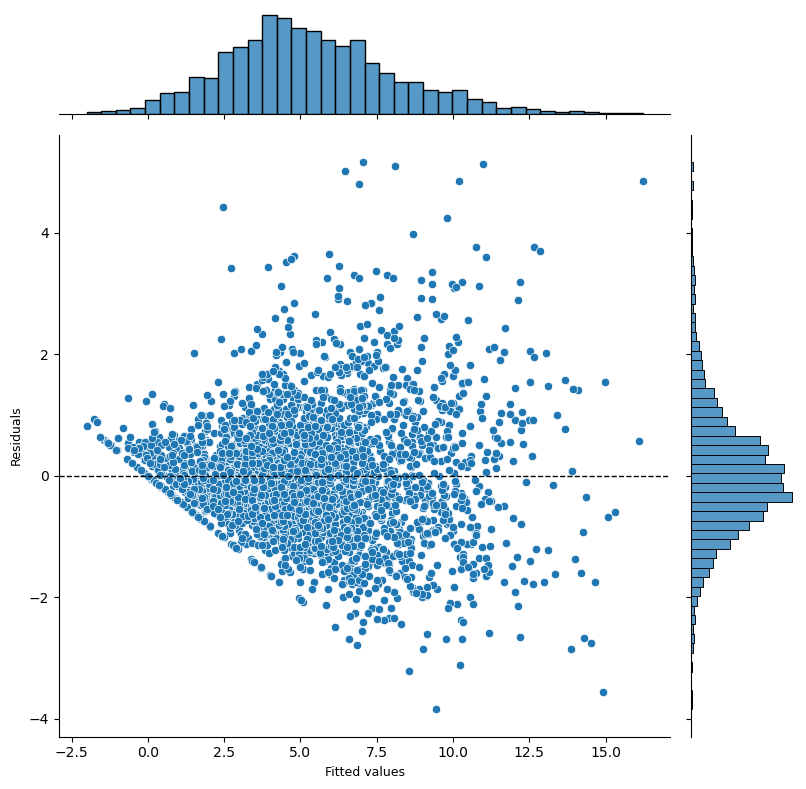

In [203]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Fitted values', 'Residuals', fontsize=9);

In [221]:
predictions = model.predict(x) 

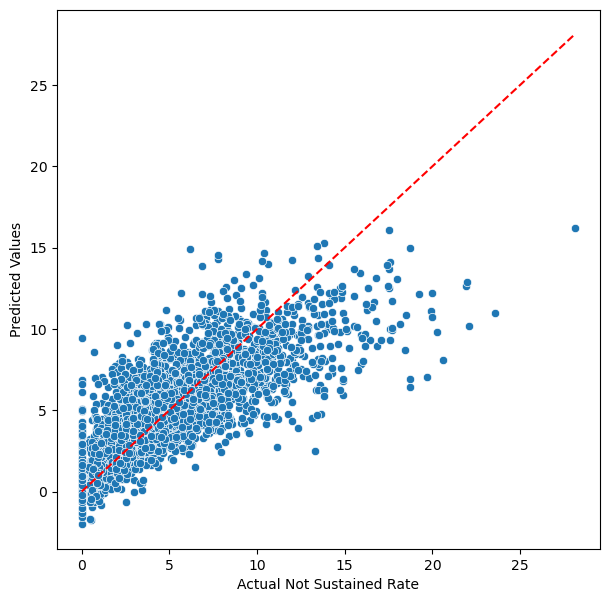

In [224]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot( x = data_transformed['not_sustained_rate'],
                y = model.fittedvalues)

plt.plot([0, data_transformed['not_sustained_rate'].max()], 
         [0, data_transformed['not_sustained_rate'].max()], 
         color='red', linestyle='--')

plt.title('')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values');

# Generalised Linear Model (GLM) 
- used when residuals / data not normally distributed (NEET outcome)
- does not assume linear relationship
- capacity to handle a more comprehensive array of data types

in this case, response variable is always positive, does not meet the assumption that constant change in a predictor leads to a constant change in the response variable

Gamma distribution: skewed positive continuous distribution 

In [410]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

from sklearn.preprocessing import PowerTransformer, OrdinalEncoder

In [411]:
ord_transformer = OrdinalEncoder()

In [412]:
import statsmodels.formula.api as smf

In [413]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   URN                      2972 non-null   int64   
 1   not_sustained_rate       2972 non-null   float64 
 2   total_absence            2972 non-null   float64 
 3   persistent_absence       2972 non-null   float64 
 4   urban_rural              2972 non-null   category
 5   denomination             2972 non-null   object  
 6   FSM                      2972 non-null   float64 
 7   White_British            2972 non-null   float64 
 8   EAL                      2972 non-null   float64 
 9   perc_boys                2972 non-null   float64 
 10  region_name              2972 non-null   object  
 11  school_name              2972 non-null   object  
 12  headcount                2972 non-null   float64 
 13  perm_excl_rate           2972 non-null   float64 
 14  susp_rate    

In [429]:
glm_data = data.drop(columns=['total_absence', 'persistent_absence', 'urban_rural',
                              'denomination', 'type',
                             'EAL', 'region_name', 'school_name', 'perm_excl_rate', 
                             'one_plus_susp_rate', 'KS4_headcount', 'KS4_pass_rate',
                             'POSTCODE', 'school_sex', 'ehcp', 'LSOA11', 'region_new'])

In [430]:
# convert to category 
glm_data['selective'] = pd.Categorical(glm_data['selective'])
glm_data['single_sex_binary'] = pd.Categorical(glm_data['single_sex_binary'])
glm_data['faith_binary'] = pd.Categorical(glm_data['faith_binary'])
glm_data['post16'] = pd.Categorical(glm_data['post16'])

In [431]:
glm_data[['Ofsted_rating']] = ord_transformer.fit_transform(glm_data[['Ofsted_rating']])

In [432]:
glm_data.describe()

URN  not_sustained_rate          FSM  White_British  \
count    2972.000000         2972.000000  2972.000000    2972.000000   
mean   133863.203567            5.354765    24.482470      63.886137   
std     12011.537035            3.670508    12.930734      28.961852   
min    100050.000000            0.000000     1.300000       0.000000   
25%    135760.750000            2.720164    14.700000      44.400000   
50%    137338.500000            4.591837    22.500000      75.300000   
75%    140412.750000            7.272727    32.725000      87.300000   
max    148866.000000           28.125000    75.400000      99.300000   

         perc_boys    headcount    susp_rate  KS2_history  Attainment_8  \
count  2972.000000  2972.000000  2972.000000  2972.000000   2972.000000   
mean     50.348293  1115.075034    20.286441   104.437248     47.261137   
std      16.637625   385.419425    24.449683     2.745410      9.261298   
min       0.000000    81.000000     0.000000    92.100000     18.800000   
25%      49.178838   847.000000     6.619397   102.800000     41.300000   
50%      50.977719  1082.000000    13.096390   104.200000     46.100000   
75%      53.044672  1359.000000    24.544380   105.500000     51.500000   
max     100.000000  2990.000000   358.064520   117.400000     87.600000   

        Progress_8  Ofsted_rating  sen_support         IMD  \
count  2972.000000    2972.000000  2972.000000  2972.00000   
mean     -0.001413       0.704240    12.866762     5.66319   
std       0.505607       1.125427     5.493081     2.81924   
min      -3.380000       0.000000     0.403226     1.00000   
25%      -0.330000       0.000000     9.227085     3.00000   
50%      -0.010000       0.000000    12.608697     6.00000   
75%       0.330000       2.000000    16.039934     8.00000   
max       2.370000       3.000000    48.316252    10.00000   

       pupil_teacher_ratio  assistant_teacher_ratio  absence_rate_non_excl  
count          2972.000000              2972.000000            2972.000000  
mean             16.897241                 0.230585               8.819434  
std               2.295918                 0.120709               2.263271  
min               5.300000                 0.000000               3.034038  
25%              15.600000                 0.100000               7.330413  
50%              16.800000                 0.200000               8.653188  
75%              18.000000                 0.300000              10.098754  
max              43.400000                 1.000000              32.617429

In [433]:
columns_with_zeros = ['not_sustained_rate', 'White_British', 'perc_boys', 'susp_rate', 
                       'assistant_teacher_ratio', 'Ofsted_rating']

In [434]:
glm_data[columns_with_zeros] = glm_data[columns_with_zeros] + 1

In [435]:
glm_data['Progress_8'] = glm_data['Progress_8'] +4

#### Predictors only

In [440]:
model_glm = smf.glm(formula = ('not_sustained_rate ~ headcount + pupil_teacher_ratio + assistant_teacher_ratio +'
                               'susp_rate + Progress_8 + Ofsted_rating +'
                               'C(post16, Treatment(reference="Post-16")) +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed"))'
                              ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [441]:
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2962
Model Family:                   Gamma   Df Model:                            9
Link Function:                    Log   Scale:                         0.20462
Method:                          IRLS   Log-Likelihood:                -6885.5
Date:                Thu, 23 Jan 2025   Deviance:                       608.16
Time:                        09:42:05   Pearson chi2:                     606.
No. Iterations:                    14   Pseudo R-squ. (CS):             0.5091
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            3.1219      0.141     22.148      0.000       2.846       3.398
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1422      0.020      7.228      0.000       0.104       0.181
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0912      0.022     -4.180      0.000      -0.134      -0.048
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.3856      0.029    -13.175      0.000      -0.443      -0.328
headcount                                                           -0.0002   2.48e-05     -6.991      0.000      -0.000      -0.000
pupil_teacher_ratio                                                 -0.0233      0.004     -6.346      0.000      -0.030      -0.016
assistant_teacher_ratio                                              0.4867      0.074      6.581      0.000       0.342       0.632
susp_rate                                                            0.0048      0.000     12.368      0.000       0.004       0.006
Progress_8                                                          -0.3550      0.020    -17.779      0.000      -0.394      -0.316
Ofsted_rating                                                       -0.0196      0.007     -2.622      0.009      -0.034      -0.005
====================================================================================================================================
"""

The Log link function means that the model is predicting the logarithm of the not_sustained_rate as a linear function of the predictors. When interpreting the coefficients, we often exponentiate them to understand their multiplicative effect on the original (non-log-transformed) scale of the dependent variable. For example:

An exponentiated coefficient of -0.0717 for C(denomination, Treatment(reference="No faith"))[T.Christian] means that being in a Christian-denominated school is associated with a multiplicative change of 
exp(−0.0717)≈0.93, or roughly a 7% decrease in the not_sustained_rate compared to "No faith" schools.

In [442]:
# transform coefficients to interpret them on their original scales
coefficients = model_glm.params
exp_coefficients = np.exp(coefficients)
p_values = model_glm.pvalues.round(4)

coef_df = pd.DataFrame({
    'Original Coefficients': coefficients,
    'Exponentiated Coefficients': exp_coefficients,
    'p-value': p_values
})

In [443]:
coef_df

Original Coefficients  \
Intercept                                                        3.121926   
C(post16, Treatment(reference="Post-16"))[T.No ...               0.142236   
C(faith_binary, Treatment(reference="No faith")...              -0.091155   
C(single_sex_binary, Treatment(reference="Mixed...              -0.385632   
headcount                                                       -0.000173   
pupil_teacher_ratio                                             -0.023300   
assistant_teacher_ratio                                          0.486720   
susp_rate                                                        0.004822   
Progress_8                                                      -0.355047   
Ofsted_rating                                                   -0.019606   

                                                    Exponentiated Coefficients  \
Intercept                                                            22.690044   
C(post16, Treatment(reference="Post-16"))[T.No ...                    1.152849   
C(faith_binary, Treatment(reference="No faith")...                    0.912877   
C(single_sex_binary, Treatment(reference="Mixed...                    0.680021   
headcount                                                             0.999827   
pupil_teacher_ratio                                                   0.976969   
assistant_teacher_ratio                                               1.626971   
susp_rate                                                             1.004833   
Progress_8                                                            0.701140   
Ofsted_rating                                                         0.980585   

                                                    p-value  
Intercept                                            0.0000  
C(post16, Treatment(reference="Post-16"))[T.No ...   0.0000  
C(faith_binary, Treatment(reference="No faith")...   0.0000  
C(single_sex_binary, Treatment(reference="Mixed...   0.0000  
headcount                                            0.0000  
pupil_teacher_ratio                                  0.0000  
assistant_teacher_ratio                              0.0000  
susp_rate                                            0.0000  
Progress_8                                           0.0000  
Ofsted_rating                                        0.0087

In [444]:
aic_value = model_glm.aic
print(f"AIC: {aic_value}")

AIC: 13790.964016782822


#### with controls

In [436]:
glm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   URN                      2972 non-null   int64   
 1   not_sustained_rate       2972 non-null   float64 
 2   FSM                      2972 non-null   float64 
 3   White_British            2972 non-null   float64 
 4   perc_boys                2972 non-null   float64 
 5   headcount                2972 non-null   float64 
 6   susp_rate                2972 non-null   float64 
 7   KS2_history              2972 non-null   float64 
 8   Attainment_8             2972 non-null   float64 
 9   Progress_8               2972 non-null   float64 
 10  selective                2972 non-null   category
 11  post16                   2972 non-null   category
 12  Ofsted_rating            2972 non-null   float64 
 13  sen_support              2972 non-null   float64 
 14  IMD          

In [446]:
np.unique(glm_data['urban_binary'])

array(['Rural', 'Urban'], dtype=object)

In [448]:
control_glm = smf.glm(formula = ('not_sustained_rate ~ headcount + pupil_teacher_ratio + assistant_teacher_ratio +'
                               'susp_rate + Progress_8 + Ofsted_rating +'
                               'C(post16, Treatment(reference="Post-16")) +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               # controls
                               'FSM + sen_support + perc_boys + White_British + Attainment_8 + ' 
                               'KS2_history + absence_rate_non_excl + IMD +' 
                               'C(selective, Treatment(reference="Non-selective")) + ' 
                               'C(urban_binary, Treatment(reference="Urban"))'), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [449]:
control_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2952
Model Family:                   Gamma   Df Model:                           19
Link Function:                    Log   Scale:                         0.13656
Method:                          IRLS   Log-Likelihood:                -6316.4
Date:                Thu, 23 Jan 2025   Deviance:                       419.16
Time:                        15:01:33   Pearson chi2:                     403.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.7839
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            9.9473      1.903      5.228      0.000       6.218      13.677
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1122      0.016      6.867      0.000       0.080       0.144
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0795      0.019     -4.265      0.000      -0.116      -0.043
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.1615      0.027     -6.014      0.000      -0.214      -0.109
C(selective, Treatment(reference="Non-selective"))[T.Selective]     -0.2137      0.053     -4.066      0.000      -0.317      -0.111
C(urban_binary, Treatment(reference="Urban"))[T.Rural]              -0.0856      0.022     -3.936      0.000      -0.128      -0.043
headcount                                                        -6.274e-05   2.19e-05     -2.859      0.004      -0.000   -1.97e-05
pupil_teacher_ratio                                                 -0.0031      0.003     -1.013      0.311      -0.009       0.003
assistant_teacher_ratio                                              0.0041      0.063      0.065      0.948      -0.119       0.127
susp_rate                                                            0.0012      0.000      3.356      0.001       0.000       0.002
Progress_8                                                          -0.2193      0.094     -2.345      0.019      -0.403      -0.036
Ofsted_rating                                                       -0.0096      0.006     -1.571      0.116      -0.022       0.002
FSM                                                                  0.0139      0.001     14.024      0.000       0.012       0.016
sen_support                                                          0.0025      0.002      1.587      0.113      -0.001       0.005
perc_boys                                                            0.0010      0.000      2.360      0.018       0.000       0.002
White_British                                                        0.0033      0.000     10.017      0.000       0.003       0.004
Attainment_8                                                         0.0120      0.009      1.322      0.186      -0.006       0.030
KS2_history                                                         -0.0808      0.019     -4.331      0.000      -0.117      -0.044
absence_rate_non_excl                                                0.0123      0.005      2.518      0.012       0.003       0.022
IMD                                                                 -0.0128      0.003     -4.146      0.000      -0.019      -0.007
========================

In [450]:
# transform coefficients to interpret them on their original scales
coefficients = control_glm.params
exp_coefficients = np.exp(coefficients)
p_values = control_glm.pvalues.round(4)

coef_df = pd.DataFrame({
    'Original Coefficients': coefficients,
    'Exponentiated Coefficients': exp_coefficients,
    'p-value': p_values
})

In [451]:
coef_df

Original Coefficients  \
Intercept                                                        9.947303   
C(post16, Treatment(reference="Post-16"))[T.No ...               0.112154   
C(faith_binary, Treatment(reference="No faith")...              -0.079477   
C(single_sex_binary, Treatment(reference="Mixed...              -0.161455   
C(selective, Treatment(reference="Non-selective...              -0.213705   
C(urban_binary, Treatment(reference="Urban"))[T...              -0.085604   
headcount                                                       -0.000063   
pupil_teacher_ratio                                             -0.003136   
assistant_teacher_ratio                                          0.004058   
susp_rate                                                        0.001171   
Progress_8                                                      -0.219325   
Ofsted_rating                                                   -0.009645   
FSM                                                              0.013861   
sen_support                                                      0.002453   
perc_boys                                                        0.001003   
White_British                                                    0.003253   
Attainment_8                                                     0.012008   
KS2_history                                                     -0.080799   
absence_rate_non_excl                                            0.012259   
IMD                                                             -0.012768   

                                                    Exponentiated Coefficients  \
Intercept                                                         20895.790466   
C(post16, Treatment(reference="Post-16"))[T.No ...                    1.118686   
C(faith_binary, Treatment(reference="No faith")...                    0.923600   
C(single_sex_binary, Treatment(reference="Mixed...                    0.850905   
C(selective, Treatment(reference="Non-selective...                    0.807587   
C(urban_binary, Treatment(reference="Urban"))[T...                    0.917958   
headcount                                                             0.999937   
pupil_teacher_ratio                                                   0.996869   
assistant_teacher_ratio                                               1.004067   
susp_rate                                                             1.001171   
Progress_8                                                            0.803060   
Ofsted_rating                                                         0.990402   
FSM                                                                   1.013958   
sen_support                                                           1.002456   
perc_boys                                                             1.001003   
White_British                                                         1.003259   
Attainment_8                                                          1.012080   
KS2_history                                                           0.922379   
absence_rate_non_excl                                                 1.012334   
IMD                                                                   0.987313   

                                                    p-value  
Intercept                                            0.0000  
C(post16, Treatment(reference="Post-16"))[T.No ...   0.0000  
C(faith_binary, Treatment(reference="No faith")...   0.0000  
C(single_sex_binary, Treatment(reference="Mixed...   0.0000  
C(selective, Treatment(reference="Non-selective...   0.0000  
C(urban_binary, Treatment(reference="Urban"))[T...   0.0001  
headcount                                            0.0043  
pupil_teacher_ratio                                  0.3109  
assistant_teacher_ratio                              0.9483  
susp_rate                                            0.0008  
Progress_8                   

In [608]:
control_aic_value = control_glm.aic
print(f"AIC: {control_aic_value}")

AIC: 12641.22902658434


## Forward selection

### Predictors

In [528]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
                                 'pupil_teacher_ratio + assistant_teacher_ratio'
                                #'headcount  +'
                                #'susp_rate + Progress_8 + Ofsted_rating +'
                               #'C(post16, Treatment(reference="Post-16")) +'
                               #'C(faith_binary, Treatment(reference="No faith")) +'
                               #'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                 # controls
                               #'FSM + sen_support + perc_boys + White_British + Attainment_8 + ' 
                               #'KS2_history + absence_rate_non_excl + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective")) + ' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [529]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2969
Model Family:                   Gamma   Df Model:                            2
Link Function:                    Log   Scale:                         0.32199
Method:                          IRLS   Log-Likelihood:                -7597.4
Date:                Thu, 23 Jan 2025   Deviance:                       963.00
Time:                        16:13:06   Pearson chi2:                     956.
No. Iterations:                    18   Pseudo R-squ. (CS):            0.07816
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.4595      0.128      3.590      0.000       0.209       0.710
pupil_teacher_ratio        -0.0166      0.005     -3.664      0.000      -0.026      -0.008
assistant_teacher_ratio     1.3471      0.086     15.595      0.000       1.178       1.516
===========================================================================================
"""

In [530]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 15200.72691309203


In [531]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
                                 'pupil_teacher_ratio + assistant_teacher_ratio + susp_rate'
                                #'headcount'
                                #'Progress_8 + Ofsted_rating +'
                               #'C(post16, Treatment(reference="Post-16")) +'
                               #'C(faith_binary, Treatment(reference="No faith")) +'
                               #'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                 # controls
                               #'FSM + sen_support + perc_boys + White_British + Attainment_8 + ' 
                               #'KS2_history + absence_rate_non_excl + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective")) + ' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [532]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2968
Model Family:                   Gamma   Df Model:                            3
Link Function:                    Log   Scale:                         0.26625
Method:                          IRLS   Log-Likelihood:                -7319.1
Date:                Thu, 23 Jan 2025   Deviance:                       805.83
Time:                        16:13:08   Pearson chi2:                     790.
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2570
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.7565      0.117      6.449      0.000       0.527       0.986
pupil_teacher_ratio        -0.0269      0.004     -6.492      0.000      -0.035      -0.019
assistant_teacher_ratio     1.0498      0.080     13.141      0.000       0.893       1.206
susp_rate                   0.0101      0.000     25.626      0.000       0.009       0.011
===========================================================================================
"""

In [533]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 14646.229672877123


In [534]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
                                 'pupil_teacher_ratio + assistant_teacher_ratio + susp_rate +'
                                'headcount'
                                #'Progress_8 + Ofsted_rating +'
                               #'C(post16, Treatment(reference="Post-16")) +'
                               #'C(faith_binary, Treatment(reference="No faith")) +'
                               #'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                 # controls
                               #'FSM + sen_support + perc_boys + White_British + Attainment_8 + ' 
                               #'KS2_history + absence_rate_non_excl + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective")) + ' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [535]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2967
Model Family:                   Gamma   Df Model:                            4
Link Function:                    Log   Scale:                         0.24418
Method:                          IRLS   Log-Likelihood:                -7259.7
Date:                Thu, 23 Jan 2025   Deviance:                       775.48
Time:                        16:13:09   Pearson chi2:                     724.
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3063
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.0794      0.116      9.314      0.000       0.852       1.307
pupil_teacher_ratio        -0.0229      0.004     -5.718      0.000      -0.031      -0.015
assistant_teacher_ratio     0.9903      0.077     12.898      0.000       0.840       1.141
susp_rate                   0.0091      0.000     23.476      0.000       0.008       0.010
headcount                  -0.0003   2.44e-05    -11.071      0.000      -0.000      -0.000
===========================================================================================
"""

In [536]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 14529.453327723128


In [537]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
                                 'pupil_teacher_ratio + assistant_teacher_ratio + susp_rate +'
                                'headcount +'
                                 'C(post16, Treatment(reference="Post-16")) '
                                #'Progress_8 + Ofsted_rating +'
                               
                               #'C(faith_binary, Treatment(reference="No faith")) +'
                               #'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                 # controls
                               #'FSM + sen_support + perc_boys + White_British + Attainment_8 + ' 
                               #'KS2_history + absence_rate_non_excl + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective")) + ' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [538]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2966
Model Family:                   Gamma   Df Model:                            5
Link Function:                    Log   Scale:                         0.23923
Method:                          IRLS   Log-Likelihood:                -7216.2
Date:                Thu, 23 Jan 2025   Deviance:                       754.10
Time:                        16:13:11   Pearson chi2:                     710.
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3319
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                   1.0839      0.115      9.442      0.000       0.859       1.309
C(post16, Treatment(reference="Post-16"))[T.No Post-16]     0.1945      0.021      9.256      0.000       0.153       0.236
pupil_teacher_ratio                                        -0.0234      0.004     -5.917      0.000      -0.031      -0.016
assistant_teacher_ratio                                     0.8572      0.078     11.020      0.000       0.705       1.010
susp_rate                                                   0.0087      0.000     22.557      0.000       0.008       0.009
headcount                                                  -0.0002    2.6e-05     -6.883      0.000      -0.000      -0.000
===========================================================================================================================
"""

In [539]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 14444.478470065329


In [540]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
                                 'pupil_teacher_ratio + assistant_teacher_ratio + susp_rate +'
                                'headcount + Ofsted_rating +'
                                 'C(post16, Treatment(reference="Post-16")) '
                                #'Progress_8'
                               
                               #'C(faith_binary, Treatment(reference="No faith")) +'
                               #'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                 # controls
                               #'FSM + sen_support + perc_boys + White_British + Attainment_8 + ' 
                               #'KS2_history + absence_rate_non_excl + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective")) + ' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [541]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2965
Model Family:                   Gamma   Df Model:                            6
Link Function:                    Log   Scale:                         0.24005
Method:                          IRLS   Log-Likelihood:                -7210.5
Date:                Thu, 23 Jan 2025   Deviance:                       751.39
Time:                        16:13:12   Pearson chi2:                     712.
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3335
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                   1.1407      0.116      9.800      0.000       0.913       1.369
C(post16, Treatment(reference="Post-16"))[T.No Post-16]     0.1956      0.021      9.293      0.000       0.154       0.237
pupil_teacher_ratio                                        -0.0238      0.004     -6.002      0.000      -0.032      -0.016
assistant_teacher_ratio                                     0.8463      0.078     10.852      0.000       0.693       0.999
susp_rate                                                   0.0089      0.000     22.868      0.000       0.008       0.010
headcount                                                  -0.0002   2.61e-05     -6.739      0.000      -0.000      -0.000
Ofsted_rating                                              -0.0266      0.008     -3.309      0.001      -0.042      -0.011
===========================================================================================================================
"""

In [542]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 14435.014803891416


In [543]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
                                 'pupil_teacher_ratio + assistant_teacher_ratio + susp_rate +'
                                'headcount + Ofsted_rating +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8'
                               
                               #'C(faith_binary, Treatment(reference="No faith")) +'
                               #'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                 # controls
                               #'FSM + sen_support + perc_boys + White_British + Attainment_8 + ' 
                               #'KS2_history + absence_rate_non_excl + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective")) + ' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [544]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2964
Model Family:                   Gamma   Df Model:                            7
Link Function:                    Log   Scale:                         0.21347
Method:                          IRLS   Log-Likelihood:                -6978.6
Date:                Thu, 23 Jan 2025   Deviance:                       646.44
Time:                        16:13:13   Pearson chi2:                     633.
No. Iterations:                    15   Pseudo R-squ. (CS):             0.4630
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                   3.1247      0.144     21.716      0.000       2.843       3.407
C(post16, Treatment(reference="Post-16"))[T.No Post-16]     0.1779      0.020      8.941      0.000       0.139       0.217
pupil_teacher_ratio                                        -0.0225      0.004     -6.006      0.000      -0.030      -0.015
assistant_teacher_ratio                                     0.6062      0.075      8.113      0.000       0.460       0.753
susp_rate                                                   0.0052      0.000     13.041      0.000       0.004       0.006
headcount                                                  -0.0001   2.47e-05     -4.329      0.000      -0.000   -5.85e-05
Ofsted_rating                                              -0.0309      0.008     -4.072      0.000      -0.046      -0.016
Progress_8                                                 -0.4284      0.019    -22.051      0.000      -0.467      -0.390
===========================================================================================================================
"""

In [545]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 13973.240224140216


In [546]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
                                 'pupil_teacher_ratio + assistant_teacher_ratio + susp_rate +'
                                'headcount + Ofsted_rating +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith"))'
                               #'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                 # controls
                               #'FSM + sen_support + perc_boys + White_British + Attainment_8 + ' 
                               #'KS2_history + absence_rate_non_excl + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective")) + ' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [547]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2963
Model Family:                   Gamma   Df Model:                            8
Link Function:                    Log   Scale:                         0.21232
Method:                          IRLS   Log-Likelihood:                -6967.9
Date:                Thu, 23 Jan 2025   Deviance:                       641.93
Time:                        16:13:13   Pearson chi2:                     629.
No. Iterations:                    15   Pseudo R-squ. (CS):             0.4686
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                     3.1440      0.144     21.902      0.000       2.863       3.425
C(post16, Treatment(reference="Post-16"))[T.No Post-16]       0.1719      0.020      8.642      0.000       0.133       0.211
C(faith_binary, Treatment(reference="No faith"))[T.Faith]    -0.1032      0.022     -4.646      0.000      -0.147      -0.060
pupil_teacher_ratio                                          -0.0233      0.004     -6.232      0.000      -0.031      -0.016
assistant_teacher_ratio                                       0.6030      0.075      8.092      0.000       0.457       0.749
susp_rate                                                     0.0051      0.000     12.908      0.000       0.004       0.006
headcount                                                    -0.0001   2.48e-05     -4.799      0.000      -0.000   -7.03e-05
Ofsted_rating                                                -0.0293      0.008     -3.875      0.000      -0.044      -0.014
Progress_8                                                   -0.4206      0.019    -21.596      0.000      -0.459      -0.382
=============================================================================================================================
"""

In [548]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 13953.78996404087


In [549]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
                                 'pupil_teacher_ratio + assistant_teacher_ratio + susp_rate +'
                                'headcount + Ofsted_rating +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed"))'
                               
                                 # controls
                               #'FSM + sen_support + perc_boys + White_British + Attainment_8 + ' 
                               #'KS2_history + absence_rate_non_excl + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective")) + ' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [550]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2962
Model Family:                   Gamma   Df Model:                            9
Link Function:                    Log   Scale:                         0.20462
Method:                          IRLS   Log-Likelihood:                -6885.5
Date:                Thu, 23 Jan 2025   Deviance:                       608.16
Time:                        16:13:14   Pearson chi2:                     606.
No. Iterations:                    14   Pseudo R-squ. (CS):             0.5091
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            3.1219      0.141     22.148      0.000       2.846       3.398
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1422      0.020      7.228      0.000       0.104       0.181
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0912      0.022     -4.180      0.000      -0.134      -0.048
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.3856      0.029    -13.175      0.000      -0.443      -0.328
pupil_teacher_ratio                                                 -0.0233      0.004     -6.346      0.000      -0.030      -0.016
assistant_teacher_ratio                                              0.4867      0.074      6.581      0.000       0.342       0.632
susp_rate                                                            0.0048      0.000     12.368      0.000       0.004       0.006
headcount                                                           -0.0002   2.48e-05     -6.991      0.000      -0.000      -0.000
Ofsted_rating                                                       -0.0196      0.007     -2.622      0.009      -0.034      -0.005
Progress_8                                                          -0.3550      0.020    -17.779      0.000      -0.394      -0.316
====================================================================================================================================
"""

In [551]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 13790.964016782846


### Controls

In [552]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
                                 'pupil_teacher_ratio + assistant_teacher_ratio + susp_rate +'
                                'headcount + Ofsted_rating +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                 # controls
                                 'FSM'
                               # + sen_support + perc_boys + White_British + Attainment_8 + ' 
                               #'KS2_history + absence_rate_non_excl + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective")) + ' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [553]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2961
Model Family:                   Gamma   Df Model:                           10
Link Function:                    Log   Scale:                         0.16275
Method:                          IRLS   Log-Likelihood:                -6566.1
Date:                Thu, 23 Jan 2025   Deviance:                       493.86
Time:                        16:13:19   Pearson chi2:                     482.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.6773
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            2.0809      0.132     15.793      0.000       1.823       2.339
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1270      0.018      7.232      0.000       0.093       0.161
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0835      0.019     -4.292      0.000      -0.122      -0.045
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.3653      0.026    -13.990      0.000      -0.416      -0.314
pupil_teacher_ratio                                                 -0.0072      0.003     -2.149      0.032      -0.014      -0.001
assistant_teacher_ratio                                              0.2731      0.067      4.104      0.000       0.143       0.403
susp_rate                                                            0.0025      0.000      6.915      0.000       0.002       0.003
headcount                                                           -0.0001   2.22e-05     -4.705      0.000      -0.000    -6.1e-05
Ofsted_rating                                                       -0.0204      0.007     -3.066      0.002      -0.034      -0.007
Progress_8                                                          -0.2224      0.019    -11.986      0.000      -0.259      -0.186
FSM                                                                  0.0187      0.001     26.884      0.000       0.017       0.020
====================================================================================================================================
"""

In [554]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 13154.19372035058


In [555]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
                                 'pupil_teacher_ratio + assistant_teacher_ratio + susp_rate +'
                                'headcount + Ofsted_rating +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                 # controls
                                 'FSM + absence_rate_non_excl'
                               # + sen_support + perc_boys + White_British + Attainment_8 + ' 
                               #'KS2_history  + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective"))' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [556]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2960
Model Family:                   Gamma   Df Model:                           11
Link Function:                    Log   Scale:                         0.16109
Method:                          IRLS   Log-Likelihood:                -6542.2
Date:                Thu, 23 Jan 2025   Deviance:                       486.16
Time:                        16:13:21   Pearson chi2:                     477.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.6861
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            1.5202      0.153      9.910      0.000       1.220       1.821
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1376      0.018      7.858      0.000       0.103       0.172
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0642      0.020     -3.288      0.001      -0.103      -0.026
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.3540      0.026    -13.602      0.000      -0.405      -0.303
pupil_teacher_ratio                                                 -0.0068      0.003     -2.057      0.040      -0.013      -0.000
assistant_teacher_ratio                                              0.2681      0.066      4.049      0.000       0.138       0.398
susp_rate                                                            0.0017      0.000      4.570      0.000       0.001       0.002
headcount                                                        -9.797e-05   2.21e-05     -4.429      0.000      -0.000   -5.46e-05
Ofsted_rating                                                       -0.0215      0.007     -3.247      0.001      -0.035      -0.009
Progress_8                                                          -0.1514      0.021     -7.210      0.000      -0.193      -0.110
FSM                                                                  0.0174      0.001     24.335      0.000       0.016       0.019
absence_rate_non_excl                                                0.0352      0.005      7.041      0.000       0.025       0.045
====================================================================================================================================
"""

In [557]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 13108.347020227087


In [558]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
                                 'pupil_teacher_ratio +' 
                                 'assistant_teacher_ratio + susp_rate +'
                                'headcount + Ofsted_rating +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                 # controls
                                  'FSM + absence_rate_non_excl + sen_support'
                               #  + perc_boys + White_British + Attainment_8 + ' 
                               #'KS2_history  + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective"))' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [559]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2959
Model Family:                   Gamma   Df Model:                           12
Link Function:                    Log   Scale:                         0.15839
Method:                          IRLS   Log-Likelihood:                -6521.3
Date:                Thu, 23 Jan 2025   Deviance:                       479.57
Time:                        16:13:23   Pearson chi2:                     469.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.6965
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            1.4406      0.153      9.432      0.000       1.141       1.740
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1343      0.017      7.725      0.000       0.100       0.168
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0610      0.019     -3.147      0.002      -0.099      -0.023
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.3464      0.026    -13.368      0.000      -0.397      -0.296
pupil_teacher_ratio                                                 -0.0053      0.003     -1.613      0.107      -0.012       0.001
assistant_teacher_ratio                                              0.2164      0.066      3.274      0.001       0.087       0.346
susp_rate                                                            0.0017      0.000      4.588      0.000       0.001       0.002
headcount                                                         -7.64e-05   2.22e-05     -3.445      0.001      -0.000   -3.29e-05
Ofsted_rating                                                       -0.0210      0.007     -3.188      0.001      -0.034      -0.008
Progress_8                                                          -0.1455      0.021     -6.976      0.000      -0.186      -0.105
FSM                                                                  0.0164      0.001     22.603      0.000       0.015       0.018
absence_rate_non_excl                                                0.0305      0.005      6.092      0.000       0.021       0.040
sen_support                                                          0.0104      0.002      6.462      0.000       0.007       0.014
====================================================================================================================================
"""

In [560]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 13068.627900591895


In [561]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
                                 #'pupil_teacher_ratio +' 
                                 'assistant_teacher_ratio + susp_rate +'
                                'headcount + Ofsted_rating +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                # controls
                                  'FSM + absence_rate_non_excl + sen_support'
                               #  + perc_boys + White_British + Attainment_8 + ' 
                               #'KS2_history  + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective"))' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [562]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2960
Model Family:                   Gamma   Df Model:                           11
Link Function:                    Log   Scale:                         0.15873
Method:                          IRLS   Log-Likelihood:                -6522.6
Date:                Thu, 23 Jan 2025   Deviance:                       479.98
Time:                        16:13:25   Pearson chi2:                     470.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.6955
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            1.3525      0.142      9.516      0.000       1.074       1.631
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1334      0.017      7.669      0.000       0.099       0.167
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0588      0.019     -3.037      0.002      -0.097      -0.021
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.3462      0.026    -13.350      0.000      -0.397      -0.295
assistant_teacher_ratio                                              0.2084      0.066      3.160      0.002       0.079       0.338
susp_rate                                                            0.0016      0.000      4.400      0.000       0.001       0.002
headcount                                                        -7.958e-05   2.21e-05     -3.597      0.000      -0.000   -3.62e-05
Ofsted_rating                                                       -0.0206      0.007     -3.130      0.002      -0.034      -0.008
Progress_8                                                          -0.1442      0.021     -6.916      0.000      -0.185      -0.103
FSM                                                                  0.0166      0.001     23.182      0.000       0.015       0.018
absence_rate_non_excl                                                0.0305      0.005      6.093      0.000       0.021       0.040
sen_support                                                          0.0106      0.002      6.579      0.000       0.007       0.014
====================================================================================================================================
"""

In [563]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 13069.28792936253


In [564]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
        
                                 'assistant_teacher_ratio + susp_rate +'
                                'headcount + Ofsted_rating +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                # controls
                                  'FSM + absence_rate_non_excl + sen_support + KS2_history'
                               #  + perc_boys + White_British + Attainment_8 + ' 
                               #'  + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective"))' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [565]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2959
Model Family:                   Gamma   Df Model:                           12
Link Function:                    Log   Scale:                         0.14314
Method:                          IRLS   Log-Likelihood:                -6381.1
Date:                Thu, 23 Jan 2025   Deviance:                       437.41
Time:                        16:13:26   Pearson chi2:                     424.
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7579
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            8.9993      0.453     19.848      0.000       8.111       9.888
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1371      0.017      8.302      0.000       0.105       0.169
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0641      0.018     -3.484      0.000      -0.100      -0.028
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.2097      0.026     -8.074      0.000      -0.261      -0.159
assistant_teacher_ratio                                              0.0195      0.064      0.306      0.759      -0.105       0.144
susp_rate                                                            0.0015      0.000      4.294      0.000       0.001       0.002
headcount                                                        -4.401e-05   2.11e-05     -2.088      0.037   -8.53e-05   -2.69e-06
Ofsted_rating                                                       -0.0098      0.006     -1.558      0.119      -0.022       0.003
Progress_8                                                          -0.1704      0.020     -8.594      0.000      -0.209      -0.132
FSM                                                                  0.0115      0.001     15.499      0.000       0.010       0.013
absence_rate_non_excl                                                0.0134      0.005      2.751      0.006       0.004       0.023
sen_support                                                          0.0056      0.002      3.639      0.000       0.003       0.009
KS2_history                                                         -0.0675      0.004    -17.664      0.000      -0.075      -0.060
====================================================================================================================================
"""

In [566]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 12788.272709875768


In [567]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
        
                                 #'assistant_teacher_ratio + '
                                 'susp_rate +'
                                'headcount +'
                                 #' Ofsted_rating +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                 # controls
                                  'FSM + absence_rate_non_excl + sen_support + KS2_history'
                               #  + perc_boys + White_British + Attainment_8 + ' 
                               #'  + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective"))' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [568]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2961
Model Family:                   Gamma   Df Model:                           10
Link Function:                    Log   Scale:                         0.14320
Method:                          IRLS   Log-Likelihood:                -6382.4
Date:                Thu, 23 Jan 2025   Deviance:                       437.77
Time:                        16:13:27   Pearson chi2:                     424.
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7576
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            9.1044      0.427     21.314      0.000       8.267       9.942
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1374      0.016      8.434      0.000       0.105       0.169
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0656      0.018     -3.569      0.000      -0.102      -0.030
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.2132      0.026     -8.247      0.000      -0.264      -0.163
susp_rate                                                            0.0015      0.000      4.188      0.000       0.001       0.002
headcount                                                        -4.554e-05    2.1e-05     -2.164      0.030   -8.68e-05   -4.29e-06
Progress_8                                                          -0.1709      0.020     -8.637      0.000      -0.210      -0.132
FSM                                                                  0.0114      0.001     15.440      0.000       0.010       0.013
absence_rate_non_excl                                                0.0130      0.005      2.671      0.008       0.003       0.023
sen_support                                                          0.0057      0.002      3.664      0.000       0.003       0.009
KS2_history                                                         -0.0683      0.004    -18.223      0.000      -0.076      -0.061
====================================================================================================================================
"""

In [569]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 12786.767061956061


In [570]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
        
                                 'susp_rate +'
                                'headcount +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                 # controls
                                  'FSM + absence_rate_non_excl + sen_support + KS2_history'
                                 '+ perc_boys'
                                 #+ White_British + Attainment_8 + ' 
                               #'  + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective"))' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [571]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2960
Model Family:                   Gamma   Df Model:                           11
Link Function:                    Log   Scale:                         0.14329
Method:                          IRLS   Log-Likelihood:                -6381.3
Date:                Thu, 23 Jan 2025   Deviance:                       437.47
Time:                        16:13:28   Pearson chi2:                     424.
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7575
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            9.0385      0.429     21.077      0.000       8.198       9.879
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1380      0.016      8.461      0.000       0.106       0.170
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0655      0.018     -3.562      0.000      -0.101      -0.029
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.2087      0.026     -7.974      0.000      -0.260      -0.157
susp_rate                                                            0.0014      0.000      4.121      0.000       0.001       0.002
headcount                                                        -4.516e-05   2.11e-05     -2.145      0.032   -8.64e-05    -3.9e-06
Progress_8                                                          -0.1679      0.020     -8.425      0.000      -0.207      -0.129
FSM                                                                  0.0114      0.001     15.449      0.000       0.010       0.013
absence_rate_non_excl                                                0.0140      0.005      2.852      0.004       0.004       0.024
sen_support                                                          0.0055      0.002      3.539      0.000       0.002       0.009
KS2_history                                                         -0.0682      0.004    -18.181      0.000      -0.076      -0.061
perc_boys                                                            0.0006      0.000      1.439      0.150      -0.000       0.001
====================================================================================================================================
"""

In [572]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 12786.667168702468


In [573]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
        
                                 'susp_rate +'
                                'headcount +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                  # controls
                                  'FSM + absence_rate_non_excl + sen_support + KS2_history'
                                 #'+ perc_boys'
                                 '+ White_British'
                                 # + Attainment_8 + ' 
                               #'  + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective"))' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [574]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2960
Model Family:                   Gamma   Df Model:                           11
Link Function:                    Log   Scale:                         0.13873
Method:                          IRLS   Log-Likelihood:                -6341.5
Date:                Thu, 23 Jan 2025   Deviance:                       426.13
Time:                        16:13:28   Pearson chi2:                     411.
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7749
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            8.5433      0.424     20.128      0.000       7.711       9.375
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1223      0.016      7.592      0.000       0.091       0.154
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0516      0.018     -2.841      0.004      -0.087      -0.016
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.1711      0.026     -6.619      0.000      -0.222      -0.120
susp_rate                                                            0.0011      0.000      3.220      0.001       0.000       0.002
headcount                                                        -2.836e-05   2.08e-05     -1.362      0.173   -6.92e-05    1.25e-05
Progress_8                                                          -0.1105      0.020     -5.400      0.000      -0.151      -0.070
FSM                                                                  0.0159      0.001     17.964      0.000       0.014       0.018
absence_rate_non_excl                                                0.0080      0.005      1.649      0.099      -0.002       0.017
sen_support                                                          0.0034      0.002      2.201      0.028       0.000       0.006
KS2_history                                                         -0.0676      0.004    -18.314      0.000      -0.075      -0.060
White_British                                                        0.0029      0.000      9.171      0.000       0.002       0.004
====================================================================================================================================
"""

In [575]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 12706.921454369092


In [576]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
        
                                 'susp_rate +'
                                #'headcount +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                # controls
                                  'FSM + absence_rate_non_excl + sen_support + KS2_history'
                                 '+ White_British'
                                 # + Attainment_8 + ' 
                               #'  + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective"))' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [577]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2961
Model Family:                   Gamma   Df Model:                           10
Link Function:                    Log   Scale:                         0.13960
Method:                          IRLS   Log-Likelihood:                -6342.3
Date:                Thu, 23 Jan 2025   Deviance:                       426.39
Time:                        16:13:29   Pearson chi2:                     413.
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7726
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            8.5491      0.426     20.079      0.000       7.715       9.384
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1299      0.015      8.577      0.000       0.100       0.160
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0487      0.018     -2.690      0.007      -0.084      -0.013
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.1631      0.025     -6.463      0.000      -0.213      -0.114
susp_rate                                                            0.0011      0.000      3.284      0.001       0.000       0.002
Progress_8                                                          -0.1117      0.021     -5.443      0.000      -0.152      -0.071
FSM                                                                  0.0160      0.001     18.083      0.000       0.014       0.018
absence_rate_non_excl                                                0.0079      0.005      1.628      0.104      -0.002       0.017
sen_support                                                          0.0036      0.002      2.370      0.018       0.001       0.007
KS2_history                                                         -0.0680      0.004    -18.426      0.000      -0.075      -0.061
White_British                                                        0.0030      0.000      9.319      0.000       0.002       0.004
====================================================================================================================================
"""

In [578]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 12706.67182705237


In [579]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
        
                                 'susp_rate +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                # controls
                                  'FSM + '
                                 #'absence_rate_non_excl + 
                                 'sen_support + KS2_history'
                                 '+ White_British'
                                 # + Attainment_8 + ' 
                               #'  + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective"))' 
                               #'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [580]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2962
Model Family:                   Gamma   Df Model:                            9
Link Function:                    Log   Scale:                         0.13947
Method:                          IRLS   Log-Likelihood:                -6343.7
Date:                Thu, 23 Jan 2025   Deviance:                       426.78
Time:                        16:13:30   Pearson chi2:                     413.
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7727
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            8.7803      0.400     21.931      0.000       7.996       9.565
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1271      0.015      8.442      0.000       0.098       0.157
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0525      0.018     -2.925      0.003      -0.088      -0.017
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.1611      0.025     -6.393      0.000      -0.210      -0.112
susp_rate                                                            0.0013      0.000      3.891      0.000       0.001       0.002
Progress_8                                                          -0.1256      0.019     -6.665      0.000      -0.163      -0.089
FSM                                                                  0.0163      0.001     18.634      0.000       0.015       0.018
sen_support                                                          0.0038      0.002      2.491      0.013       0.001       0.007
KS2_history                                                         -0.0692      0.004    -19.146      0.000      -0.076      -0.062
White_British                                                        0.0030      0.000      9.600      0.000       0.002       0.004
====================================================================================================================================
"""

In [581]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 12707.486190019867


In [582]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
        
                                 'susp_rate +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                # controls
                                  'FSM + '
                                 'sen_support + KS2_history'
                                 '+ White_British +'
                                 # + Attainment_8 + ' 
                               #'  + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective"))' 
                               'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [583]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2961
Model Family:                   Gamma   Df Model:                           10
Link Function:                    Log   Scale:                         0.13975
Method:                          IRLS   Log-Likelihood:                -6338.6
Date:                Thu, 23 Jan 2025   Deviance:                       425.34
Time:                        16:13:30   Pearson chi2:                     414.
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7728
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            8.9019      0.402     22.126      0.000       8.113       9.690
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1298      0.015      8.590      0.000       0.100       0.159
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0568      0.018     -3.152      0.002      -0.092      -0.021
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.1659      0.025     -6.567      0.000      -0.215      -0.116
C(urban_binary, Treatment(reference="Urban"))[T.Rural]              -0.0687      0.021     -3.234      0.001      -0.110      -0.027
susp_rate                                                            0.0013      0.000      3.865      0.000       0.001       0.002
Progress_8                                                          -0.1244      0.019     -6.591      0.000      -0.161      -0.087
FSM                                                                  0.0158      0.001     17.832      0.000       0.014       0.018
sen_support                                                          0.0039      0.002      2.569      0.010       0.001       0.007
KS2_history                                                         -0.0703      0.004    -19.354      0.000      -0.077      -0.063
White_British                                                        0.0032      0.000     10.012      0.000       0.003       0.004
====================================================================================================================================
"""

In [584]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 12699.11046023334


In [585]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
        
                                 'susp_rate +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                # controls
                                  'FSM + '
                                 'sen_support + KS2_history'
                                 '+ White_British +'
                                 ' + Attainment_8 + ' 
                               #'  + IMD +' 
                               #'C(selective, Treatment(reference="Non-selective"))' 
                               'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [586]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2960
Model Family:                   Gamma   Df Model:                           11
Link Function:                    Log   Scale:                         0.13979
Method:                          IRLS   Log-Likelihood:                -6338.6
Date:                Thu, 23 Jan 2025   Deviance:                       425.34
Time:                        16:13:32   Pearson chi2:                     414.
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7727
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            8.9171      1.844      4.836      0.000       5.303      12.531
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1298      0.015      8.589      0.000       0.100       0.159
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0568      0.018     -3.144      0.002      -0.092      -0.021
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.1659      0.025     -6.563      0.000      -0.215      -0.116
C(urban_binary, Treatment(reference="Urban"))[T.Rural]              -0.0687      0.021     -3.234      0.001      -0.110      -0.027
susp_rate                                                            0.0013      0.000      3.854      0.000       0.001       0.002
Progress_8                                                          -0.1251      0.086     -1.452      0.147      -0.294       0.044
FSM                                                                  0.0158      0.001     17.700      0.000       0.014       0.018
sen_support                                                          0.0039      0.002      2.569      0.010       0.001       0.007
KS2_history                                                         -0.0704      0.018     -3.885      0.000      -0.106      -0.035
White_British                                                        0.0032      0.000     10.002      0.000       0.003       0.004
Attainment_8                                                      7.084e-05      0.008      0.008      0.993      -0.016       0.016
====================================================================================================================================
"""

In [587]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 12701.10970420525


In [588]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
        
                                 'susp_rate +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                # controls
                                  'FSM + '
                                 'sen_support + KS2_history'
                                 '+ White_British +'
                                 #' + Attainment_8 + ' 
                               #'  + IMD +' 
                               'C(selective, Treatment(reference="Non-selective")) +' 
                               'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [589]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2960
Model Family:                   Gamma   Df Model:                           11
Link Function:                    Log   Scale:                         0.13948
Method:                          IRLS   Log-Likelihood:                -6335.6
Date:                Thu, 23 Jan 2025   Deviance:                       424.51
Time:                        16:13:33   Pearson chi2:                     413.
No. Iterations:                    12   Pseudo R-squ. (CS):             0.7739
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            8.1909      0.498     16.458      0.000       7.215       9.166
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1287      0.015      8.527      0.000       0.099       0.158
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0629      0.018     -3.449      0.001      -0.099      -0.027
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.1507      0.026     -5.809      0.000      -0.202      -0.100
C(selective, Treatment(reference="Non-selective"))[T.Selective]     -0.1148      0.046     -2.478      0.013      -0.206      -0.024
C(urban_binary, Treatment(reference="Urban"))[T.Rural]              -0.0682      0.021     -3.213      0.001      -0.110      -0.027
susp_rate                                                            0.0014      0.000      4.098      0.000       0.001       0.002
Progress_8                                                          -0.1249      0.019     -6.622      0.000      -0.162      -0.088
FSM                                                                  0.0161      0.001     18.006      0.000       0.014       0.018
sen_support                                                          0.0038      0.002      2.455      0.014       0.001       0.007
KS2_history                                                         -0.0635      0.005    -13.819      0.000      -0.072      -0.054
White_British                                                        0.0032      0.000      9.977      0.000       0.003       0.004
====================================================================================================================================
"""

In [590]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 12695.209828333353


In [591]:
forward_glm = smf.glm(formula = ('not_sustained_rate ~ '
        
                                 'susp_rate +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                # controls
                                  'FSM + '
                                 'sen_support + KS2_history'
                                 '+ White_British +'
                               'IMD +' 
                               'C(selective, Treatment(reference="Non-selective")) +' 
                               'C(urban_binary, Treatment(reference="Urban"))'
                                ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [592]:
forward_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2959
Model Family:                   Gamma   Df Model:                           12
Link Function:                    Log   Scale:                         0.13883
Method:                          IRLS   Log-Likelihood:                -6328.6
Date:                Thu, 23 Jan 2025   Deviance:                       422.57
Time:                        16:13:34   Pearson chi2:                     411.
No. Iterations:                    12   Pseudo R-squ. (CS):             0.7766
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            8.1852      0.497     16.484      0.000       7.212       9.158
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1251      0.015      8.288      0.000       0.096       0.155
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0734      0.018     -3.988      0.000      -0.109      -0.037
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.1563      0.026     -6.033      0.000      -0.207      -0.106
C(selective, Treatment(reference="Non-selective"))[T.Selective]     -0.1432      0.047     -3.059      0.002      -0.235      -0.051
C(urban_binary, Treatment(reference="Urban"))[T.Rural]              -0.0675      0.021     -3.186      0.001      -0.109      -0.026
susp_rate                                                            0.0014      0.000      4.100      0.000       0.001       0.002
Progress_8                                                          -0.1240      0.019     -6.592      0.000      -0.161      -0.087
FSM                                                                  0.0146      0.001     15.197      0.000       0.013       0.017
sen_support                                                          0.0037      0.002      2.441      0.015       0.001       0.007
KS2_history                                                         -0.0625      0.005    -13.614      0.000      -0.071      -0.054
White_British                                                        0.0033      0.000     10.258      0.000       0.003       0.004
IMD                                                                 -0.0114      0.003     -3.707      0.000      -0.017      -0.005
====================================================================================================================================
"""

In [593]:
aic_value = forward_glm.aic
print(f"AIC: {aic_value}")

AIC: 12683.271524071097


#### drop non sig

- assistant:teacher: 0.962
- headcount: 0.187
- x: A8: 0.094
- x: sen_support: 0.053
- x: ofsted: 0.054

In [654]:
final_glm = smf.glm(formula = ('not_sustained_rate ~ susp_rate + Progress_8 +'
                               'post16 + pupil_teacher_ratio + Ofsted_rating +'
                               'C(denomination, Treatment(reference="No faith")) + sen_support +'
                               'C(type, Treatment(reference="Academy converter")) +'
                               # controls
                               'Attainment_8 + FSM + absence_rate_non_excl + perc_boys +' 
                               'C(region_new, Treatment(reference="South")) + selective +' 
                               'White_British + KS2_history + IMD'), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [655]:
final_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2946
Model Family:                   Gamma   Df Model:                           25
Link Function:                    Log   Scale:                        0.093770
Method:                          IRLS   Log-Likelihood:                -6293.6
Date:                Thu, 17 Oct 2024   Deviance:                       278.81
Time:                        16:42:15   Pearson chi2:                     276.
No. Iterations:                    12   Pseudo R-squ. (CS):             0.7952
Covariance Type:            nonrobust                                         
====================================================================================================================================================
                                                                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                           10.2417      1.915      5.347      0.000       6.487      13.996
C(denomination, Treatment(reference="No faith"))[T.Christian]                       -0.0520      0.018     -2.908      0.004      -0.087      -0.017
C(denomination, Treatment(reference="No faith"))[T.Other faith]                     -0.1017      0.059     -1.734      0.083      -0.217       0.013
C(type, Treatment(reference="Academy converter"))[T.Academy sponsor led]             0.1035      0.016      6.366      0.000       0.072       0.135
C(type, Treatment(reference="Academy converter"))[T.Community school]                0.0103      0.021      0.490      0.624      -0.031       0.051
C(type, Treatment(reference="Academy converter"))[T.Foundation school]               0.0114      0.027      0.427      0.669      -0.041       0.064
C(type, Treatment(reference="Academy converter"))[T.Free schools]                    0.0540      0.031      1.736      0.083      -0.007       0.115
C(type, Treatment(reference="Academy converter"))[T.Voluntary aided school]         -0.0065      0.027     -0.238      0.812      -0.060       0.047
C(type, Treatment(reference="Academy converter"))[T.Voluntary controlled school]    -0.0801      0.068     -1.185      0.236      -0.213       0.052
C(region_new, Treatment(reference="South"))[T.London]                               -0.1131      0.023     -5.012      0.000      -0.157      -0.069
C(region_new, Treatment(reference="South"))[T.Midlands]                              0.0133      0.016      0.821      0.412      -0.018       0.045
C(region_new, Treatment(reference="South"))[T.North]                                 0.0165      0.016      1.055      0.291      -0.014       0.047
susp_rate                                                                            0.0009      0.000      3.199      0.001       0.000       0.002
Progress_8                                                                          -0.2222      0.078     -2.832      0.005      -0.376      -0.068
post16                                                                              -0.1052      0.013     -8.262      0.000      -0.130      -0.080
pupil_teacher_ratio                                                                 -0.0049      0.003     -1.884      0.060      -0.010       0.000
Ofsted_rating                                                                       -0.0099      0.005     -1.946      0.052      -0.020    7.07e-05
sen_support                                                                          0.0024      0.001 

Log likelihood — it is the natural logarithm of the likelihood. Log-likelihood is a numerical signifier of the likelihood that your produced model produced. It compares coefficient values for each variable in the process of creating the model. The likelihood is the product of the density evaluated at the observations. Usually, the density takes values that are smaller than one, so its logarithm will be negative as in this case: -27334. Higher values (less negative values) correspond to better fit, because you want to maximize the log-likelihood of the intercept. 
https://medium.com/@sssspppp/generalized-linear-model-f607ac7f0ef5 

In [656]:
final_aic_value = final_glm.aic
print(f"AIC: {final_aic_value}")

AIC: 12639.12551752149


In [657]:
# transform coefficients to interpret them on their original scales
coefficients = final_glm.params
exp_coefficients = np.exp(coefficients)
p_values = final_glm.pvalues.round(4)

coef_df = pd.DataFrame({
    'Original Coefficients': coefficients,
    'Exponentiated Coefficients': exp_coefficients,
    'p-value': p_values
})

In [658]:
coef_df

Original Coefficients  \
Intercept                                                       10.241684   
C(denomination, Treatment(reference="No faith")...              -0.051974   
C(denomination, Treatment(reference="No faith")...              -0.101734   
C(type, Treatment(reference="Academy converter"...               0.103511   
C(type, Treatment(reference="Academy converter"...               0.010273   
C(type, Treatment(reference="Academy converter"...               0.011438   
C(type, Treatment(reference="Academy converter"...               0.054014   
C(type, Treatment(reference="Academy converter"...              -0.006530   
C(type, Treatment(reference="Academy converter"...              -0.080095   
C(region_new, Treatment(reference="South"))[T.L...              -0.113129   
C(region_new, Treatment(reference="South"))[T.M...               0.013313   
C(region_new, Treatment(reference="South"))[T.N...               0.016511   
susp_rate                                                        0.000936   
Progress_8                                                      -0.222180   
post16                                                          -0.105235   
pupil_teacher_ratio                                             -0.004864   
Ofsted_rating                                                   -0.009911   
sen_support                                                      0.002407   
Attainment_8                                                     0.012738   
FSM                                                              0.011898   
absence_rate_non_excl                                            0.011120   
perc_boys                                                        0.001219   
selective                                                       -0.180112   
White_British                                                    0.001845   
KS2_history                                                     -0.066973   
IMD                                                             -0.007004   

                                                    Exponentiated Coefficients  \
Intercept                                                         28048.318654   
C(denomination, Treatment(reference="No faith")...                    0.949354   
C(denomination, Treatment(reference="No faith")...                    0.903270   
C(type, Treatment(reference="Academy converter"...                    1.109058   
C(type, Treatment(reference="Academy converter"...                    1.010326   
C(type, Treatment(reference="Academy converter"...                    1.011504   
C(type, Treatment(reference="Academy converter"...                    1.055499   
C(type, Treatment(reference="Academy converter"...                    0.993491   
C(type, Treatment(reference="Academy converter"...                    0.923029   
C(region_new, Treatment(reference="South"))[T.L...                    0.893035   
C(region_new, Treatment(reference="South"))[T.M...                    1.013402   
C(region_new, Treatment(reference="South"))[T.N...                    1.016648   
susp_rate                                                             1.000936   
Progress_8                                                            0.800771   
post16                                                                0.900113   
pupil_teacher_ratio                                                   0.995148   
Ofsted_rating                                                         0.990138   
sen_support                                                           1.002410   
Attainment_8                                                          1.012819   
FSM                                                                   1.011969   
absence_rate_non_excl                                                 1.011182   
perc_boys                                                             1.001220   
selective                                                             0.835177   
Whit

## validate model: check residuals and predictions

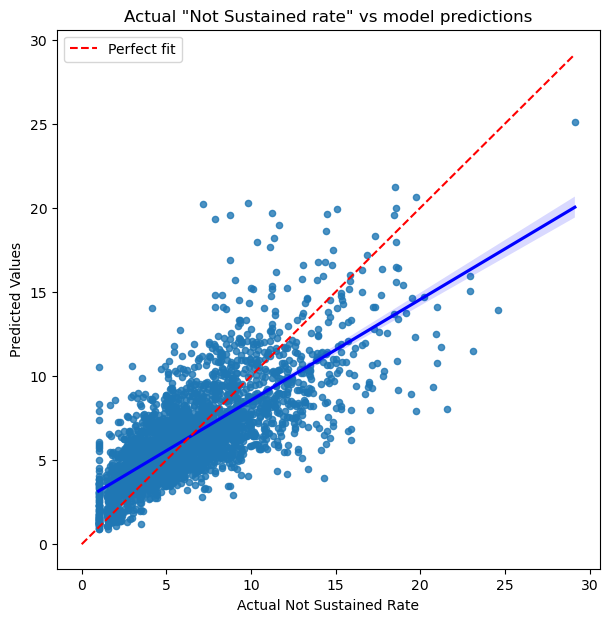

In [594]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=glm_data['not_sustained_rate'], 
            y=forward_glm.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            #ci=None
           )

plt.plot([0, glm_data['not_sustained_rate'].max()], 
         [0, glm_data['not_sustained_rate'].max()], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Actual "Not Sustained rate" vs model predictions')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

In [595]:
predicted_values = forward_glm.predict()
residuals = forward_glm.resid_pearson

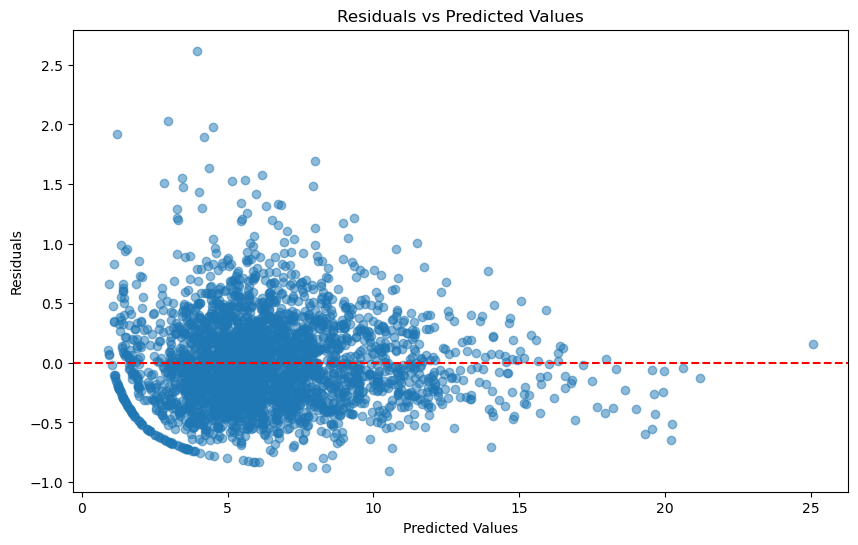

In [596]:
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### check multicolinearity (VIF)

In [598]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [600]:
x = glm_data[['susp_rate', 'post16', 'Progress_8', 'faith_binary', 'single_sex_binary', 
              'FSM', 'sen_support', 'KS2_history', 'White_British', 'IMD', 
              'selective', 'urban_binary']]
x

susp_rate      post16  Progress_8 faith_binary single_sex_binary   FSM  \
1      15.51751     Post-16        3.82     No faith             Mixed  41.2   
3      10.12730     Post-16        4.61     No faith        Single-sex  35.6   
4       6.37535     Post-16        3.94     No faith             Mixed  61.8   
5       4.26005     Post-16        3.96     No faith             Mixed  41.8   
6       9.25451     Post-16        3.83     No faith             Mixed  34.3   
...         ...         ...         ...          ...               ...   ...   
3141    5.82955     Post-16        4.01     No faith             Mixed  15.8   
3142    6.67568     Post-16        3.85     No faith             Mixed  13.5   
3143    6.88235  No Post-16        4.28        Faith             Mixed  12.6   
3144    4.40716     Post-16        4.43     No faith             Mixed   6.9   
3146   10.57722  No Post-16        3.73     No faith             Mixed  28.6   

      sen_support  KS2_history  White_British  IMD      selective urban_binary  
1       10.247652        105.1           11.8  8.0  Non-selective        Urban  
3       13.370697        107.1           39.8  4.0  Non-selective        Urban  
4       17.886932        103.5            4.9  2.0  Non-selective        Urban  
5        9.628506        103.2           12.4  7.0  Non-selective        Urban  
6       11.951849        106.0           47.3  5.0  Non-selective        Urban  
...           ...          ...            ...  ...            ...          ...  
3141    18.465909        103.2           93.9  4.0  Non-selective        Rural  
3142    14.864865        102.1           91.0  8.0  Non-selective        Rural  
3143     8.823529        105.4           91.9  9.0  Non-selective        Rural  
3144    16.269165        107.6           93.7  8.0  Non-selective        Rural  
3146    10.871441        102.6           97.6  4.0  Non-selective        Urban  

[2972 rows x 12 columns]

In [601]:
# get dummies for cat vars
x = pd.get_dummies(x, drop_first=True)
# convert bool to numberic
x = x.astype({col: 'int' for col in x.select_dtypes(include='bool').columns})

In [602]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [603]:
vif_values

predictor         VIF
11            urban_binary_Rural    1.362898
9   single_sex_binary_Single-sex    1.610561
10           selective_Selective    1.639873
0                      susp_rate    2.441561
7                 post16_Post-16    3.050190
8          faith_binary_No faith    5.841565
6                            IMD    8.158013
3                    sen_support    9.562530
5                  White_British   10.973964
2                            FSM   12.211139
1                     Progress_8  120.356840
4                    KS2_history  210.119915

#### remove highest VIF from the model

Progress_8	120.356840
KS2_history	210.119915


In [604]:
x_clean = x.drop(columns=['KS2_history', 'Progress_8'])

In [605]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x_clean.columns

vif_values['VIF'] = [variance_inflation_factor(x_clean.values, i) for i in range(x_clean.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor       VIF
9            urban_binary_Rural  1.359745
7  single_sex_binary_Single-sex  1.486421
8           selective_Selective  1.494030
0                     susp_rate  2.348182
5                post16_Post-16  2.671002
4                           IMD  5.644593
6         faith_binary_No faith  5.692099
1                           FSM  7.024352
3                 White_British  7.558895
2                   sen_support  9.222979

In [606]:
vif_glm = smf.glm(formula = ('not_sustained_rate ~ '
        
                                 'susp_rate +'
                                 'C(post16, Treatment(reference="Post-16")) +'
                                #'Progress_8 +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               
                                # controls
                                  'FSM + '
                                 'sen_support +' 
                                 #KS2_history'
                                 '+ White_British +'
                               'IMD +' 
                               'C(selective, Treatment(reference="Non-selective")) +' 
                               'C(urban_binary, Treatment(reference="Urban"))'), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [607]:
vif_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2961
Model Family:                   Gamma   Df Model:                           10
Link Function:                    Log   Scale:                         0.15199
Method:                          IRLS   Log-Likelihood:                -6442.4
Date:                Thu, 23 Jan 2025   Deviance:                       455.32
Time:                        16:20:09   Pearson chi2:                     450.
No. Iterations:                    12   Pseudo R-squ. (CS):             0.7265
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            0.9114      0.043     21.319      0.000       0.828       0.995
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1240      0.016      7.850      0.000       0.093       0.155
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0965      0.019     -5.036      0.000      -0.134      -0.059
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.2169      0.027     -8.125      0.000      -0.269      -0.165
C(selective, Treatment(reference="Non-selective"))[T.Selective]     -0.5440      0.039    -14.068      0.000      -0.620      -0.468
C(urban_binary, Treatment(reference="Urban"))[T.Rural]              -0.0447      0.022     -2.022      0.043      -0.088      -0.001
susp_rate                                                            0.0023      0.000      6.786      0.000       0.002       0.003
FSM                                                                  0.0216      0.001     24.403      0.000       0.020       0.023
sen_support                                                          0.0076      0.002      4.812      0.000       0.005       0.011
White_British                                                        0.0042      0.000     13.773      0.000       0.004       0.005
IMD                                                                 -0.0142      0.003     -4.400      0.000      -0.020      -0.008
====================================================================================================================================
"""

In [608]:
vif_aic_value = vif_glm.aic
print(f"AIC: {vif_aic_value}")

AIC: 12906.826641830441


In [609]:
# transform coefficients to interpret them on their original scales
coefficients = vif_glm.params
exp_coefficients = np.exp(coefficients)
p_values = vif_glm.pvalues.round(4)

coef_df = pd.DataFrame({
    'Original Coefficients': coefficients,
    'Exponentiated Coefficients': exp_coefficients,
    'p-value': p_values
})

coef_df

Original Coefficients  \
Intercept                                                        0.911415   
C(post16, Treatment(reference="Post-16"))[T.No ...               0.123965   
C(faith_binary, Treatment(reference="No faith")...              -0.096486   
C(single_sex_binary, Treatment(reference="Mixed...              -0.216921   
C(selective, Treatment(reference="Non-selective...              -0.543954   
C(urban_binary, Treatment(reference="Urban"))[T...              -0.044659   
susp_rate                                                        0.002306   
FSM                                                              0.021577   
sen_support                                                      0.007622   
White_British                                                    0.004248   
IMD                                                             -0.014181   

                                                    Exponentiated Coefficients  \
Intercept                                                             2.487840   
C(post16, Treatment(reference="Post-16"))[T.No ...                    1.131976   
C(faith_binary, Treatment(reference="No faith")...                    0.908023   
C(single_sex_binary, Treatment(reference="Mixed...                    0.804993   
C(selective, Treatment(reference="Non-selective...                    0.580449   
C(urban_binary, Treatment(reference="Urban"))[T...                    0.956324   
susp_rate                                                             1.002309   
FSM                                                                   1.021811   
sen_support                                                           1.007651   
White_British                                                         1.004257   
IMD                                                                   0.985919   

                                                    p-value  
Intercept                                            0.0000  
C(post16, Treatment(reference="Post-16"))[T.No ...   0.0000  
C(faith_binary, Treatment(reference="No faith")...   0.0000  
C(single_sex_binary, Treatment(reference="Mixed...   0.0000  
C(selective, Treatment(reference="Non-selective...   0.0000  
C(urban_binary, Treatment(reference="Urban"))[T...   0.0432  
susp_rate                                            0.0000  
FSM                                                  0.0000  
sen_support                                          0.0000  
White_British                                        0.0000  
IMD                                                  0.0000

#### validate model: check residuals and predictions

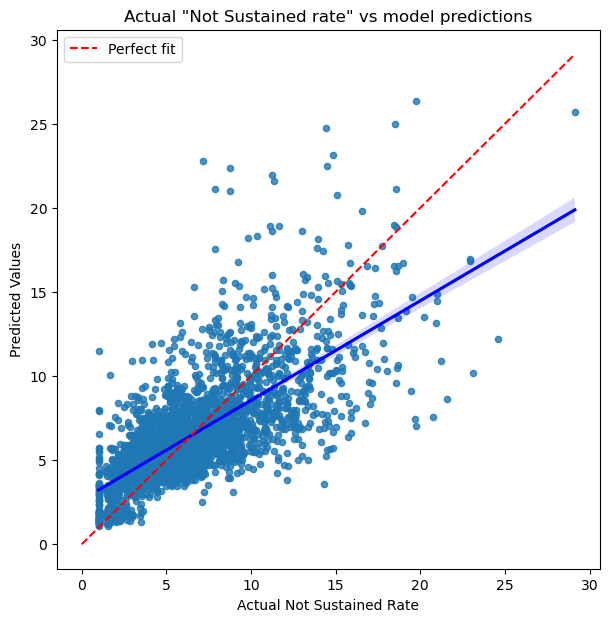

In [610]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=glm_data['not_sustained_rate'], 
            y=vif_glm.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            #ci=None
           )

plt.plot([0, glm_data['not_sustained_rate'].max()], 
         [0, glm_data['not_sustained_rate'].max()], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Actual "Not Sustained rate" vs model predictions')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

In [611]:
predicted_values = vif_glm.predict()
residuals = vif_glm.resid_pearson

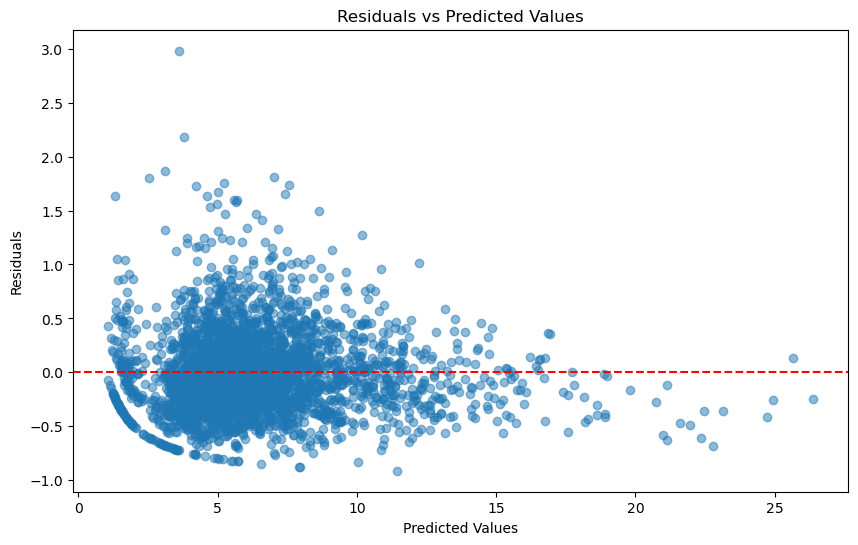

In [612]:
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

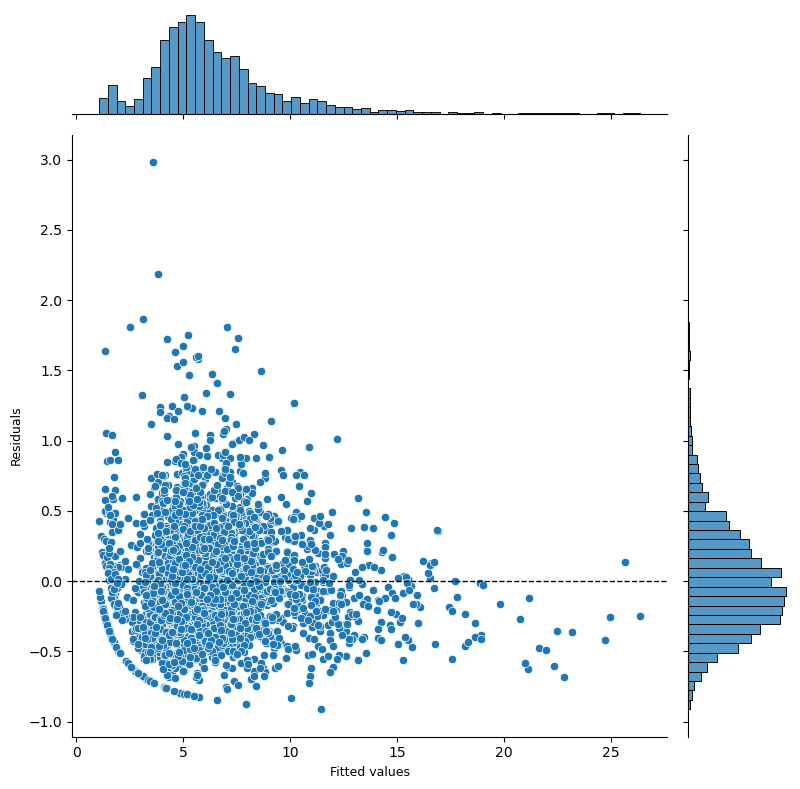

In [613]:
# create jointplot
g = sns.jointplot(x=vif_glm.fittedvalues, y=vif_glm.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Fitted values', 'Residuals', fontsize=9);

In [629]:
reg_names = {
    'C(post16, Treatment(reference="Post-16"))[T.No Post-16]': 'No Post-16', 
    'C(faith_binary, Treatment(reference="No faith"))[T.Faith]': 'No faith', 
    'C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]': 'Single-sex', 
    'C(selective, Treatment(reference="Non-selective"))[T.Selective]': 'Selective',
    'C(urban_binary, Treatment(reference="Urban"))[T.Rural]': 'Rural', 
    'susp_rate': 'Suspension %', 
    'FSM': 'FSM %', 
    'sen_support': 'SEN support %',
    'White_British': 'White British %', 
    'IMD': 'IMD of LSOA',
    'Intercept' : 'Intercept'
}

In [630]:
coef

Intercept                                                           0.911415
C(post16, Treatment(reference="Post-16"))[T.No Post-16]             0.123965
C(faith_binary, Treatment(reference="No faith"))[T.Faith]          -0.096486
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]   -0.216921
C(selective, Treatment(reference="Non-selective"))[T.Selective]    -0.543954
C(urban_binary, Treatment(reference="Urban"))[T.Rural]             -0.044659
susp_rate                                                           0.002306
FSM                                                                 0.021577
sen_support                                                         0.007622
White_British                                                       0.004248
IMD                                                                -0.014181
dtype: float64

In [631]:
# extract coefficients and confidence intervals
coef = vif_glm.params
conf = vif_glm.conf_int()

In [632]:
# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1]
}).reset_index().rename(columns={'index': 'Predictor'})

In [633]:
# rename labels using dictionary
coef_df['Predictor'] = coef_df['Predictor'].map(reg_names)

In [634]:
coef_df

Predictor  Coefficient  Lower CI  Upper CI
0         Intercept     0.911415  0.827624  0.995206
1        No Post-16     0.123965  0.093013  0.154917
2          No faith    -0.096486 -0.134039 -0.058933
3        Single-sex    -0.216921 -0.269251 -0.164591
4         Selective    -0.543954 -0.619737 -0.468170
5             Rural    -0.044659 -0.087951 -0.001366
6      Suspension %     0.002306  0.001640  0.002972
7             FSM %     0.021577  0.019844  0.023310
8     SEN support %     0.007622  0.004517  0.010726
9   White British %     0.004248  0.003643  0.004852
10      IMD of LSOA    -0.014181 -0.020498 -0.007864

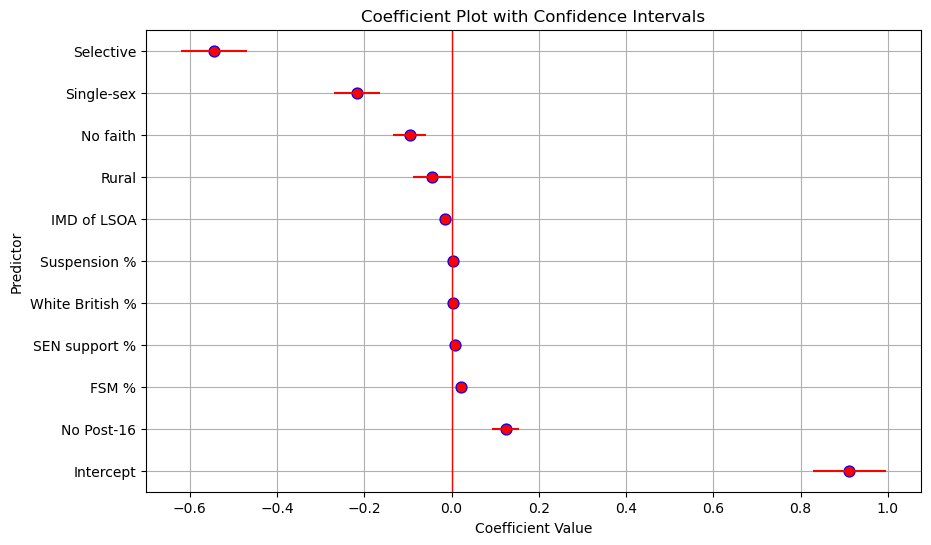

In [635]:


#coef_df = coef_df[coef_df['Predictor'] != 'const']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')



# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df['Coefficient'], coef_df['Predictor'], 
             xerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

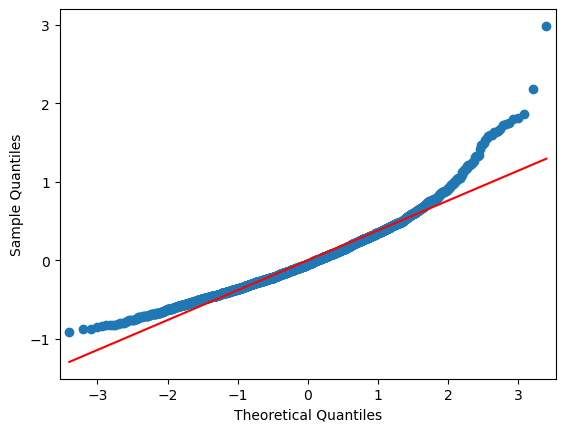

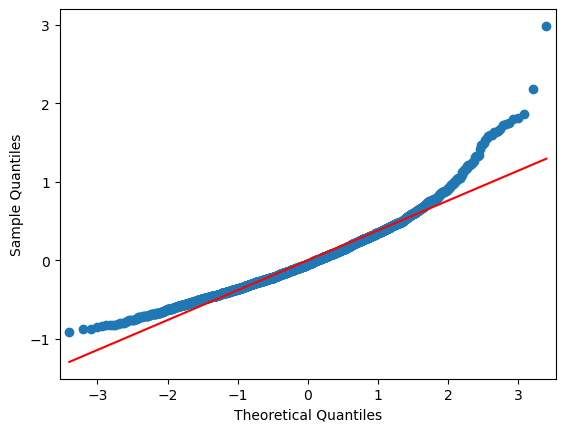

In [636]:
from statsmodels import graphics
graphics.gofplots.qqplot(residuals, line='r')

#### stepwise GLM

In [633]:
def glm_stepwise_selection_aic(x, y, initial_features=[], family=sm.families.Gamma(sm.families.links.log())):
    included = list(initial_features)
    best_aic = np.inf
    
    while True:
        changed = False
        excluded = list(set(x.columns) - set(included))
        new_aic = pd.Series(index=excluded)
        
        # Forward step
        for new_feature in excluded:
            # Fit a GLM model with the new feature added
            model = sm.GLM(y, x[included + [new_feature]], family=family).fit()
            new_aic[new_feature] = model.aic
        best_aic_candidate = new_aic.min()
        
        # If the new model's AIC is lower, include the feature
        if best_aic_candidate < best_aic:
            best_feature = new_aic.idxmin()
            included.append(best_feature)
            best_aic = best_aic_candidate
            changed = True

        # Break if no improvement is possible
        if not changed:
            break
    
    return included

/Users/gysd/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [ ]:
selected_features = stepwise_selection_aic(x, y)

### Outlier detection via studentised residuals

In [395]:
# studentised residuals = residual / estimated standards error 

## calculate residual standard error

residuals = model.resid_pearson
# number of observations
n = len(data_transformed['not_sustained_rate'])
# number of predictors
k = x.shape[1]

RSE = np.sqrt(np.sum(residuals**2) / (n - k - 1))

RSE


1.0001701114242127

In [396]:
model.resid_pearson

array([-0.27327293, -0.05758695, -1.0640025 , ...,  0.25649048,
       -0.86284127,  0.66973201])

In [397]:
studentised_residuals = model.get_influence().resid_studentized_internal
studentised_residuals

array([-0.27472045, -0.0579994 , -1.07009588, ...,  0.25830231,
       -0.86660705,  0.67208565])

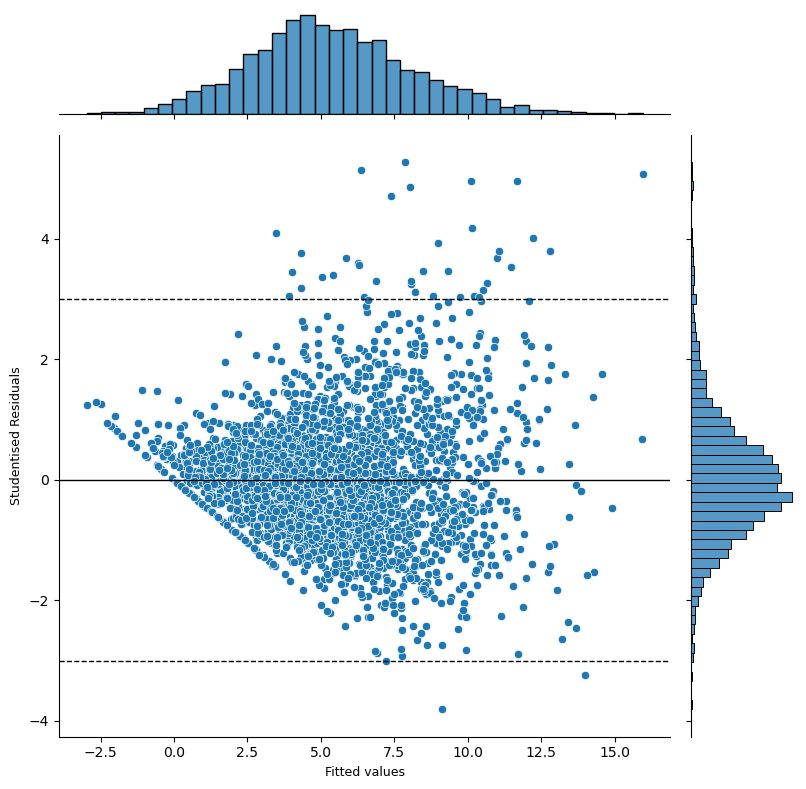

In [398]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=studentised_residuals, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# clear the existing scatter plot
ax.cla()

# re-plot scatter plot but with hue parameter
sns.scatterplot(
    x=model.fittedvalues,
    y=studentised_residuals,
    ax=ax
)

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='-', linewidth=1)

# add a horizontal line at y=-3 and 3
ax.axhline(-3, color='black', linestyle='--', linewidth=1)
ax.axhline(3, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Fitted values', 'Studentised Residuals', fontsize=9);

In [399]:
data['stu_resid'] = studentised_residuals

In [400]:
data['outlier'] = 1

In [401]:
data.loc[(data['stu_resid'] > -3) & (data['stu_resid'] < 3), 'outlier'] = 0

In [402]:
data.loc[data['outlier'] == 1]

URN  not_sustained_rate  total_absence  persistent_absence  \
118   142879           13.157895           10.2                26.8   
174   144502           12.345679            7.7                17.0   
359   102449           13.636364           11.7                38.2   
537   103539           14.876033            8.6                28.6   
677   142798           18.518519           13.5                42.5   
678   135479           16.853933            9.4                31.2   
832   138698           11.111111            9.5                37.9   
888   144519           20.000000           12.6                35.8   
916   140964           14.893617            7.5                22.0   
921   138314           15.929204           10.1                29.5   
977   139474           19.718310           12.0                38.9   
1005  143115            6.185567           14.8                45.6   
1050  139646           17.567568           11.2                40.2   
1158  144638           13.333333            6.5                15.8   
1253  138246           19.911504           13.4                39.7   
1254  139118           14.880952            6.2                17.7   
1431  138439           23.595506           16.7                49.9   
1487  112951           18.709677            8.3                27.9   
1537  136745           21.917808           14.5                46.8   
1576  135314           18.461538           11.8                36.6   
1583  148179           20.238095           15.3                44.9   
1620  140182           15.740741           11.1                31.6   
1680  136156           21.951220           15.5                47.1   
1701  135628           17.687075           11.3                34.5   
1818  139068           16.025641            8.9                27.5   
1822  148220           17.054264           14.1                44.4   
1847  136849           18.750000            9.9                31.5   
2010  146567           20.000000           17.0                53.2   
2174  135662           16.161616           10.7                31.9   
2358  119771           18.125000           12.3                36.8   
2363  119780           14.728682            4.8                11.4   
2412  140021           28.125000           17.6                54.2   
2426  139062           20.588235            9.6                30.3   
2432  144486           22.093023           12.3                35.0   
2441  138837           13.432836            7.4                19.8   
2539  111396           17.699115           14.8                42.3   
2953  125259           12.000000            8.5                25.0   
2956  138765           13.821138           10.3                32.9   
3111  112377            0.000000           11.0                37.6   
3128  112378            0.000000            9.9                38.6   

                                    urban_rural denomination   FSM  \
118                     Urban major conurbation     No faith  34.4   
174                         Urban city and town     No faith  22.8   
359                     Urban major conurbation     No faith  30.9   
537                     Urban major conurbation    Christian  35.4   
677                     Urban major conurbation     No faith  50.8   
678                     Urban major conurbation    Christian  47.7   
832                     Urban major conurbation  Other faith   2.3   
888                     Urban major conurbation     No faith  51.5   
916                     Urban minor conurbation     No faith  21.8   
921                     Urban minor conurbation     No faith  28.2   
977                     Urban major conurbation     No faith  41.3   
1005                    Urban major conurbation     No faith  58.3   
1050                    Urban major conurbation     No faith  49.6   
1158          Rural village in a sparse setting    Christian   3.0   
1253                        Urban city and town

In [403]:
data.describe()

URN  not_sustained_rate  total_absence  persistent_absence  \
count    2972.000000         2972.000000    2972.000000         2972.000000   
mean   133863.203567            5.354765       9.096770           26.750976   
std     12011.537035            3.670508       2.437697            8.591171   
min    100050.000000            0.000000       3.100000            2.800000   
25%    135760.750000            2.720164       7.500000           21.200000   
50%    137338.500000            4.591837       8.900000           26.600000   
75%    140412.750000            7.272727      10.400000           32.100000   
max    148866.000000           28.125000      32.600000           97.800000   

               FSM  White_British          EAL    headcount  perm_excl_rate  \
count  2972.000000    2972.000000  2972.000000  2972.000000     2972.000000   
mean     24.482470      63.886137    17.662786  1115.075034        0.243747   
std      12.930734      28.961852    18.402224   385.419425        0.326898   
min       1.300000       0.000000     0.000000    81.000000        0.000000   
25%      14.700000      44.400000     4.500000   847.000000        0.000000   
50%      22.500000      75.300000    10.100000  1082.000000        0.134005   
75%      32.725000      87.300000    24.900000  1359.000000        0.345252   
max      75.400000      99.300000    92.700000  2990.000000        3.024910   

         susp_rate  one_plus_susp_rate  KS4_headcount  KS2_history  \
count  2972.000000         2972.000000    2972.000000  2972.000000   
mean     20.286441            7.579353     185.130552   104.437248   
std      24.449683            5.256525      61.606266     2.745410   
min       0.000000            0.000000      17.000000    92.100000   
25%       6.619397            3.917765     145.000000   102.800000   
50%      13.096390            6.508540     180.000000   104.200000   
75%      24.544380            9.902157     224.250000   105.500000   
max     358.064520           37.366550     451.000000   117.400000   

       Attainment_8   Progress_8    selective  KS4_pass_rate       post16  \
count   2972.000000  2972.000000  2972.000000    2972.000000  2972.000000   
mean      47.261137    -0.001413     0.053499      24.690108     0.625841   
std        9.261298     0.505607     0.225065      18.675961     0.483986   
min       18.800000    -3.380000     0.000000       0.000000     0.000000   
25%       41.300000    -0.330000     0.000000      11.000000     0.000000   
50%       46.100000    -0.010000     0.000000      20.000000     1.000000   
75%       51.500000     0.330000     0.000000      33.000000     1.000000   
max       87.600000     2.370000     1.000000     100.000000     1.000000   

       sen_support         ehcp         IMD  pupil_teacher_ratio  \
count  2972.000000  2972.000000  2972.00000          2972.000000   
mean     12.866762     2.529875     5.66319            16.897241   
std       5.493081     1.680185     2.81924             2.295918   
min       0.403226     0.000000     1.00000             5.300000   
25%       9.227085     1.427036     3.00000            15.600000   
50%      12.608697     2.238032     6.00000            16.800000   
75%      16.039934     3.227958     8.00000            18.000000   
max      48.316252    18.468468    10.00000            43.400000   

       assistant_teacher_ratio  absence_rate_non_excl  urban_binary  \
count              2972.000000            2972.000000   2972.000000   
mean                  0.230585               8.819434      0.857335   
std                   0.120709               2.263271      0.349790   
min                   0.000000               3.034038      0.000000   
25%                   0.100000               7.330413      1.000000   
50%                   0.200000               8.653188      1.000000   
75%                   0.300000              10.098754      1.000000   
max                   1.000000              32.617429      1.000000   

         stu_re

In [404]:
data_clean = data.loc[data['outlier'] == 0]

In [405]:
data_clean.describe()

URN  not_sustained_rate  total_absence  persistent_absence  \
count    2932.000000         2932.000000    2932.000000         2932.000000   
mean   133857.766371            5.206185       9.067906           26.645566   
std     12008.879123            3.409252       2.415446            8.520371   
min    100050.000000            0.000000       3.100000            2.800000   
25%    135769.750000            2.700104       7.500000           21.200000   
50%    137317.000000            4.545455       8.900000           26.550000   
75%    140382.750000            7.142857      10.400000           31.900000   
max    148866.000000           19.230769      32.600000           97.800000   

               FSM  White_British          EAL    headcount  perm_excl_rate  \
count  2932.000000    2932.000000  2932.000000  2932.000000     2932.000000   
mean     24.333492      63.785027    17.675921  1120.366303        0.242444   
std      12.857088      28.993941    18.411880   383.533216        0.323781   
min       1.300000       0.000000     0.000000   124.000000        0.000000   
25%      14.600000      44.100000     4.500000   853.750000        0.000000   
50%      22.350000      75.200000    10.200000  1086.000000        0.134005   
75%      32.400000      87.300000    24.925000  1361.250000        0.344470   
max      75.400000      99.300000    92.700000  2990.000000        3.024910   

         susp_rate  one_plus_susp_rate  KS4_headcount  KS2_history  \
count  2932.000000         2932.000000    2932.000000  2932.000000   
mean     20.028741            7.518341     185.952933   104.464700   
std      23.944939            5.184133      61.297607     2.738279   
min       0.000000            0.000000      17.000000    92.100000   
25%       6.591300            3.903398     145.750000   102.800000   
50%      12.987890            6.454585     180.000000   104.200000   
75%      24.335790            9.865863     225.000000   105.500000   
max     358.064520           37.366550     451.000000   117.400000   

       Attainment_8   Progress_8    selective  KS4_pass_rate       post16  \
count   2932.000000  2932.000000  2932.000000    2932.000000  2932.000000   
mean      47.374966     0.005167     0.054229      24.865621     0.630969   
std        9.230211     0.500452     0.226508      18.707366     0.482625   
min       18.800000    -3.380000     0.000000       0.000000     0.000000   
25%       41.400000    -0.320000     0.000000      11.000000     0.000000   
50%       46.200000    -0.010000     0.000000      20.000000     1.000000   
75%       51.600000     0.330000     0.000000      34.000000     1.000000   
max       87.600000     2.370000     1.000000     100.000000     1.000000   

       sen_support         ehcp          IMD  pupil_teacher_ratio  \
count  2932.000000  2932.000000  2932.000000          2932.000000   
mean     12.808878     2.520540     5.687244            16.915382   
std       5.447425     1.667795     2.815745             2.282204   
min       0.403226     0.000000     1.000000             5.300000   
25%       9.178175     1.425900     3.000000            15.600000   
50%      12.547931     2.233021     6.000000            16.800000   
75%      15.957447     3.217964     8.000000            18.000000   
max      48.316252    18.468468    10.000000            43.400000   

       assistant_teacher_ratio  absence_rate_non_excl  urban_binary  \
count              2932.000000            2932.000000   2932.000000   
mean                  0.230286               8.793302      0.857435   
std                   0.120630               2.243855      0.349688   
min                   0.000000               3.034038      0.000000   
25%                   0.100000               7.316868      1.000000   
50%                   0.200000               8.639116      1.000000   
75%                   0.300000              10.078537      1.000000   
max                   1.000000              32.617429      1.000000   

      

### Re-run clean data

In [406]:
data_transformed_clean = pd.get_dummies(data_clean, 
                                  columns=['type', 'denomination', 'school_sex', 'region_new', 'Ofsted_rating'], 
                                 drop_first=False)
data_transformed_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2932 entries, 1 to 3146
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   URN                                 2932 non-null   int64   
 1   not_sustained_rate                  2932 non-null   float64 
 2   total_absence                       2932 non-null   float64 
 3   persistent_absence                  2932 non-null   float64 
 4   urban_rural                         2932 non-null   category
 5   FSM                                 2932 non-null   float64 
 6   White_British                       2932 non-null   float64 
 7   EAL                                 2932 non-null   float64 
 8   region_name                         2932 non-null   object  
 9   school_name                         2932 non-null   object  
 10  headcount                           2932 non-null   float64 
 11  perm_excl_rate                     

In [407]:
data_transformed_clean = data_transformed_clean.astype({col: 'int' for col in data_transformed_clean.select_dtypes(include='bool').columns})

In [408]:
x_clean = data_transformed_clean[[
    #'URN',
 #'not_sustained_rate',
 #'total_absence',
 #'persistent_absence',
 #'urban_rural',
 'FSM',
 'White_British',
 #'EAL',
 #'region_name',
 #'school_name',
 'headcount',
 #'perm_excl_rate',
 'susp_rate',
 #'one_plus_susp_rate',
 #'KS4_headcount',
 'KS2_history',
 'Attainment_8',
 'Progress_8',
 'selective',
 #'KS4_pass_rate',
 'post16',
 'sen_support',
 'ehcp',
 'IMD',
 'pupil_teacher_ratio',
 'assistant_teacher_ratio',
 'absence_rate_non_excl',
 'urban_binary',
 #'type_Academy converter',
 'type_Academy sponsor led',
 'type_Community school',
 'type_Foundation school',
 'type_Free schools',
 'type_Voluntary aided school',
 'type_Voluntary controlled school',
 'denomination_Christian',
 #'denomination_No faith',
 'denomination_Other faith',
 'school_sex_Boys',
 'school_sex_Girls',
 #'school_sex_Mixed',
 'region_new_London',
 'region_new_Midlands',
 'region_new_North',
 #'region_new_South',
 'Ofsted_rating_Outstanding',
 #'Ofsted_rating_Good',
 'Ofsted_rating_Requires improvement',
 'Ofsted_rating_Inadequate']]

In [409]:
y_clean = data_transformed_clean['not_sustained_rate']

In [410]:
# fit the model
model_clean = sm.OLS(y_clean, x_clean).fit()

# make the predictions by the model
predictions_clean = model_clean.predict(x_clean) 

# print out the statistics
model_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              651.8
Date:                Thu, 10 Oct 2024   Prob (F-statistic):                        0.00
Time:                        15:22:32   Log-Likelihood:                         -6437.4
No. Observations:                2932   AIC:                                  1.294e+04
Df Residuals:                    2900   BIC:                                  1.313e+04
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
FSM                                    0.1009      0.006     16.009      0.000       0.089       0.113
White_British                          0.0122      0.002      5.320      0.000       0.008       0.017
headcount                             -0.0003      0.000     -1.827      0.068      -0.001    1.86e-05
susp_rate                              0.0127      0.002      5.787      0.000       0.008       0.017
KS2_history                            0.0639      0.011      5.797      0.000       0.042       0.085
Attainment_8                          -0.1198      0.019     -6.348      0.000      -0.157      -0.083
Progress_8                             0.7735      0.216      3.586      0.000       0.351       1.196
selective                              0.8610      0.320      2.689      0.007       0.233       1.489
post16                                -0.6511      0.101     -6.472      0.000      -0.848      -0.454
sen_support                            0.0377      0.009      4.039      0.000       0.019       0.056
ehcp                                  -0.0113      0.031     -0.369      0.712      -0.072       0.049
IMD                                   -0.0310      0.019     -1.674      0.094      -0.067       0.005
pupil_teacher_ratio                   -0.0210      0.019     -1.092      0.275      -0.059       0.017
assistant_teacher_ratio                0.3597      0.407      0.884      0.377      -0.439       1.158
absence_rate_non_excl                  0.1161      0.030      3.921      0.000       0.058       0.174
urban_binary                           0.4949      0.130      3.808      0.000       0.240       0.750
type_Academy sponsor led               0.7832      0.118      6.659      0.000       0.553       1.014
type_Community school                 -0.0058      0.151     -0.039      0.969      -0.302       0.290
type_Foundation school                -0.0981      0.195     -0.504      0.615      -0.480       0.284
type_Free schools                     -0.0705      0.232     -0.303      0.762      -0.526       0.385
type_Voluntary aided school           -0.1375      0.198     -0.695      0.487      -0.526       0.251
type_Voluntary controlled school      -0.5563      0.484     -1.148      0.251      -1.506       0.394
denomination_Christian                -0.2481      0.129     -1.916      0.055      -0.502       0.006
denomination_Other faith              -0.1855      0.435     -0.426      0.670      -1.039       0.668
school_sex_Boys                       -0.1493      0.213     -0.701      0.483      -0.567       0.268
school_sex_Girls                      -0.9429      0.194     -4.872      0.000      -1.322      -0.5

### Drop non significant predictors

In [417]:
x_clean = data_transformed_clean[[
    #'URN',
 #'not_sustained_rate',
 #'total_absence',
 #'persistent_absence',
 #'urban_rural',
 'FSM',
 'White_British',
 #'EAL',
 #'region_name',
 #'school_name',
 #'headcount', dropped fifth
 #'perm_excl_rate',
 'susp_rate',
 #'one_plus_susp_rate',
 #'KS4_headcount',
 #'KS2_history',  extremely high VIF value and kind of accounted for by A8 and P8
 'Attainment_8',
 'Progress_8',
 'selective',
 #'KS4_pass_rate',
 'post16',
 'sen_support',
 #'ehcp', dropped first
 #'IMD', dropped sixth
 #'pupil_teacher_ratio', dropped second
 #'assistant_teacher_ratio', dropped third
 'absence_rate_non_excl',
 'urban_binary',
 #'type_Academy converter',
 #'type_Academy sponsor led',
 #'type_Community school',
 #'type_Foundation school',
 #'type_Free schools',
 #'type_Voluntary aided school',
 #'type_Voluntary controlled school',
 #'denomination_Christian',
 #'denomination_No faith', dropped fourth
 #'denomination_Other faith',
 'school_sex_Boys',
 'school_sex_Girls',
 #'school_sex_Mixed',
 'region_new_London',
 'region_new_Midlands',
 'region_new_North',
 #'region_new_South',
 'Ofsted_rating_Outstanding',
 #'Ofsted_rating_Good',
 'Ofsted_rating_Requires improvement',
 'Ofsted_rating_Inadequate']]

In [418]:
# fit the model
model_clean = sm.OLS(y_clean, x_clean).fit()

# make the predictions by the model
predictions_clean = model_clean.predict(x_clean) 

# print out the statistics
model_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1117.
Date:                Thu, 10 Oct 2024   Prob (F-statistic):                        0.00
Time:                        15:24:40   Log-Likelihood:                         -6490.7
No. Observations:                2932   AIC:                                  1.302e+04
Df Residuals:                    2914   BIC:                                  1.313e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
FSM                                    0.1315      0.005     25.031      0.000       0.121       0.142
White_British                          0.0165      0.002      7.572      0.000       0.012       0.021
susp_rate                              0.0146      0.002      6.712      0.000       0.010       0.019
Attainment_8                          -0.0281      0.006     -4.796      0.000      -0.040      -0.017
Progress_8                             0.0931      0.160      0.582      0.561      -0.221       0.407
selective                              0.2476      0.248      0.999      0.318      -0.238       0.734
post16                                -0.6916      0.092     -7.483      0.000      -0.873      -0.510
sen_support                            0.0477      0.009      5.160      0.000       0.030       0.066
absence_rate_non_excl                  0.1841      0.027      6.700      0.000       0.130       0.238
urban_binary                           0.4904      0.127      3.864      0.000       0.242       0.739
school_sex_Boys                       -0.1391      0.212     -0.656      0.512      -0.555       0.277
school_sex_Girls                      -1.0259      0.187     -5.492      0.000      -1.392      -0.660
region_new_London                     -0.9749      0.161     -6.042      0.000      -1.291      -0.659
region_new_Midlands                    0.0121      0.118      0.103      0.918      -0.219       0.243
region_new_North                      -0.0539      0.112     -0.481      0.631      -0.274       0.166
Ofsted_rating_Outstanding              0.2166      0.133      1.623      0.105      -0.045       0.478
Ofsted_rating_Requires improvement    -0.3114      0.134     -2.329      0.020      -0.574      -0.049
Ofsted_rating_Inadequate              -0.4046      0.292     -1.385      0.166      -0.977       0.168
==============================================================================
Omnibus:                       87.722   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.681
Skew:                           0.345   Prob(JB):                     3.40e-25
Kurtosis:                       3.668   Cond. No.                         642.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF - Multicolinearity

In [419]:
vif_values_clean = pd.DataFrame()
vif_values_clean['predictor'] = x_clean.columns

vif_values_clean['VIF'] = [variance_inflation_factor(x_clean.values, i) for i in range(x_clean.shape[1])]

vif_values_clean = vif_values_clean.sort_values(by='VIF')

In [420]:
vif_values_clean

predictor        VIF
17            Ofsted_rating_Inadequate   1.159536
10                     school_sex_Boys   1.295300
16  Ofsted_rating_Requires improvement   1.322817
11                    school_sex_Girls   1.372460
15           Ofsted_rating_Outstanding   1.623740
13                 region_new_Midlands   1.678934
5                            selective   1.981518
14                    region_new_North   2.055523
12                   region_new_London   2.375293
2                            susp_rate   2.742375
6                               post16   3.204762
4                           Progress_8   3.811030
9                         urban_binary   8.212704
7                          sen_support   9.843422
0                                  FSM  12.422416
1                        White_British  13.916805
8                absence_rate_non_excl  36.949470
3                         Attainment_8  47.442362

### Visualise

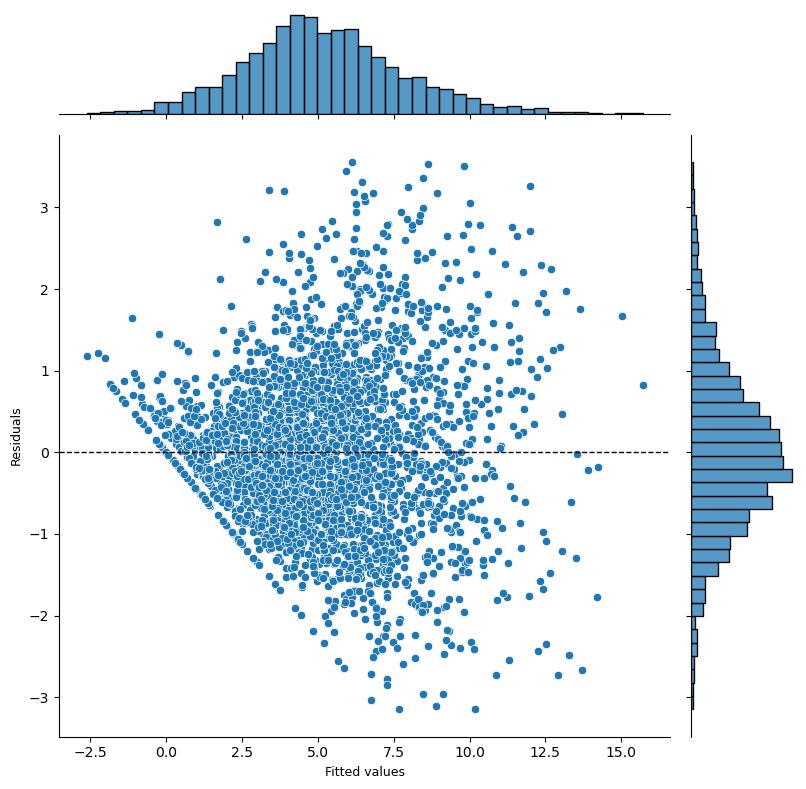

In [421]:
# create jointplot
g = sns.jointplot(x=model_clean.fittedvalues, y=model_clean.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Fitted values', 'Residuals', fontsize=9);

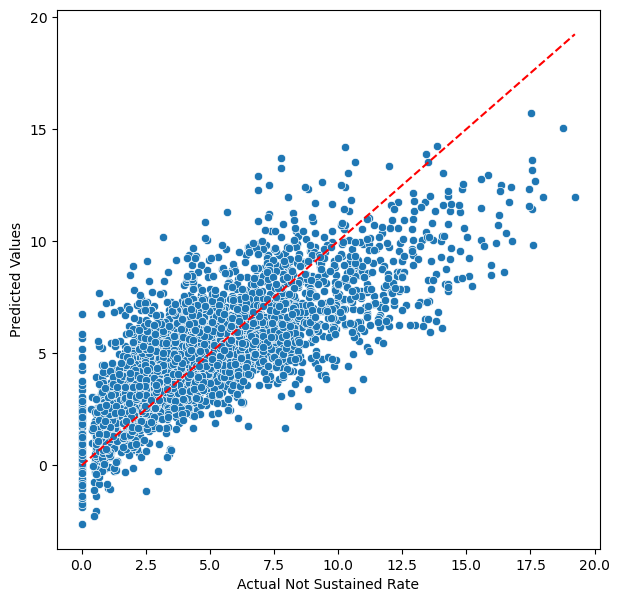

In [422]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot( x = data_transformed_clean['not_sustained_rate'],
                y = model_clean.fittedvalues)

plt.plot([data_transformed_clean['not_sustained_rate'].min(), data_transformed_clean['not_sustained_rate'].max()], 
         [data_transformed_clean['not_sustained_rate'].min(), data_transformed_clean['not_sustained_rate'].max()], 
         color='red', linestyle='--')

plt.title('')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values');